# Introduction

In this airline customer segmentation, we'll use unsupervised learning - clustering.

We'll see how clustering can be used to find similar groups of customers who belong to an airline's frequent flyer program (FFP). The airline is trying to learn more about its customers so that it can target different customer segments.

The FFP has become a common marketing tool and helped the airline increase its sales and the customer loyalty by accumulating mileage points corresponding to the distance flown on that airline.

***Objective***

- menganalisis karakteristik customer dari beberapa jenis customer 
- menyediakan solusi untuk berbagai jenis customer 
- membuat model cutomer segmentation dengan clustering unsupervised learning
- mencoba merumuskan strategi pemasaran yang sesuai.

This data comes from https://www.kaggle.com/c/sa-customer-segmentation/data

# Data Collection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

### Load dataset

In [2]:
na_simbol = ['*','-','--','.','---',' ','n/a','Nan','nan', 0.0, 0]

flight_test = pd.read_csv('flight_test.csv', na_values=na_simbol, parse_dates=['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE'])
flight_train = pd.read_csv('flight_train.csv',na_values=na_simbol, parse_dates=['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE'])

In [3]:
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7988 entries, 0 to 7987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          7988 non-null   int64         
 1   FFP_DATE           7988 non-null   datetime64[ns]
 2   FIRST_FLIGHT_DATE  7988 non-null   datetime64[ns]
 3   GENDER             7988 non-null   object        
 4   FFP_TIER           7988 non-null   int64         
 5   WORK_CITY          7612 non-null   object        
 6   WORK_PROVINCE      7349 non-null   object        
 7   WORK_COUNTRY       7982 non-null   object        
 8   AGE                7910 non-null   float64       
 9   LOAD_TIME          7988 non-null   datetime64[ns]
 10  FLIGHT_COUNT       7988 non-null   int64         
 11  BP_SUM             7474 non-null   float64       
 12  SUM_YR_1           4976 non-null   float64       
 13  SUM_YR_2           4427 non-null   float64       
 14  SEG_KM_S

In [4]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          55000 non-null  int64         
 1   FFP_DATE           55000 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  55000 non-null  datetime64[ns]
 3   GENDER             54997 non-null  object        
 4   FFP_TIER           55000 non-null  int64         
 5   WORK_CITY          52354 non-null  object        
 6   WORK_PROVINCE      51177 non-null  object        
 7   WORK_COUNTRY       54980 non-null  object        
 8   AGE                54658 non-null  float64       
 9   LOAD_TIME          55000 non-null  datetime64[ns]
 10  FLIGHT_COUNT       55000 non-null  int64         
 11  BP_SUM             54949 non-null  float64       
 12  SUM_YR_1           47546 non-null  float64       
 13  SUM_YR_2           46611 non-null  float64       
 14  SEG_KM

In [5]:
flight_test.shape

(7988, 23)

In [6]:
flight_train.shape

(55000, 23)

In [7]:
flight = pd.concat([flight_train,flight_test],0).reset_index(drop=True)
print('Size of application training and testing data', flight.shape)

Size of application training and testing data (62988, 23)


# Data Understanding

In [8]:
flight.head(2)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,NaN,beijing,CN,31.0,2014-03-31,...,234188.0,580717,3/31/2014,1,3.483254,18.0,34.0,0.961639,619760.0,50.0
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,3/25/2014,7,5.194245,17.0,29.0,1.252314,415768.0,33.0


**There are different variables in the dataset, described below:**
- FFP = Frequent Flyer Program https://javamilk.com/2014/05/26/mengenal-frequent-flyer-program/

* **MEMBER_NO**		    : Nomor keanggotaan
* **FFP_DATE**		    : Tanggal join membeship
* **FIRST_FLIGHT_DATE**	: Tanggal penerbangan pertama
* **GENDER**		    : Jenis kelamin customer
* **FFP_TIER**	        : Level dari membership dari jumlah penerbangan berupa level 4, 5, dan 6
* **WORK_CITY**		    : Kota customer bekerja
* **WORK_PROVINCE**	    : Provinsi customer bekerja
* **WORK_COUNTRY**	    : Negara customer bekerja
* **AGE**			    : Umur customer
* **LOAD_TIME**		    : Waktu/batas pengaksesan data penerbangan
* **FLIGHT_COUNT**		: Jumlah berapa kali melakukan penerbangan
* **BP_SUM**		    : Total BP (British Petroleum) https://www.bp.com/id_id/indonesia/home.html /bahan bakar
* **SUM_YR_1**		    : Sum yield revenue 1( fare revenue) / tarif pendapatan
* **SUM_YR_2**		    : Sum yield revenue 2(fare discount) / tarif discount
* **SEG_KM_SUM**		: Akumulasi dari jumlah jarak (km) yang sudah ditempuh dari penerbangan customer
* **LAST_FLIGHT_DATE**	: Tanggal penerbangan terakhir
* **LAST_TO_END**	    : The number of month from last time the customer took the company’s aircraft to the end of the observation window
* **AVG_INTERVAL**		: Rata rata jangka waktu.
* **MAX_INTERVAL**		: Maximal jangka waktu.
* **EXCHANGE_COUNT**	: Jumlah pertukaran
* **avg_discount**		: Rata-rata nilai diskon yang sesuai dengan segmen customer
* **Points_Sum**		: Jumlah point yang didapatkan customer setiap melakukan penerbangan
* **Point_NotFlight**	: Jumlah point yang didapatkan customer ketika membatalkan penerbangan


In [9]:
flight.isnull().sum()

MEMBER_NO                0
FFP_DATE                 0
FIRST_FLIGHT_DATE        0
GENDER                   3
FFP_TIER                 0
WORK_CITY             3022
WORK_PROVINCE         4462
WORK_COUNTRY            26
AGE                    420
LOAD_TIME                0
FLIGHT_COUNT             0
BP_SUM                 565
SUM_YR_1             10466
SUM_YR_2             11950
SEG_KM_SUM               0
LAST_FLIGHT_DATE         0
LAST_TO_END              0
AVG_INTERVAL           421
MAX_INTERVAL           421
EXCHANGE_COUNT       54254
avg_discount             8
Points_Sum             423
Point_NotFlight      42480
dtype: int64

**ada beberapa kolom missing value**

In [10]:
object_column = [x for x in flight.select_dtypes('object').columns]

In [11]:
for kolom in object_column:
    print ('ini adalah unik value dari kolom : {}'.format(kolom))
    print (flight[kolom].unique())
    print ('\n ====================================== ') 

ini adalah unik value dari kolom : GENDER
['Male' 'Female' nan]

ini adalah unik value dari kolom : WORK_CITY
[nan 'Los Angeles' 'guiyang' ... 'BELLREGUARD' 'Danville' 'lingshui']

ini adalah unik value dari kolom : WORK_PROVINCE
['beijing' 'CA' 'guizhou' ... 'NOTARIO' 'TOPKPPI' 'JAWATIMUR']

ini adalah unik value dari kolom : WORK_COUNTRY
['CN' 'US' 'FR' 'AN' 'JP' 'HK' 'MY' 'AU' 'NL' 'MX' 'CA' 'KR' 'PK' 'TH'
 'SG' 'BR' 'PE' 'AE' 'HN' 'PH' 'ID' 'MO' 'GN' 'FL' 'KH' nan 'TW' 'VN' 'DE'
 'IL' 'CH' 'PA' 'VT' 'EC' 'NG' 'BI' 'GT' 'BE' 'GL' 'NZ' 'FA' 'NI' 'KO'
 'CC' 'UV' 'MN' 'UK' 'AS' 'IT' 'OM' 'SE' 'BZ' 'IN' 'KZ' 'PT' 'NO' 'MS'
 'FI' 'UZ' 'NE' 'AT' 'AA' 'HU' 'CY' 'EG' 'MA' '中' 'ES' 'MZ' 'IR' 'SW' 'RE'
 'PS' 'KE' 'SN' 'BB' 'AZ' 'UA' 'LB' 'YE' 'GE' 'SI' 'KA' 'MV' 'RO' 'ZA'
 'DK' 'AB' 'CD' 'UY' 'CM' 'TK' 'AR' 'BN' 'PN' 'BD' '北' 'SU' 'RU' '沈' 'GU'
 'GB' 'ZW' 'PP' '芬' 'FO' 'IE' 'PR' 'BS' 'GH' 'SK' 'IA' 'cn' 'TR' 'LA' 'BG'
 'CL' 'CR' 'SA']

ini adalah unik value dari kolom : LAST_FLIGHT_DATE
['3/3

**Change format last flight date**

In [12]:
#merubah format last_flight_date

flight[flight['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00' ]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,2007-06-17,2007-06-17,Female,6,guangzhou,guangdong,CN,46.0,2014-03-31,...,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57.0,NaN,1.373478,132653.0,4.0
447,17306,2009-08-26,2010-04-29,Male,5,haerbin,heilongjiang,CN,70.0,2014-03-31,...,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75.0,6.0,1.375395,101413.0,7.0
473,915,2006-11-10,2007-01-26,Male,5,NaN,beijing,CN,39.0,2014-03-31,...,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65.0,1.0,1.425974,93153.0,8.0
832,20336,2005-07-13,2005-08-06,Male,5,guangzhou,guangdong,CN,40.0,2014-03-31,...,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34.0,2.0,0.664970,91476.0,15.0
1051,62884,2006-05-24,2007-04-21,Male,5,wuhan,hubei,CN,50.0,2014-03-31,...,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72.0,4.0,1.388584,69047.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,2013-01-11,2013-07-10,Male,4,dalianshi,liaoning,CN,23.0,2014-03-31,...,955.0,3513,2014/2/29 0:00:00,32,117.000000,211.0,NaN,0.276667,NaN,NaN
61871,48742,2009-07-26,2009-07-26,Male,4,tianjin,tianjin,CN,37.0,2014-03-31,...,966.0,1298,2014/2/29 0:00:00,32,135.000000,135.0,NaN,0.690000,1094.0,1.0
61909,9190,2011-04-11,2011-04-20,Male,4,guangzhou,guangdong,CN,34.0,2014-03-31,...,853.0,2595,2014/2/29 0:00:00,32,1.000000,1.0,NaN,0.340000,3356.0,19.0
62721,38776,2007-10-31,2008-03-13,Male,4,foshan,guangdong,CN,42.0,2014-03-31,...,688.0,1199,2014/2/29 0:00:00,32,78.000000,78.0,NaN,0.489525,276.0,NaN


In [13]:
flight['LAST_FLIGHT_DATE'].replace({"2014/2/29  0:00:00": "2014/2/28"}, inplace=True)
print(flight)

       MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
0          54993 2006-11-02        2008-12-24    Male         6          NaN   
1          28065 2007-02-19        2007-08-03    Male         6          NaN   
2          55106 2007-02-01        2007-08-30    Male         6          NaN   
3          21189 2008-08-22        2008-08-23    Male         5  Los Angeles   
4          39546 2009-04-10        2009-04-15    Male         6      guiyang   
...          ...        ...               ...     ...       ...          ...   
62983      18375 2011-05-20        2013-06-05  Female         4    guangzhou   
62984      36041 2010-03-08        2013-09-14    Male         4       foshan   
62985      45690 2006-03-30        2006-12-02  Female         4    guangzhou   
62986      61027 2013-02-06        2013-02-14  Female         4    guangzhou   
62987      61340 2013-02-17        2013-02-17  Female         4     shanghai   

      WORK_PROVINCE WORK_COUNTRY   AGE 

In [14]:
flight['LAST_FLIGHT_DATE'] =pd.to_datetime(flight['LAST_FLIGHT_DATE']) 

In [15]:
flight.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,NaN,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18.0,34.0,0.961639,619760.0,50.0
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17.0,29.0,1.252314,415768.0,33.0
2,55106,2007-02-01,2007-08-30,Male,6,NaN,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18.0,20.0,1.254676,406361.0,26.0
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73.0,11.0,1.090870,372204.0,12.0
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47.0,27.0,0.970658,338813.0,39.0


**GENDER**

In [16]:
flight['GENDER'].unique()

array(['Male', 'Female', nan], dtype=object)

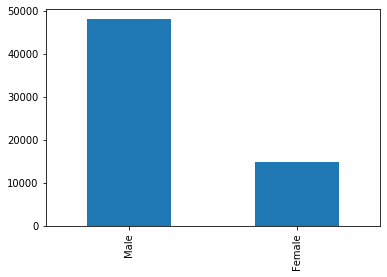

In [17]:
flight['GENDER'].value_counts().plot(kind='bar')

In [18]:
flight[flight['GENDER'].isnull()].reset_index()

,index,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,271,58411,2009-12-12,2010-04-15,NaN,6,MENAI,SYDNEY,AU,61.0,...,89477.0,105377,2014-03-31,1,43.000000,175.0,2.0,1.056396,159060.0,3.0
1,22471,55908,2012-10-14,2013-01-14,NaN,4,PARAMUS,NEW JERSEY,US,43.0,...,5670.0,8604,2014-03-18,14,61.285714,173.0,NaN,1.258319,12220.0,NaN
2,42565,4533,2011-01-25,2011-02-01,NaN,4,guangzhoushi,guangdong,CN,62.0,...,NaN,7845,2013-02-26,400,16.250000,31.0,NaN,0.521791,2982.0,NaN


**the most is male and missing value 3 columns**

**SUM_YR_1 dan SUM_YR_2** 

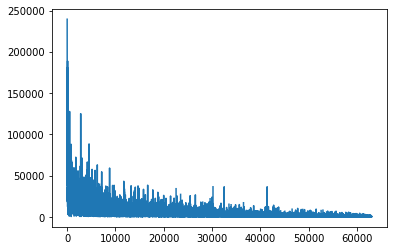

In [19]:
#sum yr 1
plt.plot(flight.index, flight['SUM_YR_1'])

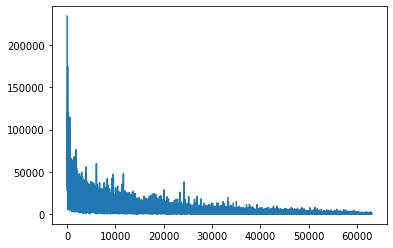

In [20]:
#sum yr 2
plt.plot(flight.index, flight['SUM_YR_2'])

**data menceng ke kanan**

FLIGHT_COUNT

In [21]:
flight['FLIGHT_COUNT'].describe()

count    62988.000000
mean        11.839414
std         14.049471
min          2.000000
25%          3.000000
50%          7.000000
75%         15.000000
max        213.000000
Name: FLIGHT_COUNT, dtype: float64

** flight_count berkorelasi dengan ffp tier,seg_km_sum,point_sum ,bp sum, sum_yr_1,sum_yr_2,last_to_end, exchange count**
   

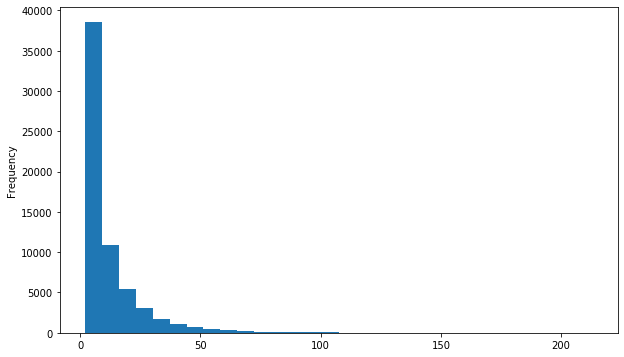

In [22]:
flight['FLIGHT_COUNT'].plot(kind='hist', bins=30, figsize=(10,6))

**data flight_count menceng ke kanan**

BP_SUM

In [23]:
flight['BP_SUM'].describe()

count     62423.000000
mean      11023.965814
std       16380.024250
min         200.000000
25%        2594.000000
50%        5775.000000
75%       12937.500000
max      505308.000000
Name: BP_SUM, dtype: float64

**BP_SUM ada korelasi kuat dengan SEG_KM_SUM dan POINTS SUM sebanyak (0.9)**

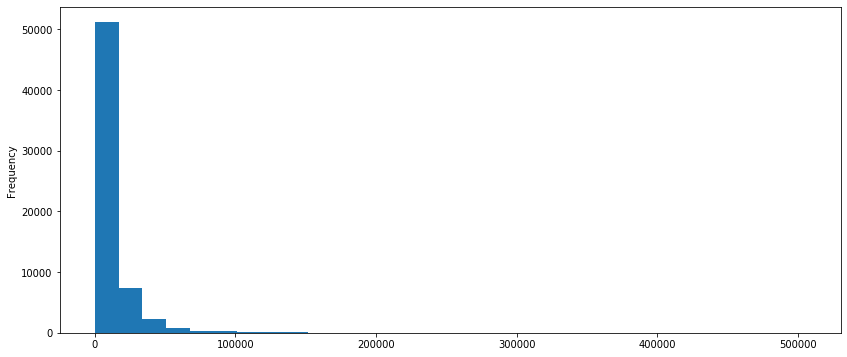

In [24]:
flight['BP_SUM'].plot(kind='hist', bins=30, figsize=(14,6))

AGE

In [25]:
flight['AGE'].describe() 

count    62568.000000
mean        42.476346
std          9.885915
min          6.000000
25%         35.000000
50%         41.000000
75%         48.000000
max        110.000000
Name: AGE, dtype: float64

WORK_CITY

In [26]:
flight['WORK_CITY'].mode()[0]

'guangzhou'

In [27]:
flight['WORK_CITY'].value_counts().head(5)

guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
Name: WORK_CITY, dtype: int64

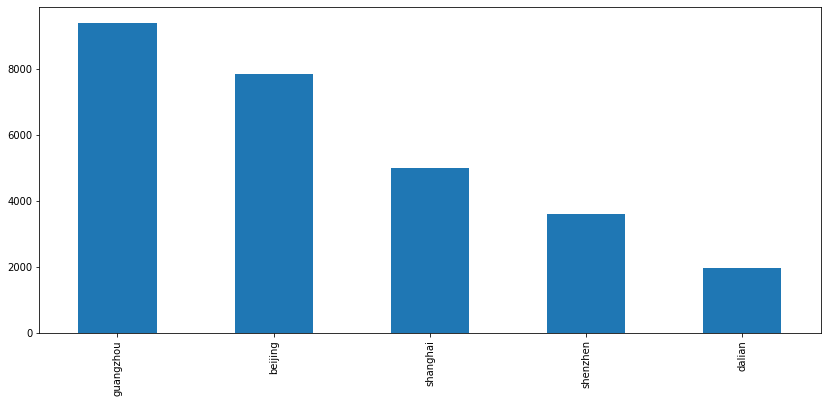

In [28]:
flight['WORK_CITY'].value_counts().head(5).plot(kind='bar',figsize=(14,6))

In [29]:
flight['WORK_CITY'].unique()

array([nan, 'Los Angeles', 'guiyang', ..., 'BELLREGUARD', 'Danville',
       'lingshui'], dtype=object)

In [30]:
flight[flight['WORK_CITY'].isnull()].reset_index()  #nan untuk city 

,index,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,0,54993,2006-11-02,2008-12-24,Male,6,NaN,beijing,CN,31.0,...,234188.0,580717,2014-03-31,1,3.483254,18.0,34.0,0.961639,619760.0,50.0
1,1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,...,167434.0,293678,2014-03-25,7,5.194245,17.0,29.0,1.252314,415768.0,33.0
2,2,55106,2007-02-01,2007-08-30,Male,6,NaN,beijing,CN,40.0,...,164982.0,283712,2014-03-21,11,5.298507,18.0,20.0,1.254676,406361.0,26.0
3,20,21501,2008-07-30,2008-11-21,Male,6,NaN,beijing,CN,49.0,...,122763.0,167113,2014-03-28,4,6.438095,31.0,4.0,1.369404,251134.0,9.0
4,23,28474,2010-04-13,2010-04-13,Male,6,NaN,CA,US,41.0,...,59600.0,222380,2014-01-18,74,32.789474,110.0,8.0,1.004904,280760.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,62950,31906,2011-03-09,2013-09-10,Male,4,NaN,NaN,TW,51.0,...,1260.0,368,2013-09-15,199,5.000000,5.0,NaN,0.835000,700.0,NaN
3018,62956,2213,2005-05-18,2005-07-19,Female,4,NaN,NaN,CN,45.0,...,422.0,904,2014-01-19,73,41.000000,41.0,NaN,0.320000,NaN,NaN
3019,62967,359,2012-04-12,2012-05-30,Male,4,NaN,guangdong,CN,34.0,...,NaN,1096,2012-05-31,671,1.000000,1.0,NaN,0.250000,NaN,NaN
3020,62970,38088,2005-03-11,2005-06-16,Female,4,NaN,NaN,CN,47.0,...,NaN,1096,2012-10-11,538,2.000000,2.0,NaN,0.250000,NaN,NaN


**WORK_PROVINCE**

In [31]:
flight['WORK_PROVINCE'].mode()[0]

'guangdong'

In [32]:
flight['WORK_PROVINCE'].value_counts().head(5)

guangdong    17509
beijing       8014
shanghai      4998
liaoning      4182
xinjiang      2512
Name: WORK_PROVINCE, dtype: int64

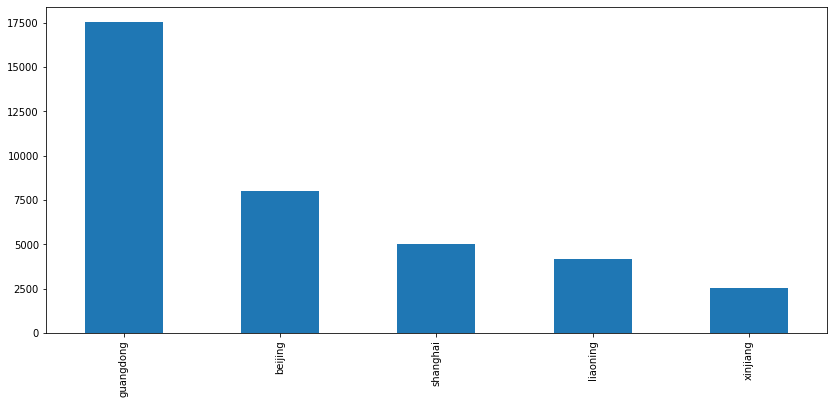

In [33]:
flight['WORK_PROVINCE'].value_counts().head(5).plot(kind='bar',figsize=(14,6))

**WORK_COUNTRY**

In [34]:
flight['WORK_COUNTRY'].mode()[0]

'CN'

In [35]:
flight['WORK_COUNTRY'].value_counts().head(5)

CN    57748
HK      991
JP      875
KR      790
US      575
Name: WORK_COUNTRY, dtype: int64

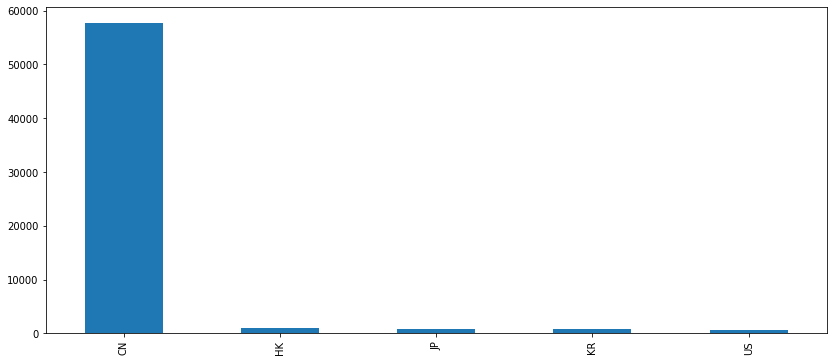

In [36]:
flight['WORK_COUNTRY'].value_counts().head(5).plot(kind='bar',figsize=(14,6))

In [37]:
flight['WORK_COUNTRY'].unique()

array(['CN', 'US', 'FR', 'AN', 'JP', 'HK', 'MY', 'AU', 'NL', 'MX', 'CA',
       'KR', 'PK', 'TH', 'SG', 'BR', 'PE', 'AE', 'HN', 'PH', 'ID', 'MO',
       'GN', 'FL', 'KH', nan, 'TW', 'VN', 'DE', 'IL', 'CH', 'PA', 'VT',
       'EC', 'NG', 'BI', 'GT', 'BE', 'GL', 'NZ', 'FA', 'NI', 'KO', 'CC',
       'UV', 'MN', 'UK', 'AS', 'IT', 'OM', 'SE', 'BZ', 'IN', 'KZ', 'PT',
       'NO', 'MS', 'FI', 'UZ', 'NE', 'AT', 'AA', 'HU', 'CY', 'EG', 'MA',
       '中', 'ES', 'MZ', 'IR', 'SW', 'RE', 'PS', 'KE', 'SN', 'BB', 'AZ',
       'UA', 'LB', 'YE', 'GE', 'SI', 'KA', 'MV', 'RO', 'ZA', 'DK', 'AB',
       'CD', 'UY', 'CM', 'TK', 'AR', 'BN', 'PN', 'BD', '北', 'SU', 'RU',
       '沈', 'GU', 'GB', 'ZW', 'PP', '芬', 'FO', 'IE', 'PR', 'BS', 'GH',
       'SK', 'IA', 'cn', 'TR', 'LA', 'BG', 'CL', 'CR', 'SA'], dtype=object)

In [38]:
flight.loc[flight['WORK_COUNTRY'] == '中']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
22003,42050,2012-01-09,2012-06-11,Male,4,yiwu,zhejiang,中,44.0,2014-03-31,...,4733.0,17764,2013-12-09,114,36.4,143.0,NaN,0.621983,8223.0,NaN
23343,38141,2005-04-23,2006-05-11,Male,5,nanjing,jiangsu,中,57.0,2014-03-31,...,3673.0,12428,2013-05-18,319,25.0,65.0,NaN,0.834567,8142.0,NaN
54567,13521,2010-11-10,2010-11-10,Male,4,shanghai,NaN,中,61.0,2014-03-31,...,800.0,2411,2013-09-20,194,2.0,2.0,NaN,0.858183,1927.0,NaN
55255,51746,2012-07-14,2012-10-13,Male,4,shanghai,shanghai,中,32.0,2014-03-31,...,NaN,3711,2013-03-29,369,83.5,120.0,NaN,0.530181,1628.0,NaN
56173,16153,2012-12-30,2012-12-30,Male,4,shaoxing,zhejiang,中,44.0,2014-03-31,...,NaN,2800,2013-01-10,447,5.5,8.0,NaN,0.656571,1877.0,NaN
57288,6984,2012-09-08,2012-09-13,Female,4,guangzhou,guangdong,中,44.0,2014-03-31,...,NaN,3934,2012-09-17,562,4.0,4.0,NaN,0.425000,763.0,NaN
57369,4526,2012-10-16,2012-10-16,Male,4,beijing,beijing,中,29.0,2014-03-31,...,NaN,4154,2012-10-19,530,3.0,3.0,NaN,0.400000,1572.0,NaN
58317,5070,2011-03-10,2011-03-10,Male,4,wuhan,hubei,中,39.0,2014-03-31,...,NaN,1746,2013-02-27,399,320.0,320.0,NaN,0.875000,1234.0,NaN
60321,6958,2013-01-18,2013-01-29,Male,4,shenzhen,guangdong,中,33.0,2014-03-31,...,NaN,1669,2013-03-28,370,58.0,58.0,NaN,0.720192,1244.0,NaN
61750,16564,2013-03-07,2013-03-10,Male,4,nanning,guangxi,中,56.0,2014-03-31,...,247.0,1228,2013-10-27,157,231.0,231.0,NaN,0.747557,506.0,NaN


In [39]:
flight['WORK_COUNTRY'].replace({"中": "CN"}, inplace=True)

In [40]:
flight.loc[flight['WORK_COUNTRY'] == '北']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
45282,26005,2012-02-04,2012-02-04,Male,4,beijing,beijing,北,38.0,2014-03-31,...,NaN,4610,2012-11-16,502,44.8,138.0,NaN,0.775531,2730.0,NaN


In [41]:
flight['WORK_COUNTRY'].replace({"北": "CN"}, inplace=True)

In [42]:
flight.loc[flight['WORK_COUNTRY'] == '沈']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
46011,44026,2012-04-22,2012-04-22,Female,4,shenyang,liaoning,沈,32.0,2014-03-31,...,NaN,3440,2012-04-29,703,7.0,7.0,NaN,1.0,3512.0,NaN


In [43]:
flight['WORK_COUNTRY'].replace({"沈": "CN"}, inplace=True)

In [44]:
flight.loc[flight['WORK_COUNTRY'] == '芬']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
49968,34056,2012-10-08,2012-11-26,Male,4,oulu,oulu,芬,30.0,2014-03-31,...,NaN,4825,2013-03-04,394,49.0,95.0,NaN,0.571855,1754.0,NaN


In [45]:
flight['WORK_COUNTRY'].replace({"芬": "FD"}, inplace=True)

In [46]:
flight[flight['WORK_COUNTRY'].isnull()].reset_index()  #nan untuk country

,index,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,2226,45041,2007-07-26,2007-11-14,Male,4,NaN,NaN,NaN,49.0,...,13741.0,61442,2014-03-13,19,15.377778,95.0,1.0,0.817299,44113.0,1.0
1,4563,18124,2006-03-31,2011-07-24,Male,4,NaN,NaN,NaN,66.0,...,31996.0,29440,2014-03-28,4,26.900000,188.0,NaN,1.218094,36630.0,NaN
2,8282,35987,2006-03-31,2006-08-04,Male,4,NaN,NaN,NaN,52.0,...,11497.0,16952,2013-07-07,269,51.500000,200.0,NaN,1.473311,24843.0,1.0
3,13502,20244,2005-04-06,2005-06-17,Male,4,NaN,NaN,NaN,47.0,...,672.0,18837,2014-03-05,27,63.363636,349.0,1.0,0.924350,30934.0,37.0
4,16058,20268,2005-04-23,2005-07-19,Male,4,NaN,NaN,NaN,49.0,...,10850.0,24242,2014-03-26,6,40.166667,157.0,1.0,0.620168,9392.0,1.0
5,16615,14,2009-02-13,2009-10-20,Male,4,NaN,NaN,NaN,47.0,...,NaN,10992,2013-01-09,448,23.083333,146.0,NaN,1.328539,13725.0,NaN
6,18385,27098,2006-08-20,2006-10-10,Male,4,NaN,NaN,NaN,NaN,...,1380.0,16658,2013-05-19,318,18.227273,74.0,NaN,0.800600,12965.0,NaN
7,18715,29192,2005-04-10,2005-04-11,Male,4,NaN,NaN,NaN,46.0,...,5383.0,24182,2014-02-28,32,40.687500,104.0,NaN,0.540859,10229.0,NaN
8,19774,1,2006-03-31,2007-01-13,Male,4,NaN,NaN,NaN,40.0,...,7200.0,18770,2013-09-16,198,4.000000,7.0,NaN,0.658303,7035.0,NaN
9,22787,27081,2009-02-13,2009-08-08,Male,4,NaN,NaN,NaN,53.0,...,2473.0,24137,2014-02-20,41,42.750000,144.0,NaN,0.441860,5101.0,1.0


C:\Users\niken\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\niken\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


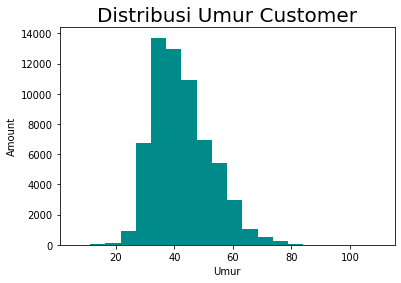

In [47]:
plt.hist(np.array(flight['AGE']),
         bins=20,
         color='darkcyan')

plt.xlabel('Umur')
plt.ylabel('Amount')
plt.title('Distribusi Umur Customer',
          fontsize=20)

plt.show()

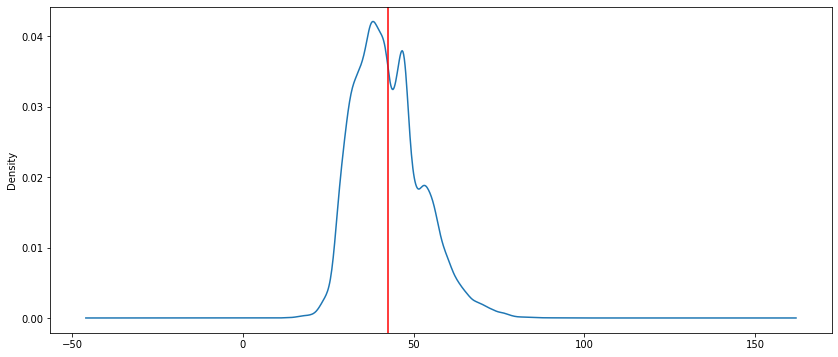

In [48]:
ax = flight['AGE'].plot(kind='density',figsize=(14,6))
ax.axvline(flight['AGE'].mean(),color='red')

**ada outliers, dan rata rata umur member 42 tahun**

## Check Duplicate

In [49]:
flight.duplicated().any()

False

## Check Missing Value

In [50]:
total = flight.isnull().sum().sort_values(ascending = False)
percent = round((flight.isnull().sum()/flight.isnull().count()*100),2).sort_values(ascending = False)
missing_flight_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_flight_data.head(10)

,Total,Percent
EXCHANGE_COUNT,54254,86.13
Point_NotFlight,42480,67.44
SUM_YR_2,11950,18.97
SUM_YR_1,10466,16.62
WORK_PROVINCE,4462,7.08
WORK_CITY,3022,4.80
BP_SUM,565,0.90
Points_Sum,423,0.67
AVG_INTERVAL,421,0.67
MAX_INTERVAL,421,0.67


## Handling Missing Value

In [51]:
flight.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,NaN,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18.0,34.0,0.961639,619760.0,50.0
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17.0,29.0,1.252314,415768.0,33.0
2,55106,2007-02-01,2007-08-30,Male,6,NaN,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18.0,20.0,1.254676,406361.0,26.0
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73.0,11.0,1.090870,372204.0,12.0
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47.0,27.0,0.970658,338813.0,39.0


**WORK_COUNTRY**

In [52]:
#NI = NE = NG = NIGERIA
flight['WORK_COUNTRY'].replace({"NI": "NG","NE": "NG"}, inplace=True) 

In [53]:
flight.loc[flight['WORK_COUNTRY'] == 'NG']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
4014,24725,2013-03-01,2013-03-11,Male,4,LAGOS,LAGOS,NG,33.0,2014-03-31,...,14280.0,67276,2014-01-31,61,32.600000,156.0,NaN,0.570011,23644.0,NaN
5875,33979,2013-02-03,2013-02-06,Male,4,LAGOS,LA,NG,36.0,2014-03-31,...,19780.0,54653,2013-09-22,192,28.500000,77.0,NaN,0.567975,23170.0,NaN
15083,16403,2013-01-31,2013-05-28,Male,4,ONITSHA-ANAMBKA STNTE,ANAMBHASTATE-ONITSHA,NG,48.0,2014-03-31,...,8420.0,30636,2013-08-18,227,27.333333,79.0,NaN,0.517897,10702.0,NaN
15929,25607,2013-02-01,2013-02-01,Male,4,LAGOS,LAGOS,NG,47.0,2014-03-31,...,NaN,28608,2013-02-19,407,9.000000,18.0,NaN,0.529373,9176.0,NaN
25438,7364,2013-03-11,2013-03-11,Male,4,KATHMANDU,NEPAL,NG,44.0,2014-03-31,...,3009.0,12024,2013-11-07,146,60.250000,144.0,NaN,0.775414,6066.0,NaN
28036,59050,2012-04-15,2012-04-15,Male,4,FESTAC LAGOS STATE,LAGOS STATE,NG,48.0,2014-03-31,...,2100.0,12443,2013-04-30,337,95.000000,339.0,NaN,0.658756,4622.0,NaN
29067,22163,2009-04-01,2009-04-01,Male,4,ONITSHA,ANAMBRA,NG,44.0,2014-03-31,...,5219.0,14419,2013-09-20,194,22.555556,112.0,NaN,0.542164,8561.0,1.0
57621,25697,2011-03-24,2011-05-31,Male,4,LAGOS,LAGOS-STATE,NG,37.0,2014-03-31,...,500.0,1994,2013-06-27,279,88.000000,226.0,NaN,0.815346,2584.0,NaN
59165,60180,2012-05-20,2012-05-21,Female,4,NGA,NGA,NG,36.0,2014-03-31,...,NaN,2148,2012-05-22,680,1.000000,1.0,NaN,0.650000,768.0,NaN
60709,14440,2011-04-12,2012-03-19,Male,4,LAGOS,LAGOS STATE,NG,36.0,2014-03-31,...,1483.0,2151,2013-11-29,124,134.000000,134.0,NaN,0.526783,1263.0,NaN


In [54]:
flight[flight['WORK_COUNTRY'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
2226,45041,2007-07-26,2007-11-14,Male,4,NaN,NaN,NaN,49.0,2014-03-31,...,13741.0,61442,2014-03-13,19,15.377778,95.0,1.0,0.817299,44113.0,1.0
4563,18124,2006-03-31,2011-07-24,Male,4,NaN,NaN,NaN,66.0,2014-03-31,...,31996.0,29440,2014-03-28,4,26.900000,188.0,NaN,1.218094,36630.0,NaN
8282,35987,2006-03-31,2006-08-04,Male,4,NaN,NaN,NaN,52.0,2014-03-31,...,11497.0,16952,2013-07-07,269,51.500000,200.0,NaN,1.473311,24843.0,1.0
13502,20244,2005-04-06,2005-06-17,Male,4,NaN,NaN,NaN,47.0,2014-03-31,...,672.0,18837,2014-03-05,27,63.363636,349.0,1.0,0.924350,30934.0,37.0
16058,20268,2005-04-23,2005-07-19,Male,4,NaN,NaN,NaN,49.0,2014-03-31,...,10850.0,24242,2014-03-26,6,40.166667,157.0,1.0,0.620168,9392.0,1.0
16615,14,2009-02-13,2009-10-20,Male,4,NaN,NaN,NaN,47.0,2014-03-31,...,NaN,10992,2013-01-09,448,23.083333,146.0,NaN,1.328539,13725.0,NaN
18385,27098,2006-08-20,2006-10-10,Male,4,NaN,NaN,NaN,NaN,2014-03-31,...,1380.0,16658,2013-05-19,318,18.227273,74.0,NaN,0.800600,12965.0,NaN
18715,29192,2005-04-10,2005-04-11,Male,4,NaN,NaN,NaN,46.0,2014-03-31,...,5383.0,24182,2014-02-28,32,40.687500,104.0,NaN,0.540859,10229.0,NaN
19774,1,2006-03-31,2007-01-13,Male,4,NaN,NaN,NaN,40.0,2014-03-31,...,7200.0,18770,2013-09-16,198,4.000000,7.0,NaN,0.658303,7035.0,NaN
22787,27081,2009-02-13,2009-08-08,Male,4,NaN,NaN,NaN,53.0,2014-03-31,...,2473.0,24137,2014-02-20,41,42.750000,144.0,NaN,0.441860,5101.0,1.0


In [55]:
flight[flight['MEMBER_NO'] == 23207]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
49598,23207,2010-12-22,2010-12-22,Male,4,ONITSHA,NIGERIA,NaN,34.0,2014-03-31,...,1150.0,3527,2013-10-08,176,45.083333,150.0,NaN,0.799725,4979.0,NaN


In [56]:
#mengubah Nan di index 49598 menjadi NG
s = flight['WORK_COUNTRY']
s.iloc[49598] = 'NG'
s

C:\Users\niken\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0        CN
1        CN
2        CN
3        US
4        CN
         ..
62983    CN
62984    CN
62985    CN
62986    CN
62987    CN
Name: WORK_COUNTRY, Length: 62988, dtype: object

In [57]:
flight[flight['MEMBER_NO'] == 23207]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
49598,23207,2010-12-22,2010-12-22,Male,4,ONITSHA,NIGERIA,NG,34.0,2014-03-31,...,1150.0,3527,2013-10-08,176,45.083333,150.0,NaN,0.799725,4979.0,NaN


In [58]:
flight['WORK_COUNTRY'].fillna(flight['WORK_COUNTRY'].mode()[0], inplace=True)

In [59]:
flight['WORK_COUNTRY'].isnull().sum()

0

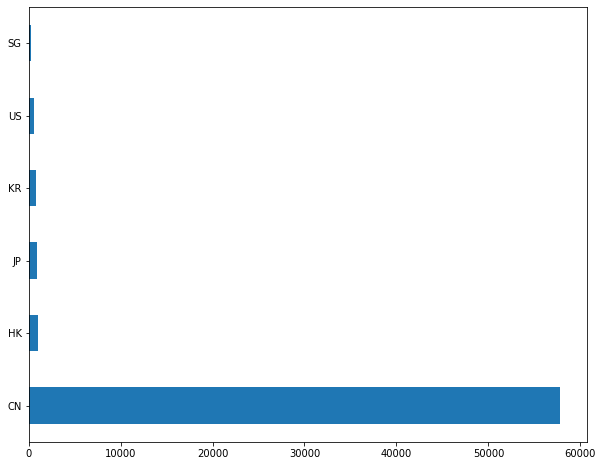

In [60]:
flight['WORK_COUNTRY'].value_counts().head(6).plot(kind='barh',figsize=(10,8))

In [61]:
flight['WORK_COUNTRY'].unique()

array(['CN', 'US', 'FR', 'AN', 'JP', 'HK', 'MY', 'AU', 'NL', 'MX', 'CA',
       'KR', 'PK', 'TH', 'SG', 'BR', 'PE', 'AE', 'HN', 'PH', 'ID', 'MO',
       'GN', 'FL', 'KH', 'TW', 'VN', 'DE', 'IL', 'CH', 'PA', 'VT', 'EC',
       'NG', 'BI', 'GT', 'BE', 'GL', 'NZ', 'FA', 'KO', 'CC', 'UV', 'MN',
       'UK', 'AS', 'IT', 'OM', 'SE', 'BZ', 'IN', 'KZ', 'PT', 'NO', 'MS',
       'FI', 'UZ', 'AT', 'AA', 'HU', 'CY', 'EG', 'MA', 'ES', 'MZ', 'IR',
       'SW', 'RE', 'PS', 'KE', 'SN', 'BB', 'AZ', 'UA', 'LB', 'YE', 'GE',
       'SI', 'KA', 'MV', 'RO', 'ZA', 'DK', 'AB', 'CD', 'UY', 'CM', 'TK',
       'AR', 'BN', 'PN', 'BD', 'SU', 'RU', 'GU', 'GB', 'ZW', 'PP', 'FD',
       'FO', 'IE', 'PR', 'BS', 'GH', 'SK', 'IA', 'cn', 'TR', 'LA', 'BG',
       'CL', 'CR', 'SA'], dtype=object)

**WORK_CITY**

In [62]:
flight[flight['WORK_CITY'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,NaN,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18.0,34.0,0.961639,619760.0,50.0
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17.0,29.0,1.252314,415768.0,33.0
2,55106,2007-02-01,2007-08-30,Male,6,NaN,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18.0,20.0,1.254676,406361.0,26.0
20,21501,2008-07-30,2008-11-21,Male,6,NaN,beijing,CN,49.0,2014-03-31,...,122763.0,167113,2014-03-28,4,6.438095,31.0,4.0,1.369404,251134.0,9.0
23,28474,2010-04-13,2010-04-13,Male,6,NaN,CA,US,41.0,2014-03-31,...,59600.0,222380,2014-01-18,74,32.789474,110.0,8.0,1.004904,280760.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,31906,2011-03-09,2013-09-10,Male,4,NaN,NaN,TW,51.0,2014-03-31,...,1260.0,368,2013-09-15,199,5.000000,5.0,NaN,0.835000,700.0,NaN
62956,2213,2005-05-18,2005-07-19,Female,4,NaN,NaN,CN,45.0,2014-03-31,...,422.0,904,2014-01-19,73,41.000000,41.0,NaN,0.320000,NaN,NaN
62967,359,2012-04-12,2012-05-30,Male,4,NaN,guangdong,CN,34.0,2014-03-31,...,NaN,1096,2012-05-31,671,1.000000,1.0,NaN,0.250000,NaN,NaN
62970,38088,2005-03-11,2005-06-16,Female,4,NaN,NaN,CN,47.0,2014-03-31,...,NaN,1096,2012-10-11,538,2.000000,2.0,NaN,0.250000,NaN,NaN


In [63]:
flight['WORK_CITY'] = flight['WORK_CITY'].fillna('other')

In [64]:
flight.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,other,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18.0,34.0,0.961639,619760.0,50.0
1,28065,2007-02-19,2007-08-03,Male,6,other,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17.0,29.0,1.252314,415768.0,33.0
2,55106,2007-02-01,2007-08-30,Male,6,other,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18.0,20.0,1.254676,406361.0,26.0
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73.0,11.0,1.090870,372204.0,12.0
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47.0,27.0,0.970658,338813.0,39.0


**WORK_PROVINCE**

In [65]:
flight[flight['WORK_PROVINCE'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
8,32197,2011-06-07,2011-07-01,Male,5,DRANCY,NaN,FR,50.0,2014-03-31,...,87401.0,321489,2014-03-26,6,13.054545,94.0,5.0,0.828478,295158.0,7.0
11,37994,2004-11-13,2004-12-02,Male,6,beijing,NaN,CN,47.0,2014-03-31,...,126821.0,271438,2014-03-26,6,5.027778,42.0,15.0,0.952535,353101.0,66.0
17,58899,2010-11-10,2011-02-23,Female,6,PARIS,NaN,FR,50.0,2014-03-31,...,63260.0,284160,2014-02-16,45,17.589744,77.0,12.0,0.837844,281705.0,13.0
24,58472,2010-02-14,2010-03-01,Female,5,other,NaN,FR,48.0,2014-03-31,...,75816.0,281837,2014-03-15,17,15.883721,66.0,10.0,0.787308,235939.0,12.0
34,28014,2006-12-01,2011-01-07,Female,6,Paris,NaN,FR,48.0,2014-03-31,...,69298.0,285144,2014-03-29,3,15.804348,105.0,5.0,0.725686,251712.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,2005-05-08,2005-08-26,Male,4,other,NaN,CN,34.0,2014-03-31,...,960.0,368,2014-01-03,89,70.000000,70.0,NaN,0.710000,900.0,1.0
62975,30765,2008-11-16,2013-11-30,Male,4,TAIPEI,NaN,TW,38.0,2014-03-31,...,910.0,368,2013-12-02,121,2.000000,2.0,NaN,0.670000,400.0,NaN
62977,16372,2012-12-20,2012-12-20,Male,4,taoyuan,NaN,TW,47.0,2014-03-31,...,NaN,904,2012-12-24,464,4.000000,4.0,NaN,0.250000,NaN,NaN
62982,16415,2013-01-20,2013-01-20,Female,4,beijing,NaN,CN,35.0,2014-03-31,...,NaN,3848,2013-01-20,437,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
flight['WORK_PROVINCE'] = flight['WORK_PROVINCE'].fillna('other')

In [67]:
flight['WORK_PROVINCE'].isnull().sum()

0

In [68]:
flight.tail(2)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
62986,61027,2013-02-06,2013-02-14,Female,4,guangzhou,guangdong,CN,36.0,2014-03-31,...,NaN,3934,2013-02-26,400,12.0,12.0,NaN,NaN,NaN,NaN
62987,61340,2013-02-17,2013-02-17,Female,4,shanghai,other,CN,29.0,2014-03-31,...,NaN,4222,2013-02-23,403,6.0,6.0,NaN,NaN,NaN,NaN


**GENDER**

In [69]:
flight[flight['GENDER'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
271,58411,2009-12-12,2010-04-15,NaN,6,MENAI,SYDNEY,AU,61.0,2014-03-31,...,89477.0,105377,2014-03-31,1,43.000000,175.0,2.0,1.056396,159060.0,3.0
22471,55908,2012-10-14,2013-01-14,NaN,4,PARAMUS,NEW JERSEY,US,43.0,2014-03-31,...,5670.0,8604,2014-03-18,14,61.285714,173.0,NaN,1.258319,12220.0,NaN
42565,4533,2011-01-25,2011-02-01,NaN,4,guangzhoushi,guangdong,CN,62.0,2014-03-31,...,NaN,7845,2013-02-26,400,16.250000,31.0,NaN,0.521791,2982.0,NaN


In [70]:
flight['GENDER'].fillna(flight['GENDER'].mode()[0], inplace=True)

In [71]:
flight['GENDER'].isnull().sum()

0

In [72]:
flight.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,other,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18.0,34.0,0.961639,619760.0,50.0
1,28065,2007-02-19,2007-08-03,Male,6,other,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17.0,29.0,1.252314,415768.0,33.0
2,55106,2007-02-01,2007-08-30,Male,6,other,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18.0,20.0,1.254676,406361.0,26.0
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73.0,11.0,1.090870,372204.0,12.0
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47.0,27.0,0.970658,338813.0,39.0


**SUM_YR_1 dan SUM_YR_2**

In [73]:
print("Shape of train data Before dropping any Row: ",flight.shape)
flight = flight[flight['SUM_YR_1'].notna()]
print("Shape of train data After dropping Rows with NULL values in 'SUM_YR_1': ",flight.shape)
flight = flight[flight['SUM_YR_2'].notna()]
print("Shape of train data After dropping Rows with NULL values in 'SUM_YR_2' : ",flight.shape)

Shape of train data Before dropping any Row:  (62988, 23)
Shape of train data After dropping Rows with NULL values in 'SUM_YR_1':  (52522, 23)
Shape of train data After dropping Rows with NULL values in 'SUM_YR_2' :  (41516, 23)


In [74]:
flight.reset_index(drop=True)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,other,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18.0,34.0,0.961639,619760.0,50.0
1,28065,2007-02-19,2007-08-03,Male,6,other,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17.0,29.0,1.252314,415768.0,33.0
2,55106,2007-02-01,2007-08-30,Male,6,other,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18.0,20.0,1.254676,406361.0,26.0
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73.0,11.0,1.090870,372204.0,12.0
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47.0,27.0,0.970658,338813.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41511,54279,2011-02-18,2011-04-13,Female,4,guangzhou,guangdong,CN,30.0,2014-03-31,...,272.0,1494,2013-09-20,194,360.000000,360.0,NaN,0.295000,1914.0,22.0
41512,9248,2011-09-07,2011-09-19,Male,4,guangzhou,guangdong,CN,32.0,2014-03-31,...,508.0,928,2013-08-13,232,271.000000,271.0,NaN,0.462931,3979.0,23.0
41513,1710,2012-06-07,2012-07-12,Male,4,beijingshi,beijing,CN,26.0,2014-03-31,...,178.0,1158,2013-05-15,322,307.000000,307.0,NaN,0.325000,1700.0,1.0
41514,52441,2013-01-14,2013-01-14,Male,4,ISTANBUL,TOPKPPI,TR,58.0,2014-03-31,...,760.0,368,2013-12-06,117,326.000000,326.0,NaN,0.945000,1000.0,NaN


**AVG_INTERVAL**


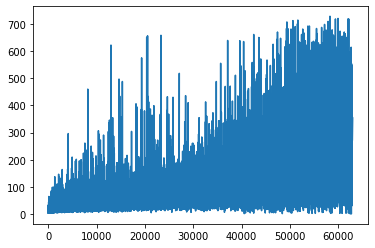

In [75]:
flight['AVG_INTERVAL'].plot()

In [76]:
med_avg_interval = flight['AVG_INTERVAL'].median()
med_avg_interval

50.25

In [77]:
flight['AVG_INTERVAL'] = flight['AVG_INTERVAL'].fillna(med_avg_interval)

In [78]:
flight['AVG_INTERVAL'].isnull().any()

False

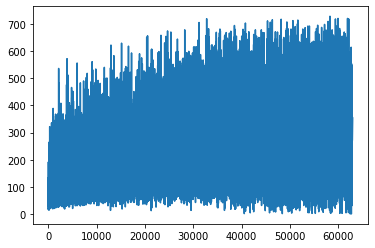

In [79]:
flight['MAX_INTERVAL'].plot()

In [80]:
med_max_interval = flight['MAX_INTERVAL'].median()
med_max_interval

176.0

In [81]:
flight['MAX_INTERVAL'] = flight['MAX_INTERVAL'].fillna(med_avg_interval)

In [82]:
flight['MAX_INTERVAL'].isnull().any()

False

**EXCHANGE_COUNT**

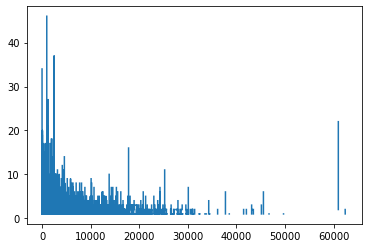

In [83]:
flight['EXCHANGE_COUNT'].plot()

In [84]:
med_exchange = flight['EXCHANGE_COUNT'].median()
med_exchange

2.0

In [85]:
flight['EXCHANGE_COUNT'] = flight['EXCHANGE_COUNT'].fillna(med_avg_interval)

In [86]:
flight['EXCHANGE_COUNT'].isnull().sum()

0

**Point_Sum**

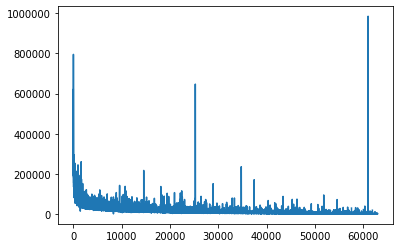

In [87]:
flight['Points_Sum'].plot()

In [88]:
flight['Points_Sum'].describe()

count     41472.000000
mean      16644.942564
std       23735.767108
min          37.000000
25%        4723.750000
50%        9676.000000
75%       19461.000000
max      985572.000000
Name: Points_Sum, dtype: float64

In [89]:
med_pointsum = flight['Points_Sum'].median()
med_pointsum

9676.0

In [90]:
flight['Points_Sum'] = flight['Points_Sum'].fillna(med_avg_interval)

In [91]:
flight['Points_Sum'].isnull().any()

False

**Point_NotFlight**

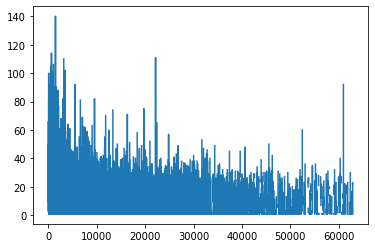

In [92]:
flight['Point_NotFlight'].plot()

In [93]:
med_poinnotflight= flight['Point_NotFlight'].median()
med_poinnotflight

3.0

In [94]:
flight['Point_NotFlight'] = flight['Point_NotFlight'].fillna(med_poinnotflight)

In [95]:
flight['Point_NotFlight'].isnull().sum()

0

**BP_SUM**

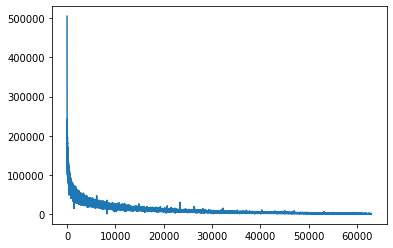

In [96]:
flight['BP_SUM'].plot()

In [97]:
flight['BP_SUM'].describe()

count     41456.000000
mean      14557.790790
std       18822.876049
min         200.000000
25%        4321.750000
50%        8844.500000
75%       17525.500000
max      505308.000000
Name: BP_SUM, dtype: float64

In [98]:
med_bp= flight['BP_SUM'].median()
med_bp

8844.5

In [99]:
flight['BP_SUM'] = flight['BP_SUM'].fillna(med_bp)

In [100]:
flight['BP_SUM'].isnull().sum()

0

**Age**

In [101]:
flight['AGE'].isnull().sum()

223

In [102]:
flight['AGE'].describe()

count    41293.000000
mean        42.899160
std          9.750734
min         12.000000
25%         36.000000
50%         42.000000
75%         48.000000
max        110.000000
Name: AGE, dtype: float64

In [103]:
med_age= flight['AGE'].median()
med_age

42.0

In [104]:
flight['AGE'] = flight['AGE'].fillna(med_age)

In [105]:
flight['AGE'].isnull().sum()

0

In [106]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41516 entries, 0 to 62958
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          41516 non-null  int64         
 1   FFP_DATE           41516 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  41516 non-null  datetime64[ns]
 3   GENDER             41516 non-null  object        
 4   FFP_TIER           41516 non-null  int64         
 5   WORK_CITY          41516 non-null  object        
 6   WORK_PROVINCE      41516 non-null  object        
 7   WORK_COUNTRY       41516 non-null  object        
 8   AGE                41516 non-null  float64       
 9   LOAD_TIME          41516 non-null  datetime64[ns]
 10  FLIGHT_COUNT       41516 non-null  int64         
 11  BP_SUM             41516 non-null  float64       
 12  SUM_YR_1           41516 non-null  float64       
 13  SUM_YR_2           41516 non-null  float64       
 14  SEG_KM

## Outliers

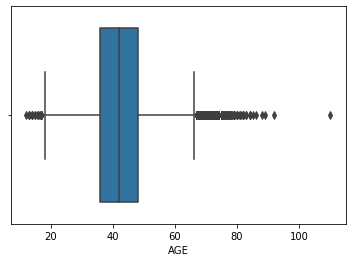

In [107]:
import seaborn as sns
sns.boxplot(flight['AGE'])

In [108]:
#delete age >100 (handling outlier)
flight.drop(flight[flight['AGE'] > 100].index, inplace = True)

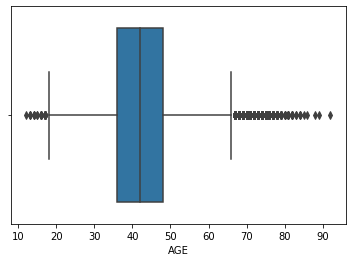

In [109]:
sns.boxplot(flight['AGE'])

# Data Pre-processing

## EDA (Exploratory Data Analysis)

**1. Berapa perolehan customer setiap tahun ?**

In [110]:
from datetime import datetime 
ffp = flight['FFP_DATE']
ffp_year = ffp.map(lambda x: x.year)

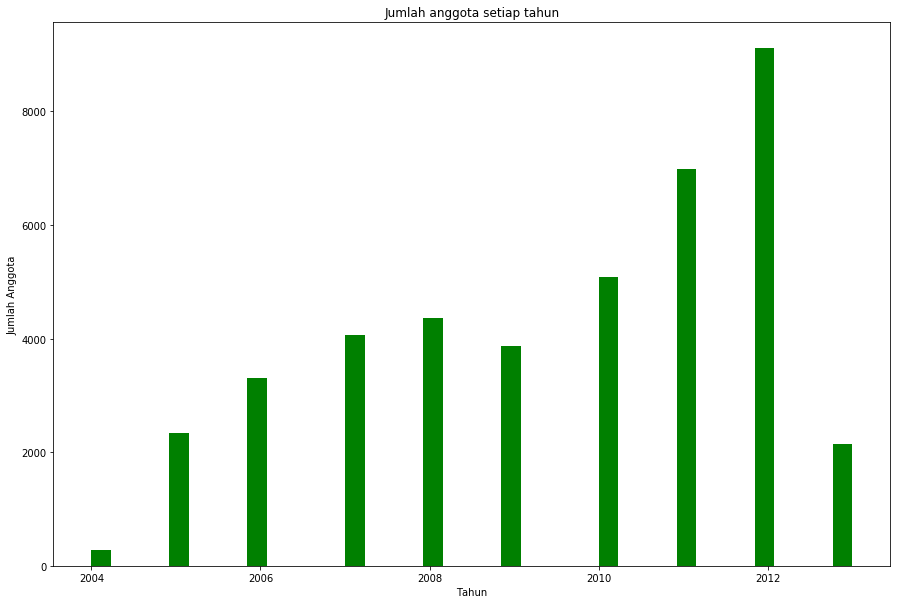

In [111]:
# Gambar histogram jumlah anggota di setiap tahun
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 10))

plt.hist(ffp_year,bins='auto', color='green')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Anggota')
plt.title('Jumlah anggota setiap tahun')
plt.show()


**2. Gender apa yang paling banyak ?**

In [112]:
flight['GENDER'].value_counts(normalize=True)

Male      0.785716
Female    0.214284
Name: GENDER, dtype: float64

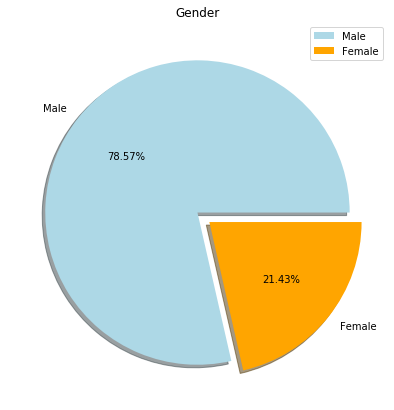

In [113]:
# Visualization on customers gender's percentage

labels = ['Male', 'Female']
size = flight['GENDER'].value_counts()
colors = ['lightblue', 'orange']
explode = [0, 0.1]

# Plot pie chart
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender')
plt.axis('off')
plt.legend()
plt.show()

**3. Gender apa yang paling dominan di setiap tier ?**

In [114]:
pd.crosstab(flight.FFP_TIER, flight.GENDER,margins=True)

GENDER,Female,Male,All
FFP_TIER,,,
4,8307,28709,37016
5,452,2700,3152
6,137,1210,1347
All,8896,32619,41515


In [115]:
print ('jumlah pria dengan ffp tier 4 adalah sekitar {}%'.format(27415/31317*100))
print ('jumlah wanita dengan ffp tier 4 adalah sekitar {}%'.format(7753/8341*100))
print ('\n===============================')
print ('jumlah pria dengan ffp tier 5 adalah sekitar {}%'.format(2697/31317*100))
print ('jumlah wanita dengan ffp tier 5 adalah sekitar {}%'.format(451/8341*100))
print ('\n===============================')
print ('jumlah pria dengan ffp tier 6 adalah sekitar {}%'.format(1205/31317*100))
print ('jumlah wanita dengan ffp tier 6 adalah sekitar {}%'.format(137/8341*100))

jumlah pria dengan ffp tier 4 adalah sekitar 87.54031356771083%
jumlah wanita dengan ffp tier 4 adalah sekitar 92.95048555329097%

jumlah pria dengan ffp tier 5 adalah sekitar 8.611936009196283%
jumlah wanita dengan ffp tier 5 adalah sekitar 5.407025536506414%

jumlah pria dengan ffp tier 6 adalah sekitar 3.847750423092889%
jumlah wanita dengan ffp tier 6 adalah sekitar 1.6424889102026135%


Text(0.5, 1.0, 'Gender in Each Tier')

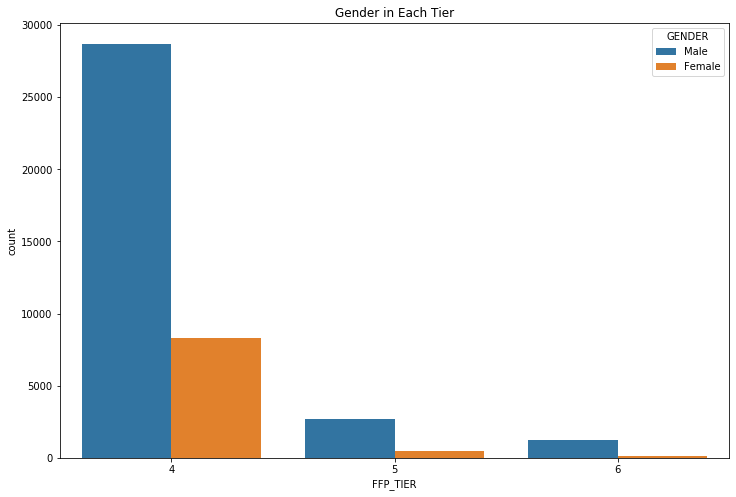

In [116]:
import seaborn as sns
plt.figure(figsize=(12,8))

sns.countplot(flight.FFP_TIER, hue=flight.GENDER)
plt.title('Gender in Each Tier')

**4. bagaimana visual setiap tier ?**

**FFP_TIER**

In [117]:
flight['FFP_TIER'].value_counts()

4    37016
5     3152
6     1347
Name: FFP_TIER, dtype: int64

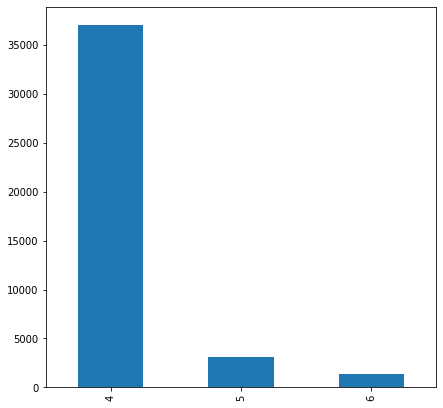

In [118]:
flight['FFP_TIER'].value_counts().plot(kind='bar')

**ffp tier punya korelasi yang kuat dengan flight count, BP_SUM, SUM_YR_1,SUM_YR_2,SEG_KM_SUM, POINTS_SUM**
   

In [119]:
# fig = plt.subplots(figsize=(10, 7))
# x = flight['SUM_YR_1']
# y = flight['FFP_TIER']

# sns.regplot(x, y, data=flight,color='red')
# plt.title('FARE REVENUE PER TIER')

In [120]:
# fig, ax = plt.subplots(figsize=(10, 7))
# x = flight['SUM_YR_2']
# y = flight['FFP_TIER']

# sns.regplot(x, y, data=flight, ax=ax,color='#00b894')
# plt.title('FARE DISCOUNT PER TIER')

In [121]:
# fig, ax = plt.subplots(figsize=(10, 7))
# x = flight['BP_SUM']
# y = flight['FFP_TIER']

# sns.regplot(x, y, data=flight, ax=ax,color='#00b894')
# plt.title('BP SUM PER TIER')

In [122]:
# fig, ax = plt.subplots(figsize=(15, 7))
# x = flight['MAX_INTERVAL']
# y = flight['FFP_TIER']

# sns.regplot(x, y, data=flight,color='#00b894')
# plt.title('MAX INTERVAL PER TIER')

In [123]:
# fig, ax = plt.subplots(figsize=(15, 7))
# x = flight['SEG_KM_SUM']
# y = flight['FFP_TIER']

# sns.regplot(x, y, data=flight, ax=ax,color='#00b894')
# plt.title('SEG_KM PER TIER')

**5. Country mana yang paling banyak customer?**

Text(0.5, 1.0, 'The Most Country')

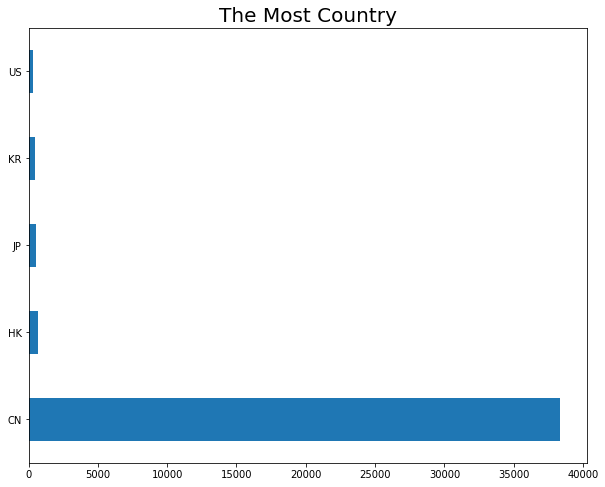

In [124]:
fig = plt.figure(figsize=(10, 8))
flight['WORK_COUNTRY'].value_counts().head().plot(kind='barh')
plt.title('The Most Country',fontsize=20)

**6. Berapa rata rata umur customer?**

In [125]:
flight['AGE'].describe() 

count    41515.000000
mean        42.892713
std          9.719271
min         12.000000
25%         36.000000
50%         42.000000
75%         48.000000
max         92.000000
Name: AGE, dtype: float64

In [126]:
flight['AGE'].mean()

42.89271347705649

Text(0.5, 1.0, 'Average Age of Customer')

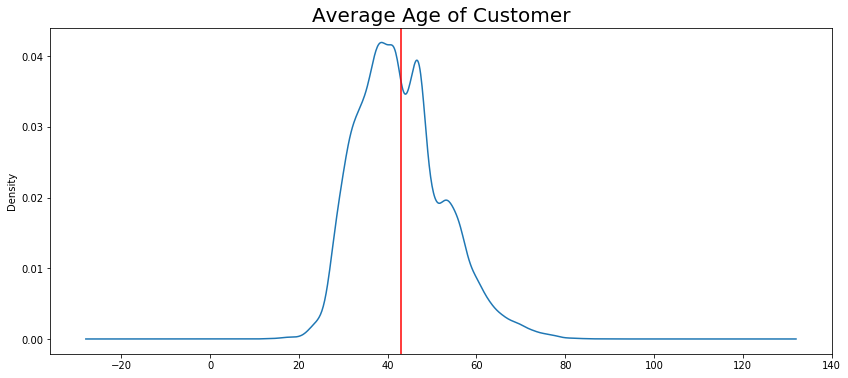

In [127]:
ax = flight['AGE'].plot(kind='density',figsize=(14,6))
ax.axvline(flight['AGE'].mean(),color='red')
plt.title('Average Age of Customer',fontsize=20)

**Analisis Distribusi Data**

**Exchange Count**

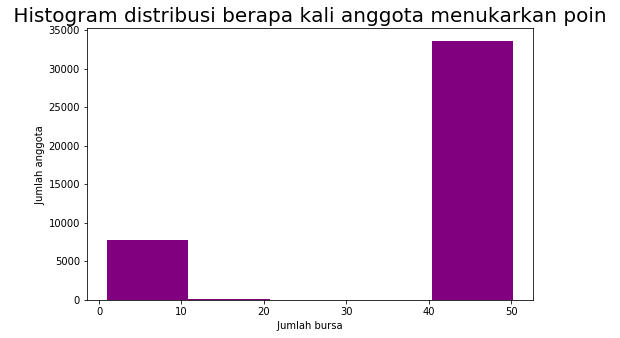

In [128]:
ec = flight['EXCHANGE_COUNT']

#Gambar histogram frekuensi anggota menukarkan poin
fig = plt.figure(figsize=(8, 5))
plt.hist(ec, bins=5, color='purple')
plt.xlabel(' Jumlah bursa ')
plt.ylabel(' Jumlah anggota ')
plt.title(' Histogram distribusi berapa kali anggota menukarkan poin ',fontsize=20)
plt.show()


**Point Sum**

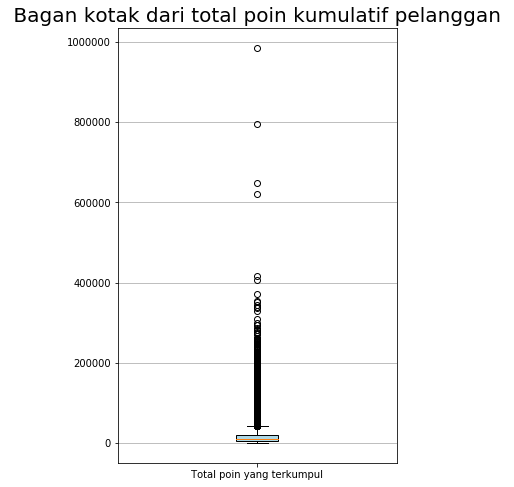

In [129]:
# Tarik total poin akumulasi anggota
ps = flight['Points_Sum']
# Gambarlah diagram kotak dari total poin yang terkumpul dari anggota
fig = plt.figure(figsize=(5, 8))
plt.boxplot(ps, patch_artist=True, labels=[' Total poin yang terkumpul '], boxprops={'facecolor': 'lightblue'})
plt.title(' Bagan kotak dari total poin kumulatif pelanggan ',fontsize=20)
plt.grid(axis='y')
plt.show()


**Last To End**

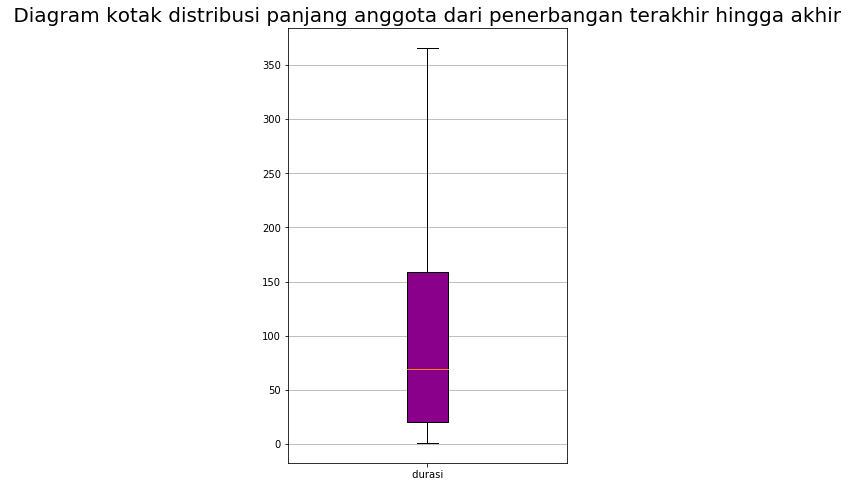

In [130]:
lte = flight['LAST_TO_END']
fig = plt.figure(figsize=(5, 8))
plt.boxplot(lte, patch_artist=True, labels=[' durasi '], boxprops={'facecolor': 'darkmagenta'})
plt.title(' Diagram kotak distribusi panjang anggota dari penerbangan terakhir hingga akhir ',fontsize=20)
plt.grid(axis='y')
plt.show()

**Flight Count**

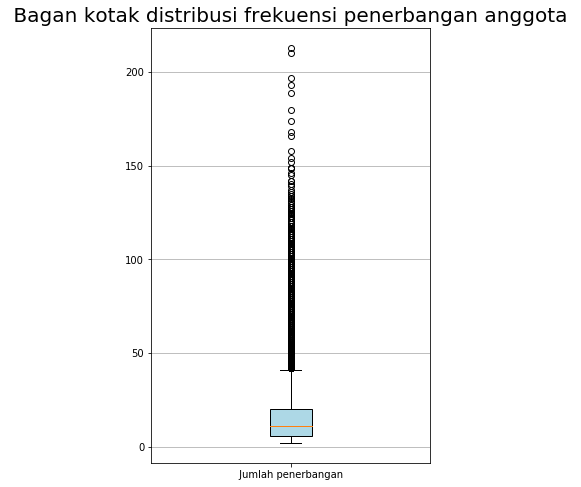

In [131]:
fc = flight['FLIGHT_COUNT']
fig = plt.figure(figsize=(5, 8))
plt.boxplot(fc, patch_artist=True, labels=[' Jumlah penerbangan '], boxprops={'facecolor': 'lightblue'})
plt.title(' Bagan kotak distribusi frekuensi penerbangan anggota ',fontsize=20)
plt.grid(axis='y')
plt.show()

**SEG KM SUM**

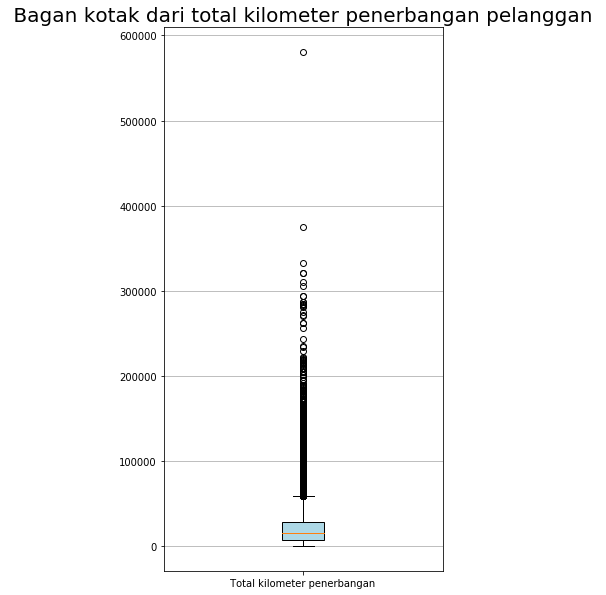

In [132]:
skc = flight['SEG_KM_SUM']
fig = plt.figure(figsize=(5, 10))
plt.boxplot(skc, patch_artist=True, labels=[' Total kilometer penerbangan '], boxprops={'facecolor': 'lightblue'})
plt.title(' Bagan kotak dari total kilometer penerbangan pelanggan ',fontsize=20)
plt.grid(axis='y')
plt.show()


**Point Not Flight**

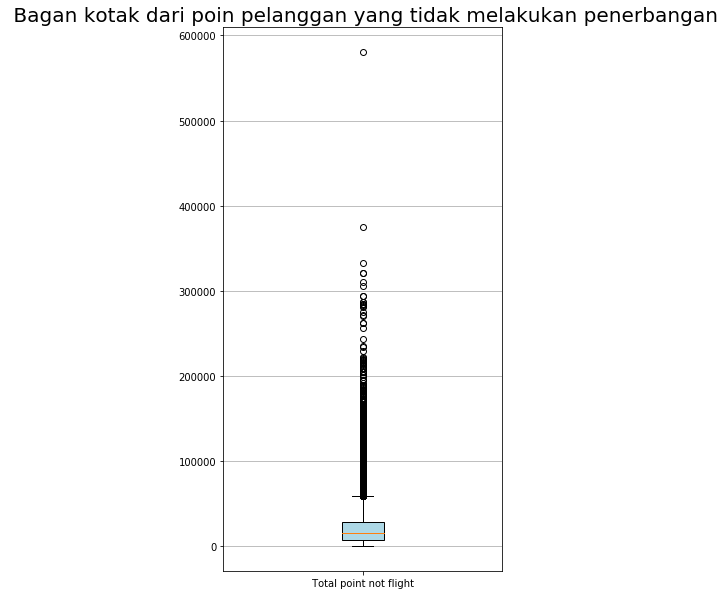

In [133]:
pnf = flight['Point_NotFlight']
fig = plt.figure(figsize=(5, 10))
plt.boxplot(skc, patch_artist=True, labels=[' Total point not flight '], boxprops={'facecolor': 'lightblue'})
plt.title(' Bagan kotak dari poin pelanggan yang tidak melakukan penerbangan',fontsize=20)
plt.grid(axis='y')
plt.show()


## Korelasi Antar Variabel

In [134]:
#Ekstrak atribut dan gabungkan menjadi kumpulan data baru
data_corr = flight[['FFP_TIER', 'LAST_TO_END','EXCHANGE_COUNT','FLIGHT_COUNT', 'SEG_KM_SUM',  'Points_Sum','BP_SUM']]
age1 = flight['AGE'].fillna(0)
data_corr['AGE'] = age1.astype('int64')
data_corr['ffp_year'] = ffp_year

C:\Users\niken\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\niken\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [135]:
dt_corr = data_corr.corr(method='pearson')
print('Matriks korelasi：\n', dt_corr)

Matriks korelasi：
                 FFP_TIER  LAST_TO_END  EXCHANGE_COUNT  FLIGHT_COUNT  \
FFP_TIER        1.000000    -0.240383       -0.249784      0.606193   
LAST_TO_END    -0.240383     1.000000        0.199265     -0.409334   
EXCHANGE_COUNT -0.249784     0.199265        1.000000     -0.417601   
FLIGHT_COUNT    0.606193    -0.409334       -0.417601      1.000000   
SEG_KM_SUM      0.538003    -0.362585       -0.405156      0.830679   
Points_Sum      0.575897    -0.286945       -0.383327      0.730729   
BP_SUM          0.597360    -0.313421       -0.377871      0.765461   
AGE             0.080462    -0.037271       -0.003723      0.068922   
ffp_year       -0.128843     0.107101        0.271458     -0.203726   

                SEG_KM_SUM  Points_Sum    BP_SUM       AGE  ffp_year  
FFP_TIER          0.538003    0.575897  0.597360  0.080462 -0.128843  
LAST_TO_END      -0.362585   -0.286945 -0.313421 -0.037271  0.107101  
EXCHANGE_COUNT   -0.405156   -0.383327 -0.377871 -0.00372

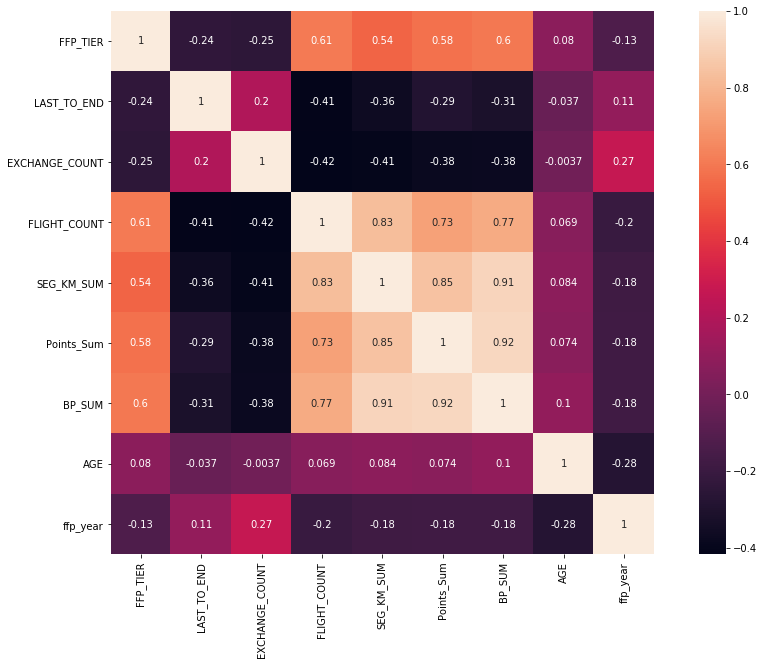

In [136]:
# Gambar heatmap
import seaborn as sns

# plt.subplots(figsize=(10, 10))
plt.figure(figsize=(16,10))
sns.heatmap(dt_corr, annot=True, vmax=1, square=True, cmap='rocket')

plt.show()


## feature engineering

In [137]:
flight.head(2)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,other,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18.0,34.0,0.961639,619760.0,50.0
1,28065,2007-02-19,2007-08-03,Male,6,other,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17.0,29.0,1.252314,415768.0,33.0


In [138]:
#membership 
flight['MEMBER_TIME'] = flight['LOAD_TIME'] - flight['FFP_DATE']
flight['MEMBER_TIME']

0       2706 days
1       2597 days
2       2615 days
3       2047 days
4       1816 days
           ...   
62876   1137 days
62887    936 days
62919    662 days
62932    441 days
62958    402 days
Name: MEMBER_TIME, Length: 41515, dtype: timedelta64[ns]

In [139]:
#flight time
flight['FLIGHT_TIME'] = flight['LAST_FLIGHT_DATE'] - flight['FIRST_FLIGHT_DATE']
flight['FLIGHT_TIME']

0       1923 days
1       2426 days
2       2395 days
3       1951 days
4       1807 days
           ...   
62876    891 days
62887    694 days
62919    307 days
62932    326 days
62958    354 days
Name: FLIGHT_TIME, Length: 41515, dtype: timedelta64[ns]

In [140]:
#avg_fare_per_km
flight['AVG_FARE_PER_KM'] = flight['SUM_YR_1'] + flight['SUM_YR_2'] + flight['BP_SUM'] / flight['SEG_KM_SUM']
flight['AVG_FARE_PER_KM']

0        473748.870145
1        338918.234277
2        328601.237731
3        241851.198972
4        255262.883573
             ...      
62876       477.920013
62887       683.538793
62919       462.172712
62932      1422.717391
62958      1031.902174
Name: AVG_FARE_PER_KM, Length: 41515, dtype: float64

In [141]:
#time_interval_different
flight['TIME_INTERVAL_DIFF'] = flight['MAX_INTERVAL'] - flight['AVG_INTERVAL'] 
flight['TIME_INTERVAL_DIFF']

0        14.516746
1        11.805755
2        12.701493
3        45.136364
4        42.211921
           ...    
62876     0.000000
62887     0.000000
62919     0.000000
62932     0.000000
62958     0.000000
Name: TIME_INTERVAL_DIFF, Length: 41515, dtype: float64

In [142]:
#country (china or other)
def country(x):
    if x['WORK_COUNTRY']== 'CN' :
        segment = 'CHINA'
    else:
        segment = 'OTHER'
    return segment
        
flight['country']=flight.apply(lambda x: country(x),axis=1)

In [143]:
flight.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country
0,54993,2006-11-02,2008-12-24,Male,6,other,beijing,CN,31.0,2014-03-31,...,18.0,34.0,0.961639,619760.0,50.0,2706 days,1923 days,473748.870145,14.516746,CHINA
1,28065,2007-02-19,2007-08-03,Male,6,other,beijing,CN,42.0,2014-03-31,...,17.0,29.0,1.252314,415768.0,33.0,2597 days,2426 days,338918.234277,11.805755,CHINA
2,55106,2007-02-01,2007-08-30,Male,6,other,beijing,CN,40.0,2014-03-31,...,18.0,20.0,1.254676,406361.0,26.0,2615 days,2395 days,328601.237731,12.701493,CHINA
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,73.0,11.0,1.090870,372204.0,12.0,2047 days,1951 days,241851.198972,45.136364,OTHER
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,47.0,27.0,0.970658,338813.0,39.0,1816 days,1807 days,255262.883573,42.211921,CHINA


In [144]:
flight.head(2)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country
0,54993,2006-11-02,2008-12-24,Male,6,other,beijing,CN,31.0,2014-03-31,...,18.0,34.0,0.961639,619760.0,50.0,2706 days,1923 days,473748.870145,14.516746,CHINA
1,28065,2007-02-19,2007-08-03,Male,6,other,beijing,CN,42.0,2014-03-31,...,17.0,29.0,1.252314,415768.0,33.0,2597 days,2426 days,338918.234277,11.805755,CHINA


**drop columns**

In [145]:
flight = flight.drop(columns={'MEMBER_NO','WORK_COUNTRY','WORK_CITY','WORK_PROVINCE','FFP_DATE','LOAD_TIME','MAX_INTERVAL','AVG_INTERVAL','FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE'})

In [146]:
flight.head(2)

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country
0,Male,6,31.0,210,505308.0,239560.0,234188.0,580717,1,34.0,0.961639,619760.0,50.0,2706 days,1923 days,473748.870145,14.516746,CHINA
1,Male,6,42.0,140,362480.0,171483.0,167434.0,293678,7,29.0,1.252314,415768.0,33.0,2597 days,2426 days,338918.234277,11.805755,CHINA


**Find and Replace**

In [147]:
clean_nums = {'country' : {'CHINA':1, 'OTHER':0}}
flight.replace(clean_nums,inplace=True)

In [148]:
flight['MEMBER_TIME'] = flight['MEMBER_TIME'].astype('timedelta64[D]')
flight['FLIGHT_TIME'] = flight['FLIGHT_TIME'].astype('timedelta64[D]')

In [149]:
flight.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country
0,Male,6,31.0,210,505308.0,239560.0,234188.0,580717,1,34.0,0.961639,619760.0,50.0,2706.0,1923.0,473748.870145,14.516746,1
1,Male,6,42.0,140,362480.0,171483.0,167434.0,293678,7,29.0,1.252314,415768.0,33.0,2597.0,2426.0,338918.234277,11.805755,1
2,Male,6,40.0,135,351159.0,163618.0,164982.0,283712,11,20.0,1.254676,406361.0,26.0,2615.0,2395.0,328601.237731,12.701493,1
3,Male,5,64.0,23,337314.0,116350.0,125500.0,281336,97,11.0,1.090870,372204.0,12.0,2047.0,1951.0,241851.198972,45.136364,0
4,Male,6,48.0,152,273844.0,124560.0,130702.0,309928,5,27.0,0.970658,338813.0,39.0,1816.0,1807.0,255262.883573,42.211921,1


**Label Encoder**

In [150]:
#label encode
from sklearn.preprocessing import LabelEncoder

In [151]:
le = LabelEncoder()
flight['GENDER'] = le.fit_transform(flight['GENDER']) 


In [152]:
flight.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country
0,1,6,31.0,210,505308.0,239560.0,234188.0,580717,1,34.0,0.961639,619760.0,50.0,2706.0,1923.0,473748.870145,14.516746,1
1,1,6,42.0,140,362480.0,171483.0,167434.0,293678,7,29.0,1.252314,415768.0,33.0,2597.0,2426.0,338918.234277,11.805755,1
2,1,6,40.0,135,351159.0,163618.0,164982.0,283712,11,20.0,1.254676,406361.0,26.0,2615.0,2395.0,328601.237731,12.701493,1
3,1,5,64.0,23,337314.0,116350.0,125500.0,281336,97,11.0,1.090870,372204.0,12.0,2047.0,1951.0,241851.198972,45.136364,0
4,1,6,48.0,152,273844.0,124560.0,130702.0,309928,5,27.0,0.970658,338813.0,39.0,1816.0,1807.0,255262.883573,42.211921,1


**Select Columns for All Feature**

In [153]:
#scaling dengan robust karena mampu menangani outlier
from sklearn.preprocessing import StandardScaler

In [154]:
scale = StandardScaler()

kolom_all = [x for x in flight.columns]

for kolom in kolom_all:
      flight[kolom] = scale.fit_transform(np.array(flight[kolom]).reshape(-1,1))

In [155]:
flight.head(2)

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country
0,0.52223,4.312276,-1.223637,12.364444,26.089580,25.333168,23.081307,23.664960,-1.025021,-0.379195,1.320337,25.417191,5.973154,1.358435,0.695182,26.274944,-1.374454,0.287819
1,0.52223,4.312276,-0.091851,7.909567,18.496592,17.914785,16.282231,11.495928,-0.963710,-0.644871,2.977895,16.820566,3.712656,1.231409,1.262802,18.558264,-1.407323,0.287819


**Select Columns for LRFMC**

In [156]:
df = flight[['MEMBER_TIME','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]

In [157]:
df.head(2)

,MEMBER_TIME,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,1.358435,-1.025021,12.364444,23.664960,1.320337
1,1.231409,-0.963710,7.909567,11.495928,2.977895


**Scaling**

In [158]:
#scaling dengan robust karena mampu menangani outlier
from sklearn.preprocessing import StandardScaler

In [159]:
scale = StandardScaler()

kolom_all = [x for x in df.columns]

for kolom in kolom_all:
      df[kolom] = scale.fit_transform(np.array(df[kolom]).reshape(-1,1))

C:\Users\niken\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\niken\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\niken\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

# Modeling

## All Features

In [160]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics 
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import davies_bouldin_score

### KMEANS

In [161]:
data1 = flight
data1.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country
0,0.52223,4.312276,-1.223637,12.364444,26.089580,25.333168,23.081307,23.664960,-1.025021,-0.379195,1.320337,25.417191,5.973154,1.358435,0.695182,26.274944,-1.374454,0.287819
1,0.52223,4.312276,-0.091851,7.909567,18.496592,17.914785,16.282231,11.495928,-0.963710,-0.644871,2.977895,16.820566,3.712656,1.231409,1.262802,18.558264,-1.407323,0.287819
2,0.52223,4.312276,-0.297630,7.591362,17.894748,17.057732,16.032489,11.073419,-0.922836,-1.123089,2.991359,16.424137,2.781862,1.252386,1.227819,17.967798,-1.396463,0.287819
3,0.52223,1.992830,2.171721,0.463558,17.158723,11.906917,12.011140,10.972689,-0.044049,-1.601306,2.057266,14.984694,0.920275,0.590448,0.726779,13.002886,-1.003210,-3.474403
4,0.52223,4.312276,0.525487,8.673260,13.784546,12.801564,12.540978,12.184848,-0.984147,-0.751142,1.371766,13.577531,4.510479,0.321245,0.564280,13.770468,-1.038667,0.287819


In [162]:
kmeans_model = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=123)
kmeans_model.fit(data1)

KMeans(n_clusters=2, random_state=123)

In [163]:
y_kmeans = kmeans_model.fit_predict(data1)

In [164]:
# Basically, number of clusters = the x-axis value of the point that is the corner of the "elbow"(the plot looks often looks like an elbow)
err = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, random_state=123)
    kmeans.fit(data1)
    err.append(kmeans.inertia_) # Sum of squared distances of samples to their closest cluster center.

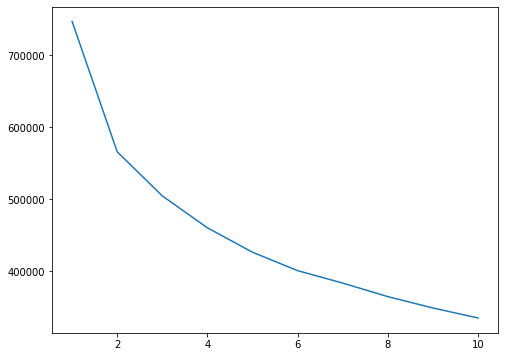

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline 

f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),err)
plt.show()

In [166]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state= 123)
    cluster_labels = clusterer.fit_predict(data1)
    
    #silhoutte score give avg value for all the samples.
    #this give 0 perspective into density and separation of the formed
    #clusters
    silhoutte_avg = silhouette_score(data1,cluster_labels)
    print("for n_cluster :", n_clusters,
         "the avg silhoutte score is :", silhoutte_avg)
    
    #compute the silhoutte score for each sample 
    sample_silhoutte_values = silhouette_samples(data1,cluster_labels)
    

for n_cluster : 2 the avg silhoutte score is : 0.42234042104550923
for n_cluster : 3 the avg silhoutte score is : 0.20865345313358338
for n_cluster : 4 the avg silhoutte score is : 0.14906817577899123
for n_cluster : 5 the avg silhoutte score is : 0.164213573228731
for n_cluster : 6 the avg silhoutte score is : 0.15931622971870507
for n_cluster : 7 the avg silhoutte score is : 0.1337619677359813
for n_cluster : 8 the avg silhoutte score is : 0.1544894268277321
for n_cluster : 9 the avg silhoutte score is : 0.13768927990060756
for n_cluster : 10 the avg silhoutte score is : 0.14307343034390102


In [166]:
k= 2
kmeans_model= KMeans(n_clusters=k,random_state=123) 
fit_kmeans = kmeans_model.fit(data1)
y_kmeans = kmeans_model.fit_predict(data1)

In [167]:
kmeans_cc = kmeans_model.cluster_centers_  #Clustering center
print(' Pusat cluster adalah：\n', kmeans_cc)

 Pusat cluster adalah：
 [[-2.52842248e-02 -2.36272364e-01 -2.84283899e-02 -2.69095864e-01
  -2.64796719e-01 -2.42272784e-01 -2.60378785e-01 -2.65932839e-01
   1.03367639e-01  1.47847990e-01 -8.80569823e-02 -2.50901018e-01
  -8.37466666e-02 -7.13209957e-02 -8.59423419e-02 -2.73555528e-01
   8.71049904e-02 -1.96319119e-03]
 [ 1.83274208e-01  1.71263429e+00  2.06064876e-01  1.95055738e+00
   1.91939478e+00  1.75612869e+00  1.88737112e+00  1.92763001e+00
  -7.49266484e-01 -1.07168496e+00  6.38286276e-01  1.81867096e+00
   6.07042696e-01  5.16974481e-01  6.22958180e-01  1.98288352e+00
  -6.31385706e-01  1.42303082e-02]]


In [168]:
### kmeans_labels = kmeans_model.labels_  # Label kategori sampel
##print(' Label kategori dari setiap sampel adalah：\n', kmeans_labels)

In [169]:
r1 = pd.Series(kmeans_model.labels_).value_counts()  
#Statistik pohon dalam berbagai jenis sampel
print(' Angka akhir dari setiap kategori adalah：\n', r1)

 Angka akhir dari setiap kategori adalah：
 0    36494
1     5021
dtype: int64


In [170]:
# Keluarkan hasil clustering
cluster_center = pd.DataFrame(kmeans_model.cluster_centers_, columns=flight.columns)  # Tempatkan pusat cluster ke dataframe
cluster_center

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country
0,-0.025284,-0.236272,-0.028428,-0.269096,-0.264797,-0.242273,-0.260379,-0.265933,0.103368,0.147848,-0.088057,-0.250901,-0.083747,-0.071321,-0.085942,-0.273556,0.087105,-0.001963
1,0.183274,1.712634,0.206065,1.950557,1.919395,1.756129,1.887371,1.927630,-0.749266,-1.071685,0.638286,1.818671,0.607043,0.516974,0.622958,1.982884,-0.631386,0.014230


In [171]:
cluster_center.index = pd.DataFrame(kmeans_model.labels_).drop_duplicates().iloc[:, 0]  #Gunakan kategori sampel sebagai indeks dataframe
cluster_center

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country
0,,,,,,,,,,,,,,,,,,
1,-0.025284,-0.236272,-0.028428,-0.269096,-0.264797,-0.242273,-0.260379,-0.265933,0.103368,0.147848,-0.088057,-0.250901,-0.083747,-0.071321,-0.085942,-0.273556,0.087105,-0.001963
0,0.183274,1.712634,0.206065,1.950557,1.919395,1.756129,1.887371,1.927630,-0.749266,-1.071685,0.638286,1.818671,0.607043,0.516974,0.622958,1.982884,-0.631386,0.014230


In [172]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
from sklearn.metrics import  silhouette_score
silhouette_avg = silhouette_score(data1, y_kmeans)
silhouette_avg

0.42234042104550923

In [173]:
#score davies bouldin
from sklearn.metrics import  silhouette_score
davies_bouldin_score(data1, y_kmeans)

1.2700585948415468

In [174]:
data1.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country
0,0.52223,4.312276,-1.223637,12.364444,26.089580,25.333168,23.081307,23.664960,-1.025021,-0.379195,1.320337,25.417191,5.973154,1.358435,0.695182,26.274944,-1.374454,0.287819
1,0.52223,4.312276,-0.091851,7.909567,18.496592,17.914785,16.282231,11.495928,-0.963710,-0.644871,2.977895,16.820566,3.712656,1.231409,1.262802,18.558264,-1.407323,0.287819
2,0.52223,4.312276,-0.297630,7.591362,17.894748,17.057732,16.032489,11.073419,-0.922836,-1.123089,2.991359,16.424137,2.781862,1.252386,1.227819,17.967798,-1.396463,0.287819
3,0.52223,1.992830,2.171721,0.463558,17.158723,11.906917,12.011140,10.972689,-0.044049,-1.601306,2.057266,14.984694,0.920275,0.590448,0.726779,13.002886,-1.003210,-3.474403
4,0.52223,4.312276,0.525487,8.673260,13.784546,12.801564,12.540978,12.184848,-0.984147,-0.751142,1.371766,13.577531,4.510479,0.321245,0.564280,13.770468,-1.038667,0.287819


In [175]:
data1['kmeans_clustering'] = y_kmeans

In [176]:
data1.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country,kmeans_clustering
0,0.52223,4.312276,-1.223637,12.364444,26.089580,25.333168,23.081307,23.664960,-1.025021,-0.379195,1.320337,25.417191,5.973154,1.358435,0.695182,26.274944,-1.374454,0.287819,1
1,0.52223,4.312276,-0.091851,7.909567,18.496592,17.914785,16.282231,11.495928,-0.963710,-0.644871,2.977895,16.820566,3.712656,1.231409,1.262802,18.558264,-1.407323,0.287819,1
2,0.52223,4.312276,-0.297630,7.591362,17.894748,17.057732,16.032489,11.073419,-0.922836,-1.123089,2.991359,16.424137,2.781862,1.252386,1.227819,17.967798,-1.396463,0.287819,1
3,0.52223,1.992830,2.171721,0.463558,17.158723,11.906917,12.011140,10.972689,-0.044049,-1.601306,2.057266,14.984694,0.920275,0.590448,0.726779,13.002886,-1.003210,-3.474403,1
4,0.52223,4.312276,0.525487,8.673260,13.784546,12.801564,12.540978,12.184848,-0.984147,-0.751142,1.371766,13.577531,4.510479,0.321245,0.564280,13.770468,-1.038667,0.287819,1


In [177]:
quartiles = data1.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

       GENDER  FFP_TIER       AGE  FLIGHT_COUNT    BP_SUM  SUM_YR_1  SUM_YR_2  \
0.25  0.52223 -0.326616 -0.709189     -0.618340 -0.543506 -0.568131 -0.577039   
0.50  0.52223 -0.326616 -0.091851     -0.300135 -0.303294 -0.316736 -0.326176   
0.75  0.52223 -0.326616  0.525487      0.272635  0.156794  0.186925  0.177282   

      SEG_KM_SUM  LAST_TO_END  EXCHANGE_COUNT  avg_discount  Points_Sum  \
0.25   -0.615955    -0.830870        0.484253     -0.585482   -0.502184   
0.50   -0.311516    -0.330166        0.484253     -0.083088   -0.293624   
0.75    0.246848     0.589495        0.484253      0.428079    0.118820   

      Point_NotFlight  MEMBER_TIME  FLIGHT_TIME  AVG_FARE_PER_KM  \
0.25        -0.276459    -0.891919    -0.819222        -0.566659   
0.50        -0.276459    -0.215997    -0.242575        -0.310779   
0.75        -0.276459     0.820028     0.729036         0.179957   

      TIME_INTERVAL_DIFF   country  kmeans_clustering  
0.25           -0.695692  0.287819           

In [178]:
quartiles=quartiles.to_dict()
quartiles

{'GENDER': {0.25: 0.5222302995127497,
  0.5: 0.5222302995127497,
  0.75: 0.5222302995127497},
 'FFP_TIER': {0.25: -0.3266164488415951,
  0.5: -0.3266164488415951,
  0.75: -0.3266164488415951},
 'AGE': {0.25: -0.7091886170448878,
  0.5: -0.09185094350989749,
  0.75: 0.5254867300250928},
 'FLIGHT_COUNT': {0.25: -0.6183404087730793,
  0.5: -0.3001349001949982,
  0.75: 0.27263501524554756},
 'BP_SUM': {0.25: -0.5435057476952301,
  0.5: -0.3032943271856229,
  0.75: 0.15679413996064145},
 'SUM_YR_1': {0.25: -0.5681313588297485,
  0.5: -0.3167364948894485,
  0.75: 0.1869249967152617},
 'SUM_YR_2': {0.25: -0.5770388566604674,
  0.5: -0.32617565276259247,
  0.75: 0.17728225095937084},
 'SEG_KM_SUM': {0.25: -0.6159550977588232,
  0.5: -0.3115162649368997,
  0.75: 0.24684770215419388},
 'LAST_TO_END': {0.25: -0.8308699381502299,
  0.5: -0.33016585669279136,
  0.75: 0.5894947010861774},
 'EXCHANGE_COUNT': {0.25: 0.48425316328137824,
  0.5: 0.48425316328137824,
  0.75: 0.48425316328137824},
 'avg_d

In [179]:
km_seg = data1.copy()

In [180]:
km_seg.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country,kmeans_clustering
0,0.52223,4.312276,-1.223637,12.364444,26.089580,25.333168,23.081307,23.664960,-1.025021,-0.379195,1.320337,25.417191,5.973154,1.358435,0.695182,26.274944,-1.374454,0.287819,1
1,0.52223,4.312276,-0.091851,7.909567,18.496592,17.914785,16.282231,11.495928,-0.963710,-0.644871,2.977895,16.820566,3.712656,1.231409,1.262802,18.558264,-1.407323,0.287819,1
2,0.52223,4.312276,-0.297630,7.591362,17.894748,17.057732,16.032489,11.073419,-0.922836,-1.123089,2.991359,16.424137,2.781862,1.252386,1.227819,17.967798,-1.396463,0.287819,1
3,0.52223,1.992830,2.171721,0.463558,17.158723,11.906917,12.011140,10.972689,-0.044049,-1.601306,2.057266,14.984694,0.920275,0.590448,0.726779,13.002886,-1.003210,-3.474403,1
4,0.52223,4.312276,0.525487,8.673260,13.784546,12.801564,12.540978,12.184848,-0.984147,-0.751142,1.371766,13.577531,4.510479,0.321245,0.564280,13.770468,-1.038667,0.287819,1


In [181]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
## for Length

def LClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4    
    
## for Coeficient

def CClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [205]:
km_seg['MT_Quartile'] = km_seg['MEMBER_TIME'].apply(LClass, args=('MEMBER_TIME',quartiles,))
km_seg['LTE_Quartile'] = km_seg['LAST_TO_END'].apply(RClass, args=('LAST_TO_END',quartiles,))
km_seg['FC_Quartile'] = km_seg['FLIGHT_COUNT'].apply(FMClass, args=('FLIGHT_COUNT',quartiles,))
km_seg['SKS_Quartile'] = km_seg['SEG_KM_SUM'].apply(FMClass, args=('SEG_KM_SUM',quartiles,))
km_seg['AD_Quartile'] = km_seg['avg_discount'].apply(CClass, args=('avg_discount',quartiles,))
km_seg['FT_Quartile'] = km_seg['FLIGHT_TIME'].apply(LClass, args=('FLIGHT_TIME',quartiles,))
km_seg['EC_Quartile'] = km_seg['EXCHANGE_COUNT'].apply(LClass, args=('EXCHANGE_COUNT',quartiles,))
km_seg['PS_Quartile'] = km_seg['Points_Sum'].apply(FMClass, args=('Points_Sum',quartiles,))
km_seg['PN_Quartile'] = km_seg['Point_NotFlight'].apply(RClass, args=('Point_NotFlight',quartiles,))
km_seg['AVG_Quartile'] = km_seg['AVG_FARE_PER_KM'].apply(FMClass, args=('AVG_FARE_PER_KM',quartiles,))
km_seg['DIFF_Quartile'] = km_seg['TIME_INTERVAL_DIFF'].apply(CClass, args=('TIME_INTERVAL_DIFF',quartiles,))

In [206]:
km_seg['Class'] = km_seg.L_Quartile.map(str) \
                            + km_seg.MT_Quartile.map(str) \
                            + km_seg.LTE_Quartile.map(str) \
                            + km_seg.FC_Quartile.map(str) \
                            + km_seg.SKS_Quartile.map(str) \
                            + km_seg.AD_Quartile.map(str) \
                            + km_seg.FT_Quartile.map(str) \
                            + km_seg.EC_Quartile.map(str) \
                            + km_seg.PS_Quartile.map(str) \
                            + km_seg.PN_Quartile.map(str) \
                            + km_seg.AVG_Quartile.map(str) \
                            + km_seg.DIFF_Quartile.map(str)

In [207]:
km_seg.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,...,DIFF_Quartile,Class,Total Score,segment_customer,card_seg,MT_Quartile,LTE_Quartile,FC_Quartile,SKS_Quartile,AD_Quartile
0,0.52223,4.312276,-1.223637,12.364444,26.089580,25.333168,23.081307,23.664960,-1.025021,-0.379195,...,1,444444314141,34,need maintained,common,4,4,4,4,4
1,0.52223,4.312276,-0.091851,7.909567,18.496592,17.914785,16.282231,11.495928,-0.963710,-0.644871,...,1,444444414141,35,need maintained,common,4,4,4,4,4
2,0.52223,4.312276,-0.297630,7.591362,17.894748,17.057732,16.032489,11.073419,-0.922836,-1.123089,...,1,444444414141,35,need maintained,common,4,4,4,4,4
3,0.52223,1.992830,2.171721,0.463558,17.158723,11.906917,12.011140,10.972689,-0.044049,-1.601306,...,1,332444314141,31,need maintained,common,3,2,4,4,4
4,0.52223,4.312276,0.525487,8.673260,13.784546,12.801564,12.540978,12.184848,-0.984147,-0.751142,...,1,334444314141,33,need maintained,common,3,4,4,4,4


In [208]:
km_seg['Total Score'] = km_seg['MT_Quartile'] + km_seg['LTE_Quartile'] + km_seg['FC_Quartile'] + km_seg['SKS_Quartile'] +km_seg['AD_Quartile']+ km_seg['FT_Quartile'] + km_seg['EC_Quartile'] + km_seg['PS_Quartile'] +km_seg['PN_Quartile']+ km_seg['AVG_Quartile'] +km_seg['DIFF_Quartile']
km_seg.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,...,DIFF_Quartile,Class,Total Score,segment_customer,card_seg,MT_Quartile,LTE_Quartile,FC_Quartile,SKS_Quartile,AD_Quartile
0,0.52223,4.312276,-1.223637,12.364444,26.089580,25.333168,23.081307,23.664960,-1.025021,-0.379195,...,1,444444314141,34,need maintained,common,4,4,4,4,4
1,0.52223,4.312276,-0.091851,7.909567,18.496592,17.914785,16.282231,11.495928,-0.963710,-0.644871,...,1,444444414141,35,need maintained,common,4,4,4,4,4
2,0.52223,4.312276,-0.297630,7.591362,17.894748,17.057732,16.032489,11.073419,-0.922836,-1.123089,...,1,444444414141,35,need maintained,common,4,4,4,4,4
3,0.52223,1.992830,2.171721,0.463558,17.158723,11.906917,12.011140,10.972689,-0.044049,-1.601306,...,1,332444314141,31,need maintained,common,3,2,4,4,4
4,0.52223,4.312276,0.525487,8.673260,13.784546,12.801564,12.540978,12.184848,-0.984147,-0.751142,...,1,334444314141,33,need maintained,common,3,4,4,4,4


In [212]:
KM2 = km_seg[['MT_Quartile','LTE_Quartile','FC_Quartile','SKS_Quartile','FT_Quartile','EC_Quartile','AD_Quartile','PS_Quartile','PN_Quartile','kmeans_clustering','Total Score']]
KM2.head(2)

,MT_Quartile,LTE_Quartile,FC_Quartile,SKS_Quartile,FT_Quartile,EC_Quartile,AD_Quartile,PS_Quartile,PN_Quartile,kmeans_clustering,Total Score
0,4,4,4,4,3,1,4,4,1,1,34
1,4,4,4,4,4,1,4,4,1,1,35


In [214]:
# ini yg dianalisis lihat perbedaan dari cluster 0 sama 1 (ini untuk kmeans all features)

In [213]:
KM2.groupby('kmeans_clustering').mean().reset_index()

,kmeans_clustering,MT_Quartile,LTE_Quartile,FC_Quartile,SKS_Quartile,FT_Quartile,EC_Quartile,AD_Quartile,PS_Quartile,PN_Quartile,Total Score
0,0,2.425933,2.372226,2.202581,2.297857,2.409711,1.0,2.420590,2.294021,3.609443,25.945635
1,1,3.034654,3.513244,3.913961,3.967736,3.152958,1.0,3.077076,3.996614,2.402310,33.686915


In [186]:
km_seg.sort_values(by=['Class', 'Total Score'], ascending=[False,False]).head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,...,M_Quartile,C_Quartile,FT_Quartile,EC_Quartile,PS_Quartile,PN_Quartile,AVG_Quartile,DIFF_Quartile,Class,Total Score
1572,-1.914864,1.992830,1.451493,1.990945,2.171040,1.900268,0.340654,1.842746,-0.871744,-2.132659,...,4,4,4,1,4,4,4,4,44444414444,41
3564,0.522230,1.992830,0.525487,0.590841,1.266918,-0.043548,2.347254,0.651318,-1.004584,0.484253,...,4,4,4,1,4,4,4,4,44444414444,41
3876,0.522230,-0.326616,-0.297630,0.909046,1.184996,2.945185,-0.348787,0.720294,-1.014802,0.484253,...,4,4,4,1,4,4,4,4,44444414444,41
5176,0.522230,-0.326616,0.216818,0.399917,0.907172,0.150093,1.446469,0.622574,-0.912618,0.484253,...,4,4,4,1,4,4,4,4,44444414444,41
5229,0.522230,-0.326616,-0.400520,0.590841,0.771504,1.310302,0.257950,0.680316,-0.922836,0.484253,...,4,4,4,1,4,4,4,4,44444414444,41


In [187]:
km_seg.sort_values(by=['Class', 'Total Score']).head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,...,M_Quartile,C_Quartile,FT_Quartile,EC_Quartile,PS_Quartile,PN_Quartile,AVG_Quartile,DIFF_Quartile,Class,Total Score
46057,0.522230,-0.326616,-0.503409,-0.681982,-0.657591,-0.664461,-0.538131,-0.705239,1.519374,0.484253,...,1,1,1,1,1,1,1,1,11111111111,11
49952,-1.914864,-0.326616,-1.429416,-0.618340,-0.689754,-0.715568,-0.550455,-0.750051,1.785053,0.484253,...,1,1,1,1,1,1,1,1,11111111111,11
50702,-1.914864,-0.326616,-0.297630,-0.809264,-0.645151,-0.577285,-0.711892,-0.756919,2.633185,0.484253,...,1,1,1,1,1,1,1,1,11111111111,11
50849,-1.914864,-0.326616,-0.914968,-0.681982,-0.646055,-0.708158,-0.627660,-0.766797,1.406971,0.484253,...,1,1,1,1,1,1,1,1,11111111111,11
52086,0.522230,-0.326616,0.113928,-0.872905,-0.719046,-0.641686,-0.744892,-0.785450,2.255102,0.484253,...,1,1,1,1,1,1,1,1,11111111111,11


In [190]:
def segment_customer(x):
    if x['kmeans_clustering'] == 1 :
        segment = 'need maintained'
    else:
        segment = 'need attention'
    return segment
        
km_seg['segment_customer']=km_seg.apply(lambda x: segment_customer(x),axis=1)


In [193]:
kme = km_seg[['FFP_TIER','FLIGHT_COUNT','AVG_FARE_PER_KM','TIME_INTERVAL_DIFF','Points_Sum','Point_NotFlight','FLIGHT_TIME','Total Score','kmeans_clustering','segment_customer']]
kme.head()

,FFP_TIER,FLIGHT_COUNT,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,Points_Sum,Point_NotFlight,FLIGHT_TIME,Total Score,kmeans_clustering,segment_customer
0,4.312276,12.364444,26.274944,-1.374454,25.417191,5.973154,0.695182,34,1,need maintained
1,4.312276,7.909567,18.558264,-1.407323,16.820566,3.712656,1.262802,35,1,need maintained
2,4.312276,7.591362,17.967798,-1.396463,16.424137,2.781862,1.227819,35,1,need maintained
3,1.992830,0.463558,13.002886,-1.003210,14.984694,0.920275,0.726779,31,1,need maintained
4,4.312276,8.673260,13.770468,-1.038667,13.577531,4.510479,0.564280,33,1,need maintained


In [194]:
kme.groupby('kmeans_clustering').mean().reset_index()

,kmeans_clustering,FFP_TIER,FLIGHT_COUNT,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,Points_Sum,Point_NotFlight,FLIGHT_TIME,Total Score
0,0,-0.236048,-0.268773,-0.273165,0.086899,-0.250570,-0.083748,-0.085846,25.945635
1,1,1.715660,1.953516,1.985435,-0.631608,1.821211,0.608704,0.623952,33.686915


In [195]:
km_seg['segment_customer'].value_counts(normalize=True)

need attention     0.879056
need maintained    0.120944
Name: segment_customer, dtype: float64

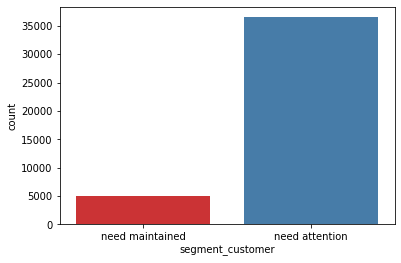

In [196]:
ax = sns.countplot(x="segment_customer", data=km_seg, palette="Set1")

In [197]:
display(data1.groupby('kmeans_clustering').mean().reset_index())

,kmeans_clustering,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country
0,0,-0.025171,-0.236048,-0.028308,-0.268773,-0.264383,-0.242016,-0.259923,-0.265547,0.103093,0.147817,-0.087769,-0.250570,-0.083748,-0.071291,-0.085846,-0.273165,0.086899,-0.001971
1,1,0.182949,1.715660,0.205752,1.953516,1.921610,1.759040,1.889190,1.930066,-0.749312,-1.074372,0.637926,1.821211,0.608704,0.518159,0.623952,1.985435,-0.631608,0.014326


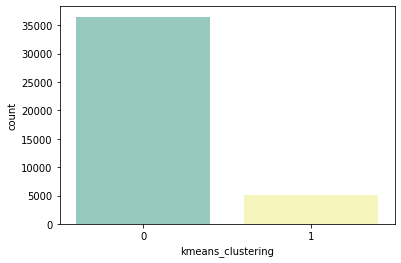

In [198]:
ax = sns.countplot(x="kmeans_clustering", data=data1, palette="Set3")

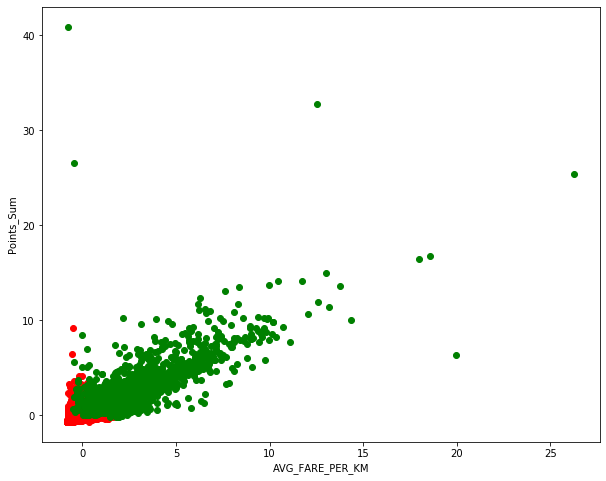

In [199]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data1["AVG_FARE_PER_KM"][data1["kmeans_clustering"] == 0], data1["Points_Sum"][data1["kmeans_clustering"] == 0], color = "red")
plt.scatter(data1["AVG_FARE_PER_KM"][data1["kmeans_clustering"] == 1], data1["Points_Sum"][data1["kmeans_clustering"] == 1], color = "green")
plt.xlabel('AVG_FARE_PER_KM')
plt.ylabel('Points_Sum')
plt.show()

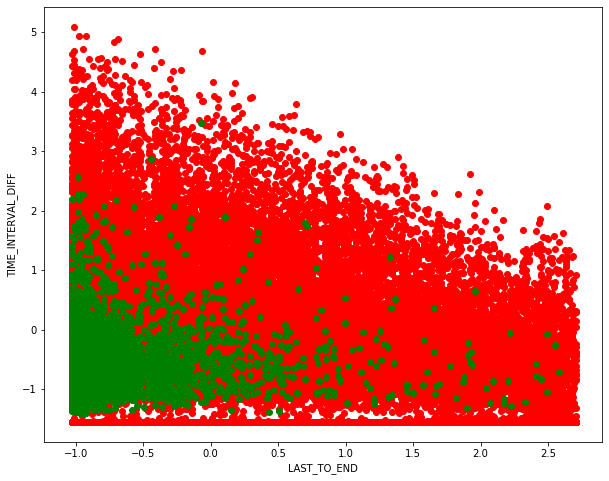

In [200]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data1["LAST_TO_END"][data1["kmeans_clustering"] == 0], data1["TIME_INTERVAL_DIFF"][data1["kmeans_clustering"] == 0], color = "red")
plt.scatter(data1["LAST_TO_END"][data1["kmeans_clustering"] == 1], data1["TIME_INTERVAL_DIFF"][data1["kmeans_clustering"] == 1], color = "green")
plt.xlabel('LAST_TO_END')
plt.ylabel('TIME_INTERVAL_DIFF')
plt.show()

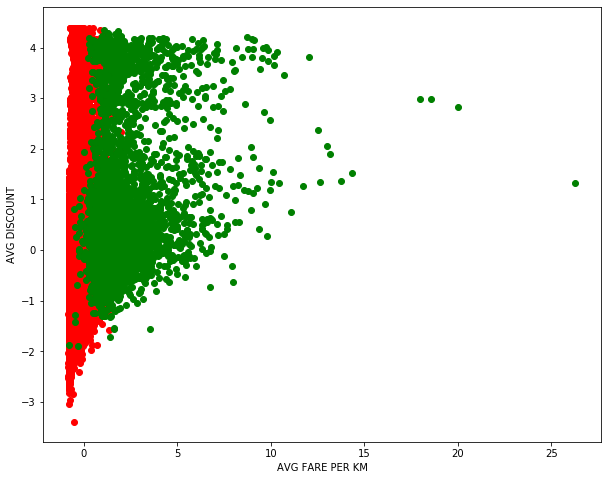

In [201]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data1["AVG_FARE_PER_KM"][data1["kmeans_clustering"] == 0], data1["avg_discount"][data1["kmeans_clustering"] == 0], color = "red")
plt.scatter(data1["AVG_FARE_PER_KM"][data1["kmeans_clustering"] == 1], data1["avg_discount"][data1["kmeans_clustering"] == 1], color = "green")
plt.xlabel('AVG FARE PER KM')
plt.ylabel('AVG DISCOUNT')
plt.show()

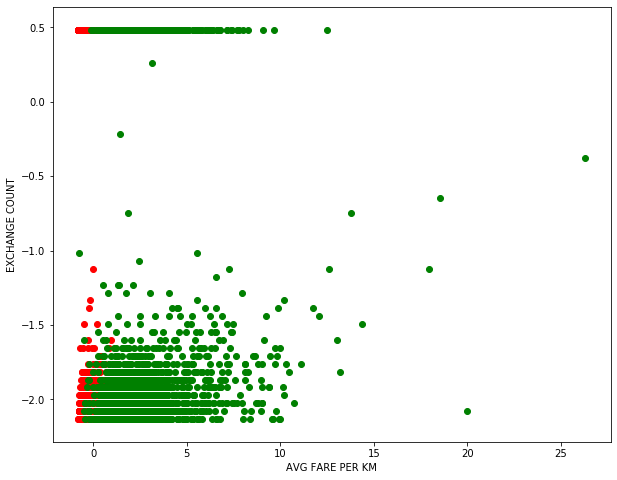

In [202]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data1["AVG_FARE_PER_KM"][data1["kmeans_clustering"] == 0], data1["EXCHANGE_COUNT"][data1["kmeans_clustering"] == 0], color = "red")
plt.scatter(data1["AVG_FARE_PER_KM"][data1["kmeans_clustering"] == 1], data1["EXCHANGE_COUNT"][data1["kmeans_clustering"] == 1], color = "green")
plt.xlabel('AVG FARE PER KM')
plt.ylabel('EXCHANGE COUNT')
plt.show()

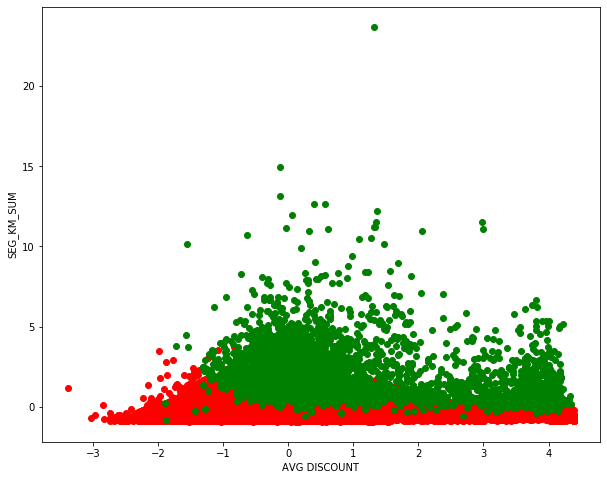

In [203]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data1["avg_discount"][data1["kmeans_clustering"] == 0], data1["SEG_KM_SUM"][data1["kmeans_clustering"] == 0], color = "red")
plt.scatter(data1["avg_discount"][data1["kmeans_clustering"] == 1], data1["SEG_KM_SUM"][data1["kmeans_clustering"] == 1], color = "green")
plt.xlabel('AVG DISCOUNT')
plt.ylabel('SEG_KM_SUM')
plt.show()

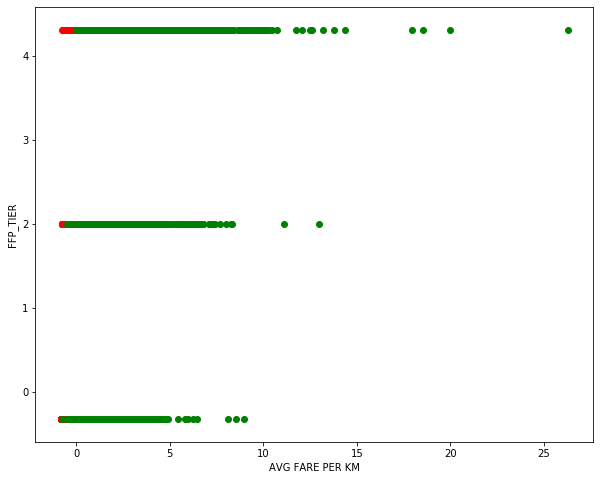

In [204]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data1["AVG_FARE_PER_KM"][data1["kmeans_clustering"] == 0], data1["FFP_TIER"][data1["kmeans_clustering"] == 0], color = "red")
plt.scatter(data1["AVG_FARE_PER_KM"][data1["kmeans_clustering"] == 1], data1["FFP_TIER"][data1["kmeans_clustering"] == 1], color = "green")
plt.xlabel('AVG FARE PER KM')
plt.ylabel('FFP_TIER')
plt.show()

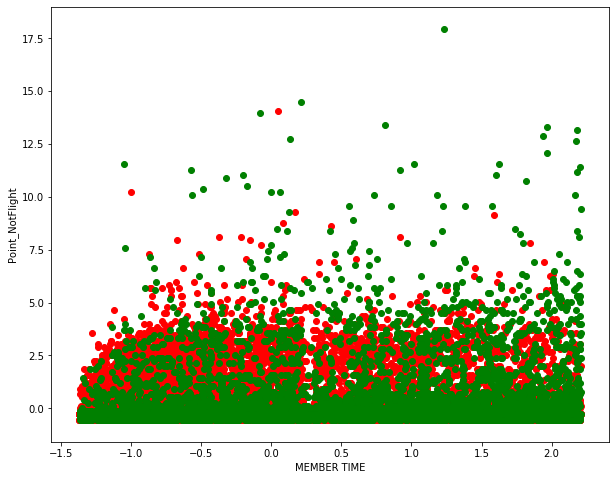

In [213]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data1["MEMBER_TIME"][data1["kmeans_clustering"] == 0], data1["Point_NotFlight"][data1["kmeans_clustering"] == 0], color = "red")
plt.scatter(data1["MEMBER_TIME"][data1["kmeans_clustering"] == 1], data1["Point_NotFlight"][data1["kmeans_clustering"] == 1], color = "green")
plt.xlabel('MEMBER TIME')
plt.ylabel('Point_NotFlight')
plt.show()

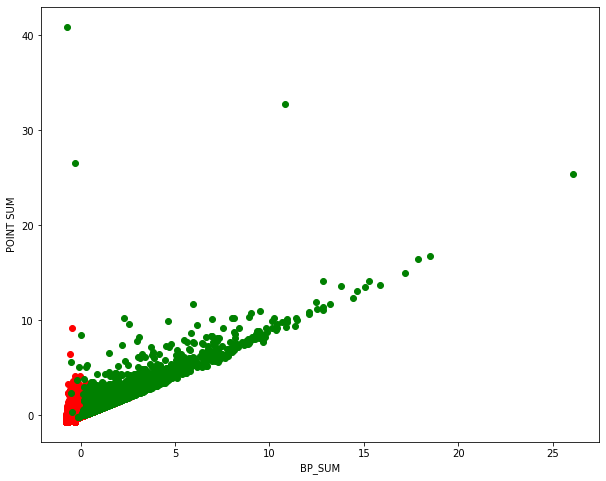

In [214]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data1["BP_SUM"][data1["kmeans_clustering"] == 0], data1["Points_Sum"][data1["kmeans_clustering"] == 0], color = "red")
plt.scatter(data1["BP_SUM"][data1["kmeans_clustering"] == 1], data1["Points_Sum"][data1["kmeans_clustering"] == 1], color = "green")
plt.xlabel('BP_SUM')
plt.ylabel('POINT SUM')
plt.show()

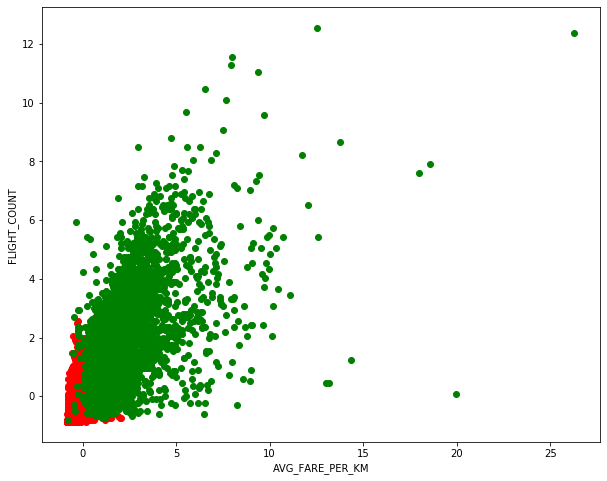

In [215]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data1["AVG_FARE_PER_KM"][data1["kmeans_clustering"] == 0], data1["FLIGHT_COUNT"][data1["kmeans_clustering"] == 0], color = "red")
plt.scatter(data1["AVG_FARE_PER_KM"][data1["kmeans_clustering"] == 1], data1["FLIGHT_COUNT"][data1["kmeans_clustering"] == 1], color = "green")
plt.xlabel('AVG_FARE_PER_KM')
plt.ylabel('FLIGHT_COUNT')
plt.show()

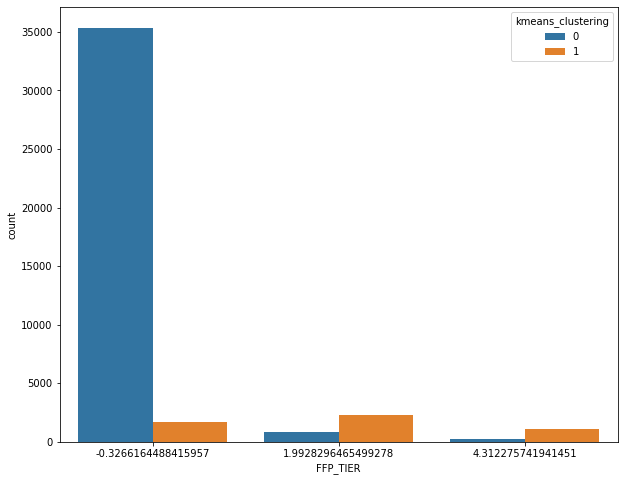

In [216]:
import seaborn as sns
plt.figure(figsize=(10,8))

sns.countplot(data= data1, x=data1.FFP_TIER, hue=data1.kmeans_clustering)
#0 = 4 , 1= 5, 2= 6 

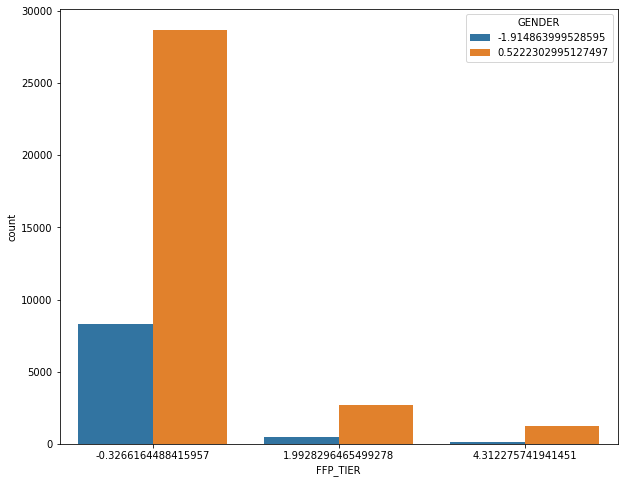

In [217]:
import seaborn as sns
plt.figure(figsize=(10,8))

sns.countplot(data1.FFP_TIER, hue=data1.GENDER)
# 0 = male , 1 = female

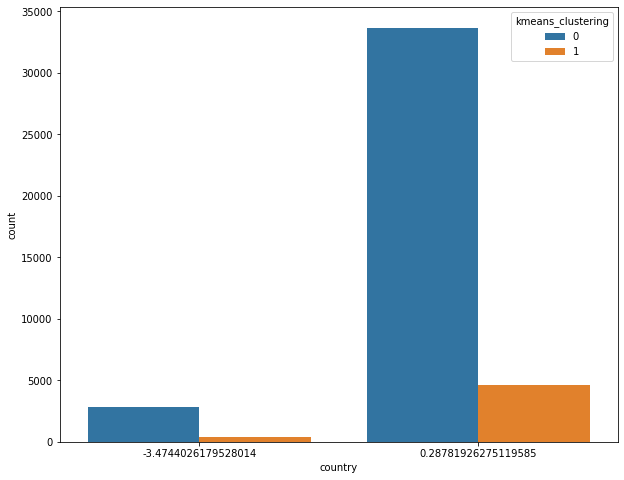

In [218]:
import seaborn as sns
plt.figure(figsize=(10,8))

sns.countplot(data1.country, hue=data1.kmeans_clustering)
# 0 = china , 1= other

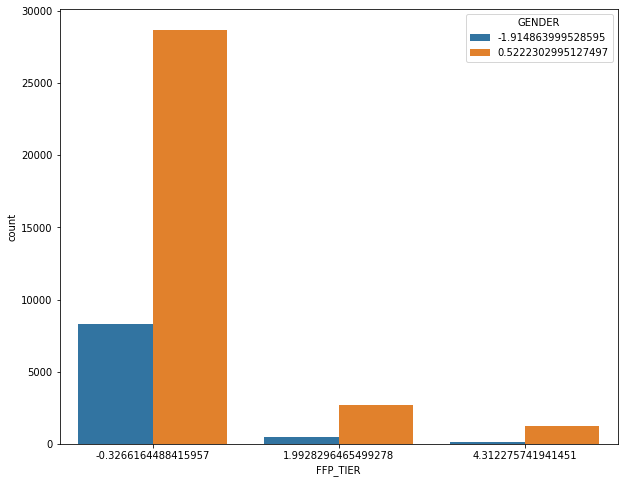

In [219]:
import seaborn as sns
plt.figure(figsize=(10,8))

sns.countplot(flight.FFP_TIER, hue=flight.GENDER)


In [220]:
display(data1.groupby('kmeans_clustering').mean().reset_index())

,kmeans_clustering,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country
0,0,-0.025171,-0.236048,-0.028308,-0.268773,-0.264383,-0.242016,-0.259923,-0.265547,0.103093,0.147817,-0.087769,-0.250570,-0.083748,-0.071291,-0.085846,-0.273165,0.086899,-0.001971
1,1,0.182949,1.715660,0.205752,1.953516,1.921610,1.759040,1.889190,1.930066,-0.749312,-1.074372,0.637926,1.821211,0.608704,0.518159,0.623952,1.985435,-0.631608,0.014326


PCA - KMEANS

In [221]:
kmeans1_X = data1.drop(columns={'kmeans_clustering'})
kmeans1_y = data1['kmeans_clustering']

In [222]:
#kmeans_label = kmeans.labels_

In [223]:
pca_kmeans1 = PCA(n_components=2)

In [224]:
pca_kmeans1 = pca_kmeans1.fit(kmeans1_X)

In [225]:
pcs_kmeans1 = pca_kmeans1.transform(kmeans1_X)
pcs_kmeans1

array([[ 57.92217176, -12.00803811],
       [ 39.32453678,  -7.11572737],
       [ 38.11793243,  -6.85584383],
       ...,
       [ -2.89929573,  -1.98115406],
       [ -1.92427624,  -0.91623502],
       [ -2.1608307 ,  -1.96319395]])

In [226]:
pdf_kmeans1 = pd.DataFrame(pcs_kmeans1,columns={'component1','component2'})
pdf_kmeans1.head()

,component1,component2
0,57.922172,-12.008038
1,39.324537,-7.115727
2,38.117932,-6.855844
3,29.207965,-5.067384
4,32.123263,-6.200681


In [227]:
pdf_kmeans1['clustering_kmeans'] = y_kmeans 
pdf_kmeans1.head()

,component1,component2,clustering_kmeans
0,57.922172,-12.008038,1
1,39.324537,-7.115727,1
2,38.117932,-6.855844,1
3,29.207965,-5.067384,1
4,32.123263,-6.200681,1


In [228]:
pdf_kmeans1['clustering_kmeans'].value_counts()

0    36494
1     5021
Name: clustering_kmeans, dtype: int64

Text(0.5, 1.0, '2 component PCA KMeans All Feature')

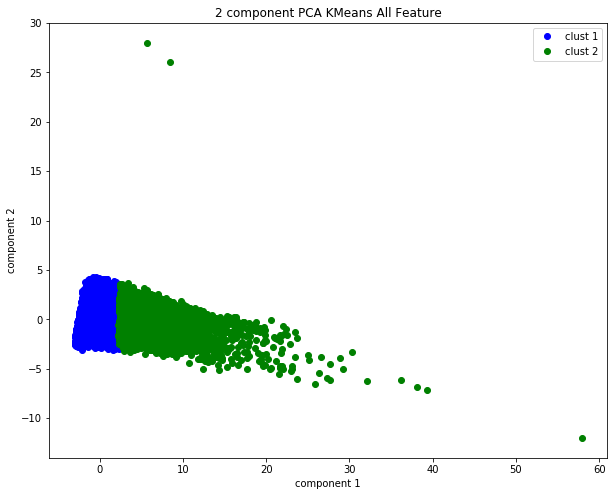

In [229]:
# Plotting the results of PCA
fig,ax = plt.subplots(figsize=(10,8))
plt.plot(pcs_kmeans1[y_kmeans == 0, 0], pcs_kmeans1[y_kmeans == 0, 1], 'bo', label='clust 1')
plt.plot(pcs_kmeans1[y_kmeans == 1, 0], pcs_kmeans1[y_kmeans == 1, 1], 'go', label='clust 2')
plt.legend(loc=0);
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("2 component PCA KMeans All Feature")

In [230]:
print('Explained variance:', pca_kmeans1.explained_variance_)
print('Explained variance ratio:', pca_kmeans1.explained_variance_ratio_ * 100)

Explained variance: [7.23263245 1.95980705]
Explained variance ratio: [40.18032353 10.88755468]


Text(0.5, 1.0, 'Explained variance Ratio 2 component PCA')

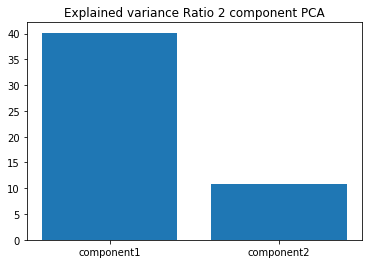

In [231]:
plt.bar(['component1', 'component2'], pca_kmeans1.explained_variance_ratio_ * 100)
plt.title("Explained variance Ratio 2 component PCA")

Text(0.5, 1, '2 component PCA KMEANS All Feature ')

<Figure size 1296x1080 with 0 Axes>

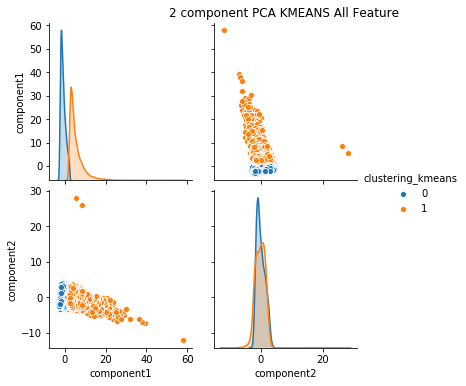

In [232]:
import seaborn as sns
plt.figure(figsize=(18,15))
sns.pairplot(data=pdf_kmeans1, hue='clustering_kmeans')
plt.title("2 component PCA KMEANS All Feature ")

### GMM (GAUSSIAN MIXTURE MODEL)

In [215]:
data2 = flight
data2.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country,kmeans_clustering
0,0.52223,4.312276,-1.223637,12.364444,26.089580,25.333168,23.081307,23.664960,-1.025021,-0.379195,1.320337,25.417191,5.973154,1.358435,0.695182,26.274944,-1.374454,0.287819,1
1,0.52223,4.312276,-0.091851,7.909567,18.496592,17.914785,16.282231,11.495928,-0.963710,-0.644871,2.977895,16.820566,3.712656,1.231409,1.262802,18.558264,-1.407323,0.287819,1
2,0.52223,4.312276,-0.297630,7.591362,17.894748,17.057732,16.032489,11.073419,-0.922836,-1.123089,2.991359,16.424137,2.781862,1.252386,1.227819,17.967798,-1.396463,0.287819,1
3,0.52223,1.992830,2.171721,0.463558,17.158723,11.906917,12.011140,10.972689,-0.044049,-1.601306,2.057266,14.984694,0.920275,0.590448,0.726779,13.002886,-1.003210,-3.474403,1
4,0.52223,4.312276,0.525487,8.673260,13.784546,12.801564,12.540978,12.184848,-0.984147,-0.751142,1.371766,13.577531,4.510479,0.321245,0.564280,13.770468,-1.038667,0.287819,1


In [216]:
gmm1 = GaussianMixture(n_components=2).fit(data2)

In [217]:
gmm1_label = gmm1.predict(data2)
gmm1_label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [218]:
data2['gmm_clust'] = gmm1_label

In [219]:
data2.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country,kmeans_clustering,gmm_clust
0,0.52223,4.312276,-1.223637,12.364444,26.089580,25.333168,23.081307,23.664960,-1.025021,-0.379195,1.320337,25.417191,5.973154,1.358435,0.695182,26.274944,-1.374454,0.287819,1,1
1,0.52223,4.312276,-0.091851,7.909567,18.496592,17.914785,16.282231,11.495928,-0.963710,-0.644871,2.977895,16.820566,3.712656,1.231409,1.262802,18.558264,-1.407323,0.287819,1,1
2,0.52223,4.312276,-0.297630,7.591362,17.894748,17.057732,16.032489,11.073419,-0.922836,-1.123089,2.991359,16.424137,2.781862,1.252386,1.227819,17.967798,-1.396463,0.287819,1,1
3,0.52223,1.992830,2.171721,0.463558,17.158723,11.906917,12.011140,10.972689,-0.044049,-1.601306,2.057266,14.984694,0.920275,0.590448,0.726779,13.002886,-1.003210,-3.474403,1,1
4,0.52223,4.312276,0.525487,8.673260,13.784546,12.801564,12.540978,12.184848,-0.984147,-0.751142,1.371766,13.577531,4.510479,0.321245,0.564280,13.770468,-1.038667,0.287819,1,1


In [220]:
quartiles = data2.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

       GENDER  FFP_TIER       AGE  FLIGHT_COUNT    BP_SUM  SUM_YR_1  SUM_YR_2  \
0.25  0.52223 -0.326616 -0.709189     -0.618340 -0.543506 -0.568131 -0.577039   
0.50  0.52223 -0.326616 -0.091851     -0.300135 -0.303294 -0.316736 -0.326176   
0.75  0.52223 -0.326616  0.525487      0.272635  0.156794  0.186925  0.177282   

      SEG_KM_SUM  LAST_TO_END  EXCHANGE_COUNT  avg_discount  Points_Sum  \
0.25   -0.615955    -0.830870        0.484253     -0.585482   -0.502184   
0.50   -0.311516    -0.330166        0.484253     -0.083088   -0.293624   
0.75    0.246848     0.589495        0.484253      0.428079    0.118820   

      Point_NotFlight  MEMBER_TIME  FLIGHT_TIME  AVG_FARE_PER_KM  \
0.25        -0.276459    -0.891919    -0.819222        -0.566659   
0.50        -0.276459    -0.215997    -0.242575        -0.310779   
0.75        -0.276459     0.820028     0.729036         0.179957   

      TIME_INTERVAL_DIFF   country  kmeans_clustering  gmm_clust  
0.25           -0.695692  0.287819

In [221]:
quartiles=quartiles.to_dict()
quartiles

{'GENDER': {0.25: 0.5222302995127497,
  0.5: 0.5222302995127497,
  0.75: 0.5222302995127497},
 'FFP_TIER': {0.25: -0.3266164488415951,
  0.5: -0.3266164488415951,
  0.75: -0.3266164488415951},
 'AGE': {0.25: -0.7091886170448878,
  0.5: -0.09185094350989749,
  0.75: 0.5254867300250928},
 'FLIGHT_COUNT': {0.25: -0.6183404087730793,
  0.5: -0.3001349001949982,
  0.75: 0.27263501524554756},
 'BP_SUM': {0.25: -0.5435057476952301,
  0.5: -0.3032943271856229,
  0.75: 0.15679413996064145},
 'SUM_YR_1': {0.25: -0.5681313588297485,
  0.5: -0.3167364948894485,
  0.75: 0.1869249967152617},
 'SUM_YR_2': {0.25: -0.5770388566604674,
  0.5: -0.32617565276259247,
  0.75: 0.17728225095937084},
 'SEG_KM_SUM': {0.25: -0.6159550977588232,
  0.5: -0.3115162649368997,
  0.75: 0.24684770215419388},
 'LAST_TO_END': {0.25: -0.8308699381502299,
  0.5: -0.33016585669279136,
  0.75: 0.5894947010861774},
 'EXCHANGE_COUNT': {0.25: 0.48425316328137824,
  0.5: 0.48425316328137824,
  0.75: 0.48425316328137824},
 'avg_d

In [222]:
gmm_seg = data2.copy()

In [223]:
gmm_seg.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country,kmeans_clustering,gmm_clust
0,0.52223,4.312276,-1.223637,12.364444,26.089580,25.333168,23.081307,23.664960,-1.025021,-0.379195,1.320337,25.417191,5.973154,1.358435,0.695182,26.274944,-1.374454,0.287819,1,1
1,0.52223,4.312276,-0.091851,7.909567,18.496592,17.914785,16.282231,11.495928,-0.963710,-0.644871,2.977895,16.820566,3.712656,1.231409,1.262802,18.558264,-1.407323,0.287819,1,1
2,0.52223,4.312276,-0.297630,7.591362,17.894748,17.057732,16.032489,11.073419,-0.922836,-1.123089,2.991359,16.424137,2.781862,1.252386,1.227819,17.967798,-1.396463,0.287819,1,1
3,0.52223,1.992830,2.171721,0.463558,17.158723,11.906917,12.011140,10.972689,-0.044049,-1.601306,2.057266,14.984694,0.920275,0.590448,0.726779,13.002886,-1.003210,-3.474403,1,1
4,0.52223,4.312276,0.525487,8.673260,13.784546,12.801564,12.540978,12.184848,-0.984147,-0.751142,1.371766,13.577531,4.510479,0.321245,0.564280,13.770468,-1.038667,0.287819,1,1


In [224]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
## for Length

def LClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4    
    
## for Coeficient

def CClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [237]:
gmm_seg['MT_Quartile'] = gmm_seg['MEMBER_TIME'].apply(LClass, args=('MEMBER_TIME',quartiles,))
gmm_seg['LTE_Quartile'] = gmm_seg['LAST_TO_END'].apply(RClass, args=('LAST_TO_END',quartiles,))
gmm_seg['FC_Quartile'] = gmm_seg['FLIGHT_COUNT'].apply(FMClass, args=('FLIGHT_COUNT',quartiles,))
gmm_seg['SKS_Quartile'] = gmm_seg['SEG_KM_SUM'].apply(FMClass, args=('SEG_KM_SUM',quartiles,))
gmm_seg['AD_Quartile'] = gmm_seg['avg_discount'].apply(CClass, args=('avg_discount',quartiles,))
gmm_seg['FT_Quartile'] = gmm_seg['FLIGHT_TIME'].apply(LClass, args=('FLIGHT_TIME',quartiles,))
gmm_seg['EC_Quartile'] = gmm_seg['EXCHANGE_COUNT'].apply(LClass, args=('EXCHANGE_COUNT',quartiles,))
gmm_seg['PS_Quartile'] = gmm_seg['Points_Sum'].apply(FMClass, args=('Points_Sum',quartiles,))
gmm_seg['PN_Quartile'] = gmm_seg['Point_NotFlight'].apply(RClass, args=('Point_NotFlight',quartiles,))
gmm_seg['AVG_Quartile'] = gmm_seg['AVG_FARE_PER_KM'].apply(FMClass, args=('AVG_FARE_PER_KM',quartiles,))
gmm_seg['DIFF_Quartile'] = gmm_seg['TIME_INTERVAL_DIFF'].apply(CClass, args=('TIME_INTERVAL_DIFF',quartiles,))

In [238]:
gmm_seg['Class'] = gmm_seg.MT_Quartile.map(str) \
                            + gmm_seg.LTE_Quartile.map(str) \
                            + gmm_seg.FC_Quartile.map(str) \
                            + gmm_seg.SKS_Quartile.map(str) \
                            + gmm_seg.AD_Quartile.map(str) \
                            + gmm_seg.FT_Quartile.map(str) \
                            + gmm_seg.EC_Quartile.map(str) \
                            + gmm_seg.PS_Quartile.map(str) \
                            + gmm_seg.PN_Quartile.map(str) \
                            + gmm_seg.AVG_Quartile.map(str) \
                            + gmm_seg.DIFF_Quartile.map(str)

In [239]:
gmm_seg.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,...,DIFF_Quartile,Class,Total Score,segment_customer,MT_Quartile,LTE_Quartile,FM_Quartile,SKS_Quartile,AD_Quartile,FC_Quartile
0,0.52223,4.312276,-1.223637,12.364444,26.089580,25.333168,23.081307,23.664960,-1.025021,-0.379195,...,1,44444314141,34,need maintained,4,4,4,4,4,4
1,0.52223,4.312276,-0.091851,7.909567,18.496592,17.914785,16.282231,11.495928,-0.963710,-0.644871,...,1,44444414141,35,need maintained,4,4,4,4,4,4
2,0.52223,4.312276,-0.297630,7.591362,17.894748,17.057732,16.032489,11.073419,-0.922836,-1.123089,...,1,44444414141,35,need maintained,4,4,4,4,4,4
3,0.52223,1.992830,2.171721,0.463558,17.158723,11.906917,12.011140,10.972689,-0.044049,-1.601306,...,1,32444314141,31,need maintained,3,2,4,4,4,4
4,0.52223,4.312276,0.525487,8.673260,13.784546,12.801564,12.540978,12.184848,-0.984147,-0.751142,...,1,34444314141,33,need maintained,3,4,4,4,4,4


In [240]:
gmm_seg['Total Score'] = gmm_seg['MT_Quartile'] + gmm_seg['LTE_Quartile'] + gmm_seg['FC_Quartile'] + gmm_seg['SKS_Quartile'] +gmm_seg['AD_Quartile']+ gmm_seg['FT_Quartile'] + gmm_seg['EC_Quartile'] + gmm_seg['PS_Quartile'] +gmm_seg['PN_Quartile']+ gmm_seg['AVG_Quartile'] +gmm_seg['DIFF_Quartile']
gmm_seg.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,...,DIFF_Quartile,Class,Total Score,segment_customer,MT_Quartile,LTE_Quartile,FM_Quartile,SKS_Quartile,AD_Quartile,FC_Quartile
0,0.52223,4.312276,-1.223637,12.364444,26.089580,25.333168,23.081307,23.664960,-1.025021,-0.379195,...,1,44444314141,34,need maintained,4,4,4,4,4,4
1,0.52223,4.312276,-0.091851,7.909567,18.496592,17.914785,16.282231,11.495928,-0.963710,-0.644871,...,1,44444414141,35,need maintained,4,4,4,4,4,4
2,0.52223,4.312276,-0.297630,7.591362,17.894748,17.057732,16.032489,11.073419,-0.922836,-1.123089,...,1,44444414141,35,need maintained,4,4,4,4,4,4
3,0.52223,1.992830,2.171721,0.463558,17.158723,11.906917,12.011140,10.972689,-0.044049,-1.601306,...,1,32444314141,31,need maintained,3,2,4,4,4,4
4,0.52223,4.312276,0.525487,8.673260,13.784546,12.801564,12.540978,12.184848,-0.984147,-0.751142,...,1,34444314141,33,need maintained,3,4,4,4,4,4


In [241]:
gmm_seg.sort_values(by=['Class', 'Total Score'], ascending=[False,False]).head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,...,DIFF_Quartile,Class,Total Score,segment_customer,MT_Quartile,LTE_Quartile,FM_Quartile,SKS_Quartile,AD_Quartile,FC_Quartile
1572,-1.914864,1.992830,1.451493,1.990945,2.171040,1.900268,0.340654,1.842746,-0.871744,-2.132659,...,4,44444414444,41,need maintained,4,4,4,4,4,4
3564,0.522230,1.992830,0.525487,0.590841,1.266918,-0.043548,2.347254,0.651318,-1.004584,0.484253,...,4,44444414444,41,need maintained,4,4,4,4,4,4
3876,0.522230,-0.326616,-0.297630,0.909046,1.184996,2.945185,-0.348787,0.720294,-1.014802,0.484253,...,4,44444414444,41,need attention,4,4,4,4,4,4
5176,0.522230,-0.326616,0.216818,0.399917,0.907172,0.150093,1.446469,0.622574,-0.912618,0.484253,...,4,44444414444,41,need attention,4,4,4,4,4,4
5229,0.522230,-0.326616,-0.400520,0.590841,0.771504,1.310302,0.257950,0.680316,-0.922836,0.484253,...,4,44444414444,41,need attention,4,4,4,4,4,4


In [244]:
GM2 = gmm_seg[['MT_Quartile','LTE_Quartile','FC_Quartile','SKS_Quartile','AD_Quartile','PS_Quartile','Total Score','gmm_clust']]
GM2.head()

,MT_Quartile,LTE_Quartile,FC_Quartile,SKS_Quartile,AD_Quartile,PS_Quartile,Total Score,gmm_clust
0,4,4,4,4,4,4,34,1
1,4,4,4,4,4,4,35,1
2,4,4,4,4,4,4,35,1
3,3,2,4,4,4,4,31,1
4,3,4,4,4,4,4,33,1


In [ ]:
# ini yg di analisis dari untuk karakteristik gmm  all feture 

In [245]:
GM2.groupby('gmm_clust').mean().reset_index()

,gmm_clust,MT_Quartile,LTE_Quartile,FC_Quartile,SKS_Quartile,AD_Quartile,PS_Quartile,Total Score
0,0,2.425933,2.372226,2.202581,2.297857,2.420590,2.294021,25.945635
1,1,3.034654,3.513244,3.913961,3.967736,3.077076,3.996614,33.686915


In [231]:
gmm_seg.groupby('gmm_clust').mean().reset_index()

,gmm_clust,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,...,F_Quartile,M_Quartile,C_Quartile,FT_Quartile,EC_Quartile,PS_Quartile,PN_Quartile,AVG_Quartile,DIFF_Quartile,Total Score
0,0,-0.025171,-0.236048,-0.028308,-0.268773,-0.264383,-0.242016,-0.259923,-0.265547,0.103093,...,2.202581,2.297857,2.420590,2.409711,1.0,2.294021,3.609443,2.294843,2.618430,25.945635
1,1,0.182949,1.715660,0.205752,1.953516,1.921610,1.759040,1.889190,1.930066,-0.749312,...,3.913961,3.967736,3.077076,3.152958,1.0,3.996614,2.402310,3.991038,1.637323,33.686915


In [232]:
def segment_customer(x):
    if x['gmm_clust'] == 1 :
        segment = 'need maintained'
    else:
        segment = 'need attention'
    return segment
        
gmm_seg['segment_customer']=gmm_seg.apply(lambda x: segment_customer(x),axis=1)


In [253]:
gm = gmm_seg[['FFP_TIER','FLIGHT_COUNT','AVG_FARE_PER_KM','TIME_INTERVAL_DIFF','Points_Sum','Point_NotFlight','FLIGHT_TIME','Total Score','gmm_clust','segment_customer']]
gm.head()

,FFP_TIER,FLIGHT_COUNT,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,Points_Sum,Point_NotFlight,FLIGHT_TIME,Total Score,gmm_clust,segment_customer
0,4.312276,12.364444,26.274944,-1.374454,25.417191,5.973154,0.695182,34,1,need maintained
1,4.312276,7.909567,18.558264,-1.407323,16.820566,3.712656,1.262802,35,1,need maintained
2,4.312276,7.591362,17.967798,-1.396463,16.424137,2.781862,1.227819,35,1,need maintained
3,1.992830,0.463558,13.002886,-1.003210,14.984694,0.920275,0.726779,31,1,need maintained
4,4.312276,8.673260,13.770468,-1.038667,13.577531,4.510479,0.564280,33,1,need maintained


In [254]:
gm.groupby('gmm_clust').mean().reset_index()

,gmm_clust,FFP_TIER,FLIGHT_COUNT,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,Points_Sum,Point_NotFlight,FLIGHT_TIME,Total Score
0,0,-0.236048,-0.268773,-0.273165,0.086899,-0.250570,-0.083748,-0.085846,25.945635
1,1,1.715660,1.953516,1.985435,-0.631608,1.821211,0.608704,0.623952,33.686915


In [255]:
gmm_seg['segment_customer'].value_counts()

need attention     36494
need maintained     5021
Name: segment_customer, dtype: int64

In [256]:
gmm_seg['segment_customer'].value_counts(normalize=True)

need attention     0.879056
need maintained    0.120944
Name: segment_customer, dtype: float64

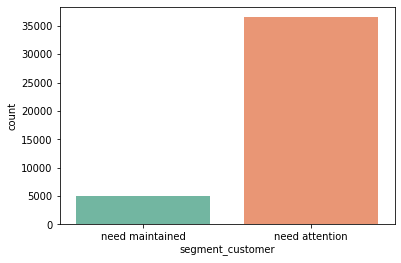

In [257]:
ax = sns.countplot(x="segment_customer", data=gmm_seg, palette="Set2")

In [258]:
display(data2.groupby('gmm_clust').mean().reset_index())

,gmm_clust,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country,kmeans_clustering
0,0,-0.025171,-0.236048,-0.028308,-0.268773,-0.264383,-0.242016,-0.259923,-0.265547,0.103093,0.147817,-0.087769,-0.250570,-0.083748,-0.071291,-0.085846,-0.273165,0.086899,-0.001971,0
1,1,0.182949,1.715660,0.205752,1.953516,1.921610,1.759040,1.889190,1.930066,-0.749312,-1.074372,0.637926,1.821211,0.608704,0.518159,0.623952,1.985435,-0.631608,0.014326,1


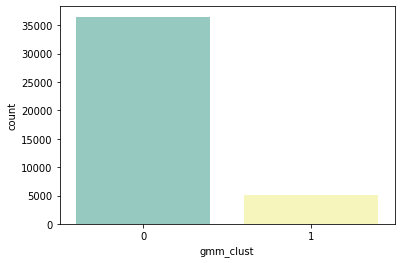

In [259]:
ax = sns.countplot(x="gmm_clust", data=data2, palette="Set3")

In [260]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
from sklearn.metrics import  silhouette_score
silhouette_avg = silhouette_score(data2, gmm1_label)
silhouette_avg

0.43206970801171274

In [261]:
#score davies bouldin
from sklearn.metrics import  silhouette_score
davies_bouldin_score(data2, gmm1_label)

1.2402098882110344

In [262]:
data2.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME,FLIGHT_TIME,AVG_FARE_PER_KM,TIME_INTERVAL_DIFF,country,kmeans_clustering,gmm_clust
0,0.52223,4.312276,-1.223637,12.364444,26.089580,25.333168,23.081307,23.664960,-1.025021,-0.379195,1.320337,25.417191,5.973154,1.358435,0.695182,26.274944,-1.374454,0.287819,1,1
1,0.52223,4.312276,-0.091851,7.909567,18.496592,17.914785,16.282231,11.495928,-0.963710,-0.644871,2.977895,16.820566,3.712656,1.231409,1.262802,18.558264,-1.407323,0.287819,1,1
2,0.52223,4.312276,-0.297630,7.591362,17.894748,17.057732,16.032489,11.073419,-0.922836,-1.123089,2.991359,16.424137,2.781862,1.252386,1.227819,17.967798,-1.396463,0.287819,1,1
3,0.52223,1.992830,2.171721,0.463558,17.158723,11.906917,12.011140,10.972689,-0.044049,-1.601306,2.057266,14.984694,0.920275,0.590448,0.726779,13.002886,-1.003210,-3.474403,1,1
4,0.52223,4.312276,0.525487,8.673260,13.784546,12.801564,12.540978,12.184848,-0.984147,-0.751142,1.371766,13.577531,4.510479,0.321245,0.564280,13.770468,-1.038667,0.287819,1,1


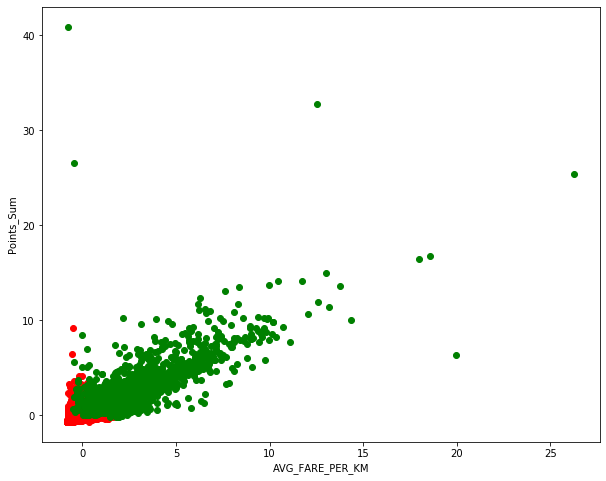

In [263]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data2["AVG_FARE_PER_KM"][data2["gmm_clust"] == 0], data2["Points_Sum"][data2["gmm_clust"] == 0], color = "red")
plt.scatter(data2["AVG_FARE_PER_KM"][data2["gmm_clust"] == 1], data2["Points_Sum"][data2["gmm_clust"] == 1], color = "green")
plt.xlabel('AVG_FARE_PER_KM')
plt.ylabel('Points_Sum')
plt.show()

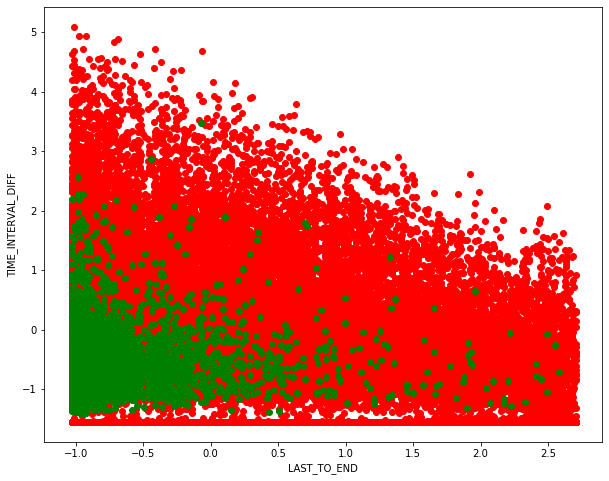

In [264]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data2["LAST_TO_END"][data2["gmm_clust"] == 0], data2["TIME_INTERVAL_DIFF"][data2["gmm_clust"] == 0], color = "red")
plt.scatter(data2["LAST_TO_END"][data2["gmm_clust"] == 1], data2["TIME_INTERVAL_DIFF"][data2["gmm_clust"] == 1], color = "green")
plt.xlabel('LAST_TO_END')
plt.ylabel('TIME_INTERVAL_DIFF')
plt.show()

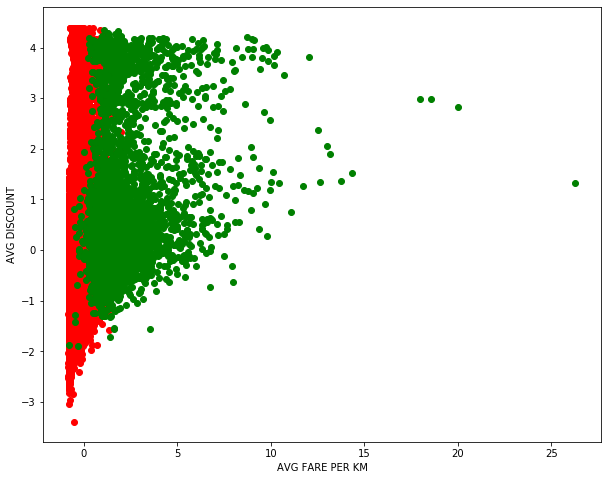

In [265]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data2["AVG_FARE_PER_KM"][data2["gmm_clust"] == 0], data2["avg_discount"][data2["gmm_clust"] == 0], color = "red")
plt.scatter(data2["AVG_FARE_PER_KM"][data2["gmm_clust"] == 1], data2["avg_discount"][data2["gmm_clust"] == 1], color = "green")
plt.xlabel('AVG FARE PER KM')
plt.ylabel('AVG DISCOUNT')
plt.show()

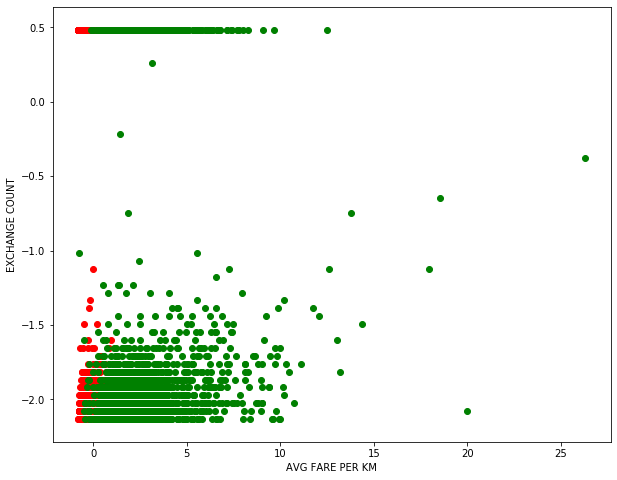

In [266]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data2["AVG_FARE_PER_KM"][data2["gmm_clust"] == 0], data2["EXCHANGE_COUNT"][data1["gmm_clust"] == 0], color = "red")
plt.scatter(data2["AVG_FARE_PER_KM"][data2["gmm_clust"] == 1], data2["EXCHANGE_COUNT"][data1["gmm_clust"] == 1], color = "green")
plt.xlabel('AVG FARE PER KM')
plt.ylabel('EXCHANGE COUNT')
plt.show()

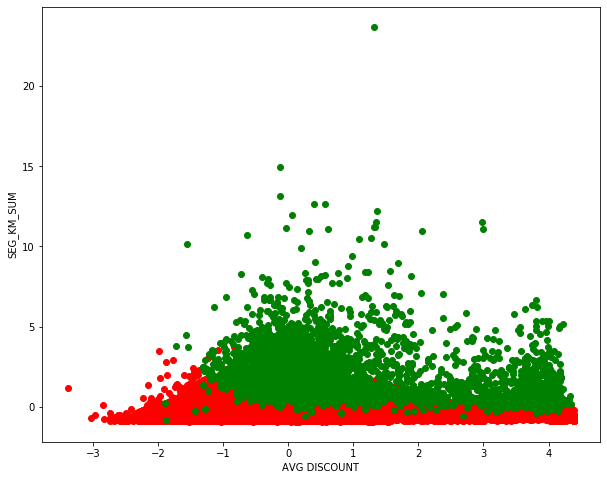

In [267]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data2["avg_discount"][data2["gmm_clust"] == 0], data2["SEG_KM_SUM"][data2["gmm_clust"] == 0], color = "red")
plt.scatter(data2["avg_discount"][data2["gmm_clust"] == 1], data2["SEG_KM_SUM"][data2["gmm_clust"] == 1], color = "green")
plt.xlabel('AVG DISCOUNT')
plt.ylabel('SEG_KM_SUM')
plt.show()

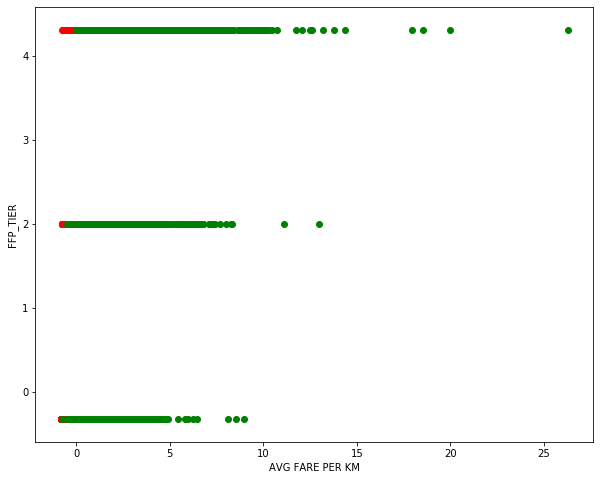

In [268]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data2["AVG_FARE_PER_KM"][data2["gmm_clust"] == 0], data2["FFP_TIER"][data2["gmm_clust"] == 0], color = "red")
plt.scatter(data2["AVG_FARE_PER_KM"][data2["gmm_clust"] == 1], data2["FFP_TIER"][data2["gmm_clust"] == 1], color = "green")
plt.xlabel('AVG FARE PER KM')
plt.ylabel('FFP_TIER')
plt.show()

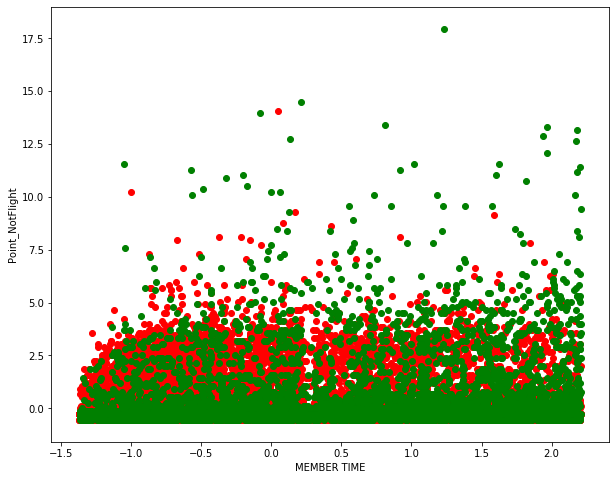

In [269]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data2["MEMBER_TIME"][data2["kmeans_clustering"] == 0], data2["Point_NotFlight"][data2["gmm_clust"] == 0], color = "red")
plt.scatter(data2["MEMBER_TIME"][data2["kmeans_clustering"] == 1], data2["Point_NotFlight"][data2["gmm_clust"] == 1], color = "green")
plt.xlabel('MEMBER TIME')
plt.ylabel('Point_NotFlight')
plt.show()

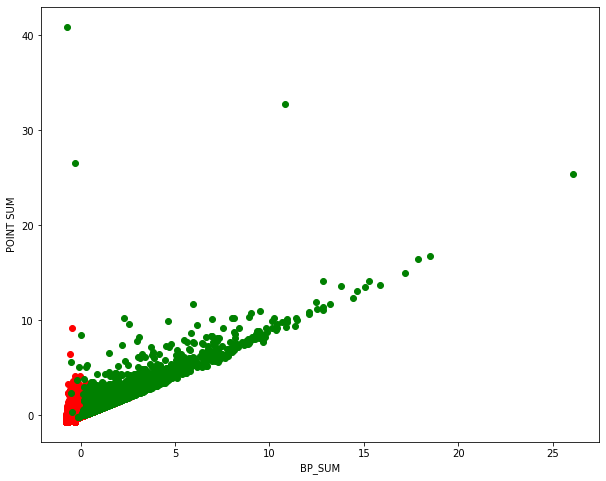

In [270]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data2["BP_SUM"][data2["gmm_clust"] == 0], data2["Points_Sum"][data2["gmm_clust"] == 0], color = "red")
plt.scatter(data2["BP_SUM"][data2["gmm_clust"] == 1], data2["Points_Sum"][data2["gmm_clust"] == 1], color = "green")
plt.xlabel('BP_SUM')
plt.ylabel('POINT SUM')
plt.show()

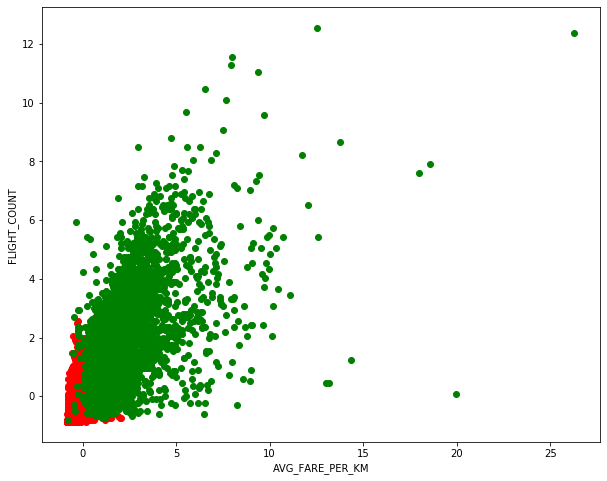

In [271]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (10, 8))
plt.scatter(data2["AVG_FARE_PER_KM"][data2["gmm_clust"] == 0], data2["FLIGHT_COUNT"][data2["gmm_clust"] == 0], color = "red")
plt.scatter(data2["AVG_FARE_PER_KM"][data2["gmm_clust"] == 1], data2["FLIGHT_COUNT"][data2["gmm_clust"] == 1], color = "green")
plt.xlabel('AVG_FARE_PER_KM')
plt.ylabel('FLIGHT_COUNT')
plt.show()

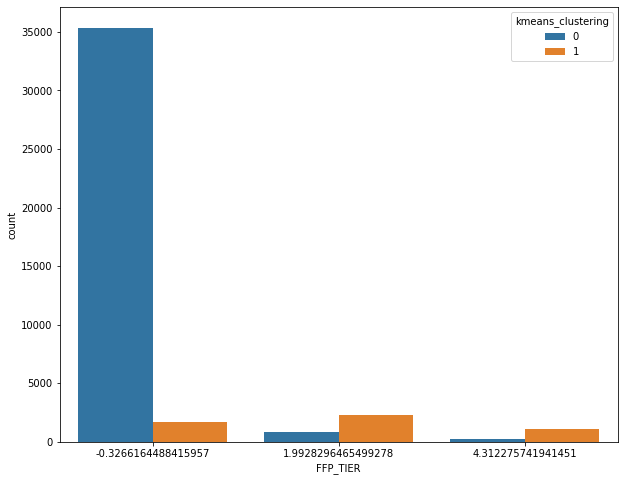

In [272]:
import seaborn as sns
plt.figure(figsize=(10,8))

sns.countplot(data= data2, x=data2.FFP_TIER, hue=data2.kmeans_clustering)
#0 = 4 , 1= 5, 2= 6 

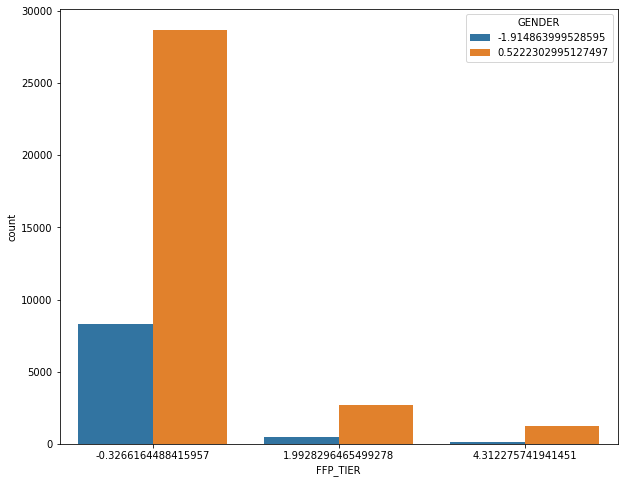

In [273]:
import seaborn as sns
plt.figure(figsize=(10,8))

sns.countplot(data2.FFP_TIER, hue=data2.GENDER)
# 0 = male , 1 = female

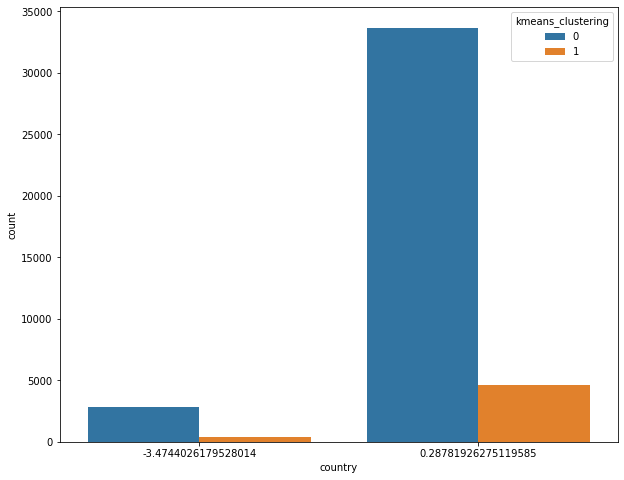

In [274]:
import seaborn as sns
plt.figure(figsize=(10,8))

sns.countplot(data2.country, hue=data2.kmeans_clustering)
# 0 = china , 1= other

**PCA - GMM**

In [309]:
X_gmm1 = data2.drop(columns=['gmm_clust'])
y_gmm1 = data2['gmm_clust']

In [310]:
pca_gmm1 = PCA(n_components=2)

In [311]:
pca_gmm1 = pca_gmm1.fit(X_gmm1)

In [312]:
pcs_gmm1 = pca_gmm1.transform(X_gmm1)
pcs_gmm1

array([[ 57.74235644, -11.92958056],
       [ 39.22900388,  -7.06577587],
       [ 38.02803185,  -6.80782854],
       ...,
       [ -2.89626738,  -1.98443479],
       [ -1.92698661,  -0.91719816],
       [ -2.16192651,  -1.96466024]])

In [313]:
pdf_gmm1 = pd.DataFrame(pcs_gmm1,columns={'component1','component2'})
pdf_gmm1.head()

,component1,component2
0,57.742356,-11.929581
1,39.229004,-7.065776
2,38.028032,-6.807829
3,29.155821,-5.031061
4,32.061820,-6.162413


In [314]:
pdf_gmm1['clustering_gmm'] = gmm1_label
pdf_gmm1.describe()

,component1,component2,clustering_gmm
count,4.151500e+04,4.151500e+04,41515.000000
mean,-6.045882e-16,1.988426e-16,0.120944
std,2.701262e+00,1.400013e+00,0.326066
min,-3.023283e+00,-1.192958e+01,0.000000
25%,-1.621577e+00,-1.087434e+00,0.000000
50%,-8.206062e-01,-2.080483e-01,0.000000
75%,6.142935e-01,1.020693e+00,0.000000
max,5.774236e+01,2.800226e+01,1.000000


In [315]:
pdf_gmm1.head()

,component1,component2,clustering_gmm
0,57.742356,-11.929581,1
1,39.229004,-7.065776,1
2,38.028032,-6.807829,1
3,29.155821,-5.031061,1
4,32.061820,-6.162413,1


In [316]:
pdf_gmm1['clustering_gmm'].value_counts()

0    36494
1     5021
Name: clustering_gmm, dtype: int64

Text(0.5, 1.0, '2 component PCA GMM All Feature')

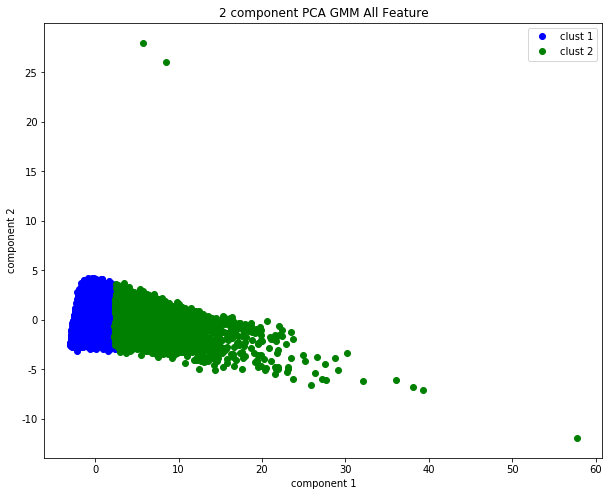

In [317]:
# Plotting the results of PCA
fig,ax = plt.subplots(figsize=(10,8))
plt.plot(pcs_gmm1[gmm1_label == 0, 0], pcs_gmm1[gmm1_label == 0, 1], 'bo', label='clust 1')
plt.plot(pcs_gmm1[gmm1_label== 1, 0], pcs_gmm1[gmm1_label == 1, 1], 'go', label='clust 2')
plt.legend(loc=0);
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("2 component PCA GMM All Feature")

In [318]:
print('Explained variance:', pca_gmm1.explained_variance_)
print('Explained variance ratio:', pca_gmm1.explained_variance_ratio_ * 100)

Explained variance: [7.2968158  1.96003644]
Explained variance ratio: [40.29886444 10.82489198]


Text(0.5, 1.0, '2 component PCA GMM All Feature')

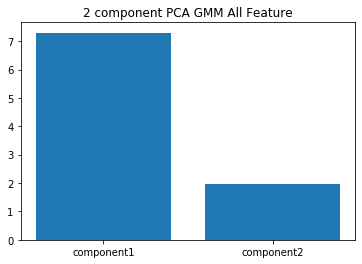

In [319]:
plt.bar(['component1', 'component2'], pca_gmm1 .explained_variance_)
plt.title("2 component PCA GMM All Feature")

Text(0.5, 1, '2 component PCA GMM All Feature')

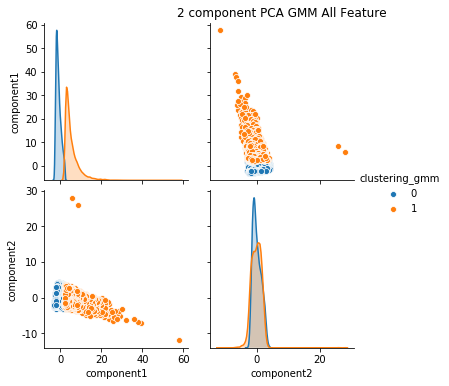

In [320]:
sns.pairplot(data=pdf_gmm1, hue='clustering_gmm')
plt.title("2 component PCA GMM All Feature")

In [ ]:
#jika ingin menggunakan LRFMC

***-------------------BOUNDARY LINE ----------------------------***

**karena memutuskan menggunakan model rfm, maka ada beberapa kolom yang harus di drop**

## LRFMC

In [287]:
df.head(2)

,MEMBER_TIME,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,1.358435,-1.025021,12.364444,23.664960,1.320337
1,1.231409,-0.963710,7.909567,11.495928,2.977895


### KMEANS

In [288]:
# dbscan clustering
from sklearn.cluster import DBSCAN 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics 
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import davies_bouldin_score

**Data Select**

In [289]:
data_kmeans = df
data_kmeans = data_kmeans.rename(columns={'MEMBER_TIME':'Length','LAST_TO_END':'Recency','FLIGHT_COUNT':'Frequency','SEG_KM_SUM':'Monetary','avg_discount':'Coefficient'})
#dbscan_data = dbscan_data.values.astype('float32', copy=False)
data_kmeans.head()

,Length,Recency,Frequency,Monetary,Coefficient
0,1.358435,-1.025021,12.364444,23.664960,1.320337
1,1.231409,-0.963710,7.909567,11.495928,2.977895
2,1.252386,-0.922836,7.591362,11.073419,2.991359
3,0.590448,-0.044049,0.463558,10.972689,2.057266
4,0.321245,-0.984147,8.673260,12.184848,1.371766


In [290]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=123)
kmeans.fit(data_kmeans)

KMeans(n_clusters=2, random_state=123)

In [291]:
y_km = kmeans.fit_predict(data_kmeans)

In [292]:
# Basically, number of clusters = the x-axis value of the point that is the corner of the "elbow"(the plot looks often looks like an elbow)
err = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, random_state=123)
    kmeans.fit(data_kmeans)
    err.append(kmeans.inertia_) # Sum of squared distances of samples to their closest cluster center.

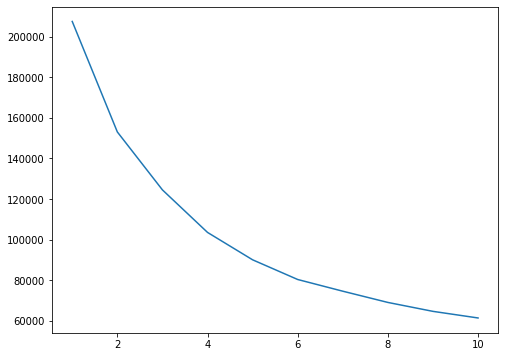

In [293]:
import matplotlib.pyplot as plt
%matplotlib inline 

f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),err)
plt.show()

In [294]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state= 123)
    cluster_labels = clusterer.fit_predict(data_kmeans)
    
    #silhoutte score give avg value for all the samples.
    #this give 0 perspective into density and separation of the formed
    #clusters
    silhoutte_avg = silhouette_score(data_kmeans,cluster_labels)
    print("for n_cluster :", n_clusters,
         "the avg silhoutte score is :", silhoutte_avg)
    
    #compute the silhoutte score for each sample 
    sample_silhoutte_values = silhouette_samples(data_kmeans,cluster_labels)
    

for n_cluster : 2 the avg silhoutte score is : 0.34577582301247156
for n_cluster : 3 the avg silhoutte score is : 0.24624670302003782
for n_cluster : 4 the avg silhoutte score is : 0.25510416312799067
for n_cluster : 5 the avg silhoutte score is : 0.27072401036829313
for n_cluster : 6 the avg silhoutte score is : 0.26732236164475676
for n_cluster : 7 the avg silhoutte score is : 0.25318326151697373
for n_cluster : 8 the avg silhoutte score is : 0.2234336041257984
for n_cluster : 9 the avg silhoutte score is : 0.2261199621535171
for n_cluster : 10 the avg silhoutte score is : 0.22054116865421305


**Compute K-Means**

In [321]:
k= 2
kmeans_model= KMeans(n_clusters=k,random_state=123) 
fit_kmeans = kmeans_model.fit(data_kmeans)

In [322]:
y_km = kmeans_model.fit_predict(data_kmeans)

In [323]:
kmeans_cc = kmeans_model.cluster_centers_  #Clustering center
print(' Pusat cluster adalah：\n', kmeans_cc)

 Pusat cluster adalah：
 [[ 5.22546138e-01 -7.47316022e-01  1.55365785e+00  1.49443328e+00
   3.65164839e-01  2.20934382e-14]
 [-1.22211126e-01  1.74779462e-01 -3.63363657e-01 -3.49512437e-01
  -8.54033799e-02  1.00000000e+00]]


In [324]:
kmeans_labels = kmeans_model.labels_  # Label kategori sampel
print(' Label kategori dari setiap sampel adalah：\n', kmeans_labels)

 Label kategori dari setiap sampel adalah：
 [0 0 0 ... 1 1 1]


In [325]:
r1 = pd.Series(kmeans_model.labels_).value_counts()  
#Statistik pohon dalam berbagai jenis sampel
print(' Angka akhir dari setiap kategori adalah：\n', r1)

 Angka akhir dari setiap kategori adalah：
 1    33646
0     7869
dtype: int64


In [419]:
# # Keluarkan hasil clustering
# cluster_center = pd.DataFrame(kmeans_model.cluster_centers_, columns=['Length', 'Recency', 'Frequency', 'Monetary', 'Coefficient'])  # Tempatkan pusat cluster ke dataframe
# cluster_center

In [420]:
# cluster_center.index = pd.DataFrame(kmeans_model.labels_).drop_duplicates().iloc[:, 0]  #Gunakan kategori sampel sebagai indeks dataframe
# cluster_center

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Bagan radar pengelompokan pelanggan
features = ['Length', 'Recency', 'Frequency', 'Monetary', 'Coefficient']
legend = [' Basis pelanggan ' + str(i + 1) for i in cluster_center.index] # Penamaan grup pelanggan
lstype = ['-','--',(0, (3, 5, 1, 5, 1, 5)),':','-.']
kinds = list(cluster_center.iloc[:, 0])
# Karena grafik radar harus memastikan bahwa data ditutup, tambahkan kolom L dan ubah menjadi np.ndarray
cluster_center = pd.concat([cluster_center, cluster_center[['Length']]], axis=1)
centers = np.array(cluster_center.iloc[:, 0:])
# Bagi keliling dan buat dekat
n = len(features)
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
angle = np.concatenate((angle, [angle[0]]))


In [ ]:
# Menggambar
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, polar=True)

# Gambarlah grafik dalam koordinat kutub

#plt.rcParams['font.sans-serif'] = ['SimHei'] 
# Digunakan untuk menampilkan label berbahasa Mandarin secara normal
plt.rcParams['axes.unicode_minus'] = False          
# Digunakan untuk menampilkan tanda negatif secara normal

#  Buat garis
for i in range(len(kinds)):
    ax.plot(angle, centers[i], linestyle=lstype[i], linewidth=2, label=kinds[i])
    
# Tambahkan tag atribut
ax.set_thetagrids(angle * 180 / np.pi, features)
plt.title('Grafik radar analisis karakteristik pelanggan')
plt.legend(legend)
plt.show()


**NOTE**

  - basis pelanggan ke 2 : semuanya rendah, kecuali recency. menandakan bahwa kemungkinan mereka adalah customer yang low value atau customer biasa yang sudah lama tidak melakukan penerbangan.
  - basis pelanggan ke 1 : Dibagian FM dan L cukup besar, menandakan bahwa cutomer 1 adalah yang banyak melakukan perjalanan menggunakan pesawat maskapai dan sudah bergabung lama. 
     

In [331]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
from sklearn.metrics import  silhouette_score
silhouette_avg = silhouette_score(data_kmeans, y_km)
silhouette_avg

0.3738513166583227

In [332]:
#score with davies bouldin
from sklearn.metrics import  silhouette_score
davies_bouldin_score(data_kmeans, y_km)

1.2105991917108323

In [333]:
data_kmeans.head()

,Length,Recency,Frequency,Monetary,Coefficient,kmeans_clust
0,1.358435,-1.025021,12.364444,23.664960,1.320337,0
1,1.231409,-0.963710,7.909567,11.495928,2.977895,0
2,1.252386,-0.922836,7.591362,11.073419,2.991359,0
3,0.590448,-0.044049,0.463558,10.972689,2.057266,0
4,0.321245,-0.984147,8.673260,12.184848,1.371766,0


In [334]:
data_kmeans['kmeans_clust'] = y_km

In [335]:
data_kmeans.head()

,Length,Recency,Frequency,Monetary,Coefficient,kmeans_clust
0,1.358435,-1.025021,12.364444,23.664960,1.320337,0
1,1.231409,-0.963710,7.909567,11.495928,2.977895,0
2,1.252386,-0.922836,7.591362,11.073419,2.991359,0
3,0.590448,-0.044049,0.463558,10.972689,2.057266,0
4,0.321245,-0.984147,8.673260,12.184848,1.371766,0


In [336]:
quartiles = data_kmeans.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

        Length   Recency  Frequency  Monetary  Coefficient  kmeans_clust
0.25 -0.891919 -0.830870  -0.618340 -0.615955    -0.585482           1.0
0.50 -0.215997 -0.330166  -0.300135 -0.311516    -0.083088           1.0
0.75  0.820028  0.589495   0.272635  0.246848     0.428079           1.0 <class 'pandas.core.frame.DataFrame'>


In [337]:
quartiles=quartiles.to_dict()
quartiles

{'Length': {0.25: -0.8919192589708168,
  0.5: -0.21599706749517764,
  0.75: 0.8200284984045522},
 'Recency': {0.25: -0.83086993815023,
  0.5: -0.33016585669279136,
  0.75: 0.5894947010861775},
 'Frequency': {0.25: -0.6183404087730793,
  0.5: -0.30013490019499817,
  0.75: 0.2726350152455477},
 'Monetary': {0.25: -0.6159550977588232,
  0.5: -0.3115162649368997,
  0.75: 0.24684770215419397},
 'Coefficient': {0.25: -0.5854820789809843,
  0.5: -0.08308761741719695,
  0.75: 0.4280788245311351},
 'kmeans_clust': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0}}

In [338]:
lrfmc_seg_km = data_kmeans.copy()

In [339]:
lrfmc_seg_km.head()

,Length,Recency,Frequency,Monetary,Coefficient,kmeans_clust
0,1.358435,-1.025021,12.364444,23.664960,1.320337,0
1,1.231409,-0.963710,7.909567,11.495928,2.977895,0
2,1.252386,-0.922836,7.591362,11.073419,2.991359,0
3,0.590448,-0.044049,0.463558,10.972689,2.057266,0
4,0.321245,-0.984147,8.673260,12.184848,1.371766,0


In [340]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
## for Length

def LClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4    
    
## for Coeficient

def CClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [341]:
lrfmc_seg_km['L_Quartile'] = lrfmc_seg_km['Length'].apply(LClass, args=('Length',quartiles,))
lrfmc_seg_km['R_Quartile'] = lrfmc_seg_km['Recency'].apply(RClass, args=('Recency',quartiles,))
lrfmc_seg_km['F_Quartile'] = lrfmc_seg_km['Frequency'].apply(FMClass, args=('Frequency',quartiles,))
lrfmc_seg_km['M_Quartile'] = lrfmc_seg_km['Monetary'].apply(FMClass, args=('Monetary',quartiles,))
lrfmc_seg_km['C_Quartile'] = lrfmc_seg_km['Coefficient'].apply(CClass, args=('Coefficient',quartiles,))

In [342]:
lrfmc_seg_km['LRFMCClass'] = lrfmc_seg_km.L_Quartile.map(str) \
                            + lrfmc_seg_km.R_Quartile.map(str) \
                             + lrfmc_seg_km.F_Quartile.map(str) \
                            + lrfmc_seg_km.M_Quartile.map(str) \
                            + lrfmc_seg_km.C_Quartile.map(str)

In [343]:
lrfmc_seg_km.head()

,Length,Recency,Frequency,Monetary,Coefficient,kmeans_clust,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,LRFMCClass
0,1.358435,-1.025021,12.364444,23.664960,1.320337,0,4,4,4,4,4,44444
1,1.231409,-0.963710,7.909567,11.495928,2.977895,0,4,4,4,4,4,44444
2,1.252386,-0.922836,7.591362,11.073419,2.991359,0,4,4,4,4,4,44444
3,0.590448,-0.044049,0.463558,10.972689,2.057266,0,3,2,4,4,4,32444
4,0.321245,-0.984147,8.673260,12.184848,1.371766,0,3,4,4,4,4,34444


In [344]:
lrfmc_seg_km['Total Score'] = lrfmc_seg_km['L_Quartile'] + lrfmc_seg_km['R_Quartile'] + lrfmc_seg_km['F_Quartile'] + lrfmc_seg_km['M_Quartile'] +lrfmc_seg_km['C_Quartile']
lrfmc_seg_km.head()

,Length,Recency,Frequency,Monetary,Coefficient,kmeans_clust,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,LRFMCClass,Total Score
0,1.358435,-1.025021,12.364444,23.664960,1.320337,0,4,4,4,4,4,44444,20
1,1.231409,-0.963710,7.909567,11.495928,2.977895,0,4,4,4,4,4,44444,20
2,1.252386,-0.922836,7.591362,11.073419,2.991359,0,4,4,4,4,4,44444,20
3,0.590448,-0.044049,0.463558,10.972689,2.057266,0,3,2,4,4,4,32444,17
4,0.321245,-0.984147,8.673260,12.184848,1.371766,0,3,4,4,4,4,34444,19


In [345]:
lrfmc_seg_km.sort_values(by=['LRFMCClass', 'Total Score'], ascending=[False,False]).head()

,Length,Recency,Frequency,Monetary,Coefficient,kmeans_clust,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,LRFMCClass,Total Score
0,1.358435,-1.025021,12.364444,23.664960,1.320337,0,4,4,4,4,4,44444,20
1,1.231409,-0.963710,7.909567,11.495928,2.977895,0,4,4,4,4,4,44444,20
2,1.252386,-0.922836,7.591362,11.073419,2.991359,0,4,4,4,4,4,44444,20
6,1.620647,-1.025021,5.427564,11.214595,1.341478,0,4,4,4,4,4,44444,20
11,2.196346,-0.973928,8.227773,10.553062,1.268421,0,4,4,4,4,4,44444,20


In [346]:
# ini yg diananlisis mas mba , untuk karakteristik  kmeans lrfmc

In [347]:
display(lrfmc_seg_km.groupby('kmeans_clust').mean().reset_index())

,kmeans_clust,Length,Recency,Frequency,Monetary,Coefficient,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,Total Score
0,0,0.522546,-0.747316,1.553658,1.494433,0.365165,3.044605,3.478714,3.920829,3.934299,2.840640,17.219088
1,1,-0.122211,0.174779,-0.363364,-0.349512,-0.085403,2.372080,2.283719,2.056114,2.164329,2.420317,11.296558


In [348]:
lrfmc_seg_km['LRFMCClass'].value_counts().head()

44443    574
11111    556
44444    546
44442    471
11114    462
Name: LRFMCClass, dtype: int64

In [349]:
lrfmc_seg_km['kmeans_clust'].value_counts().head()

1    33646
0     7869
Name: kmeans_clust, dtype: int64

In [350]:
def segment_customer(x):
    if x['kmeans_clust']== 1 :
        segment = 'need maintained'
#     elif x['LRFMCClass']== '11111'  :
#         segment = 'important and low value'
#     elif x['LRFMCClass']<= '22222' :
#         segment = 'important'
    else:
        segment = 'need attention'
    return segment
        
lrfmc_seg_km['segment_customer']=lrfmc_seg_km.apply(lambda x: segment_customer(x),axis=1)

In [351]:
def card_seg(x):
    if x['LRFMCClass'] == '44444' :
        segment = 'platinum'
    elif x['LRFMCClass'] == '33333' :
        segment = 'gold'
    elif x['LRFMCClass'] == '22222' :
        segment = 'silver'
    else:
        segment = 'common'
    return segment
        
lrfmc_seg_km['card_seg']=lrfmc_seg_km.apply(lambda x: card_seg(x),axis=1)

In [352]:
lrfmc_seg_km[['Length','Recency','Frequency','Monetary','Coefficient','LRFMCClass','Total Score','kmeans_clust','segment_customer','card_seg']].head()


,Length,Recency,Frequency,Monetary,Coefficient,LRFMCClass,Total Score,kmeans_clust,segment_customer,card_seg
0,1.358435,-1.025021,12.364444,23.664960,1.320337,44444,20,0,need attention,platinum
1,1.231409,-0.963710,7.909567,11.495928,2.977895,44444,20,0,need attention,platinum
2,1.252386,-0.922836,7.591362,11.073419,2.991359,44444,20,0,need attention,platinum
3,0.590448,-0.044049,0.463558,10.972689,2.057266,32444,17,0,need attention,common
4,0.321245,-0.984147,8.673260,12.184848,1.371766,34444,19,0,need attention,common


In [353]:
lrfmc_seg_km.head()

,Length,Recency,Frequency,Monetary,Coefficient,kmeans_clust,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,LRFMCClass,Total Score,segment_customer,card_seg
0,1.358435,-1.025021,12.364444,23.664960,1.320337,0,4,4,4,4,4,44444,20,need attention,platinum
1,1.231409,-0.963710,7.909567,11.495928,2.977895,0,4,4,4,4,4,44444,20,need attention,platinum
2,1.252386,-0.922836,7.591362,11.073419,2.991359,0,4,4,4,4,4,44444,20,need attention,platinum
3,0.590448,-0.044049,0.463558,10.972689,2.057266,0,3,2,4,4,4,32444,17,need attention,common
4,0.321245,-0.984147,8.673260,12.184848,1.371766,0,3,4,4,4,4,34444,19,need attention,common


In [354]:
lrfmc_seg_km[['Length','Recency','Frequency','Monetary','Coefficient','Total Score','LRFMCClass','segment_customer']].head()

,Length,Recency,Frequency,Monetary,Coefficient,Total Score,LRFMCClass,segment_customer
0,1.358435,-1.025021,12.364444,23.664960,1.320337,20,44444,need attention
1,1.231409,-0.963710,7.909567,11.495928,2.977895,20,44444,need attention
2,1.252386,-0.922836,7.591362,11.073419,2.991359,20,44444,need attention
3,0.590448,-0.044049,0.463558,10.972689,2.057266,17,32444,need attention
4,0.321245,-0.984147,8.673260,12.184848,1.371766,19,34444,need attention


In [355]:
lrfmc_seg_km['segment_customer'].value_counts()

need maintained    33646
need attention      7869
Name: segment_customer, dtype: int64

In [356]:
lrfmc_seg_km['segment_customer'].value_counts(normalize=True)

need maintained    0.810454
need attention     0.189546
Name: segment_customer, dtype: float64

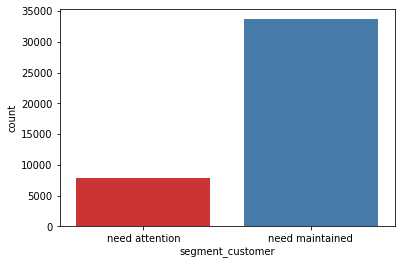

In [357]:
ax = sns.countplot(x="segment_customer", data=lrfmc_seg_km, palette="Set1")

- loyal and potential adalah yang kmeans clust nya 1
- important and low value adlah yg kmeans clust nya 0

In [358]:
display(data_kmeans.groupby('kmeans_clust').mean().reset_index())

,kmeans_clust,Length,Recency,Frequency,Monetary,Coefficient
0,0,0.522546,-0.747316,1.553658,1.494433,0.365165
1,1,-0.122211,0.174779,-0.363364,-0.349512,-0.085403


In [359]:
data_kmeans.corr()

,Length,Recency,Frequency,Monetary,Coefficient,kmeans_clust
Length,1.000000,-0.108449,0.206018,0.186104,0.082946,-0.252707
Recency,-0.108449,1.000000,-0.409334,-0.362585,-0.050341,0.361408
Frequency,0.206018,-0.409334,1.000000,0.830679,0.154355,-0.751361
Monetary,0.186104,-0.362585,0.830679,1.000000,0.119234,-0.722719
Coefficient,0.082946,-0.050341,0.154355,0.119234,1.000000,-0.176596
kmeans_clust,-0.252707,0.361408,-0.751361,-0.722719,-0.176596,1.000000


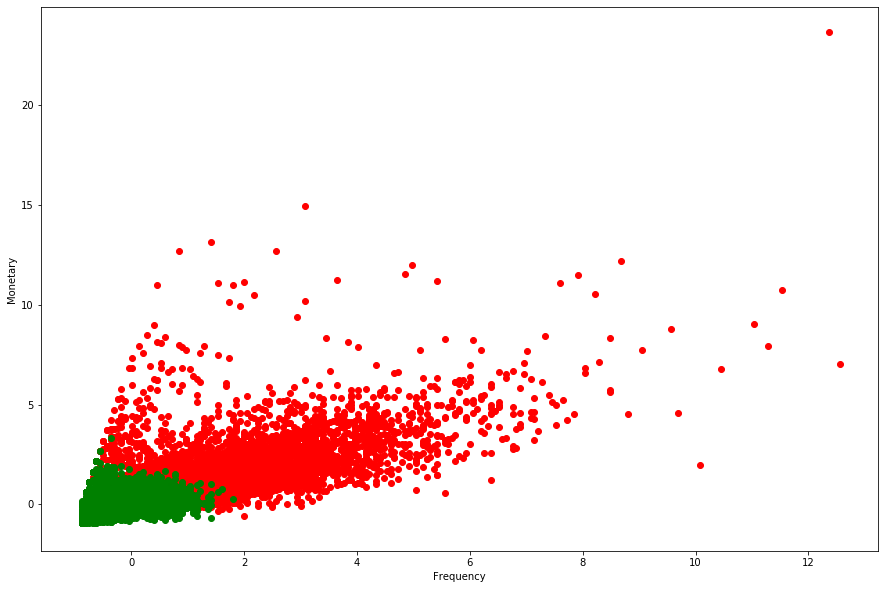

In [360]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (15, 10))
plt.scatter(data_kmeans["Frequency"][data_kmeans["kmeans_clust"] == 0], data_kmeans["Monetary"][data_kmeans["kmeans_clust"] == 0], color = "red")
plt.scatter(data_kmeans["Frequency"][data_kmeans["kmeans_clust"] == 1], data_kmeans["Monetary"][data_kmeans["kmeans_clust"] == 1], color = "green")
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

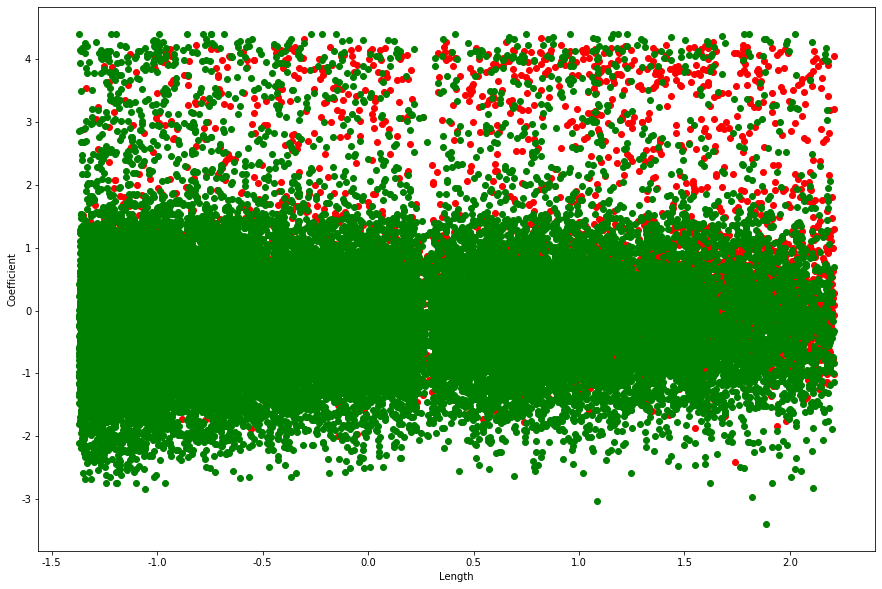

In [361]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (15, 10))
plt.scatter(data_kmeans["Length"][data_kmeans["kmeans_clust"] == 0], data_kmeans["Coefficient"][data_kmeans["kmeans_clust"] == 0], color = "red")
plt.scatter(data_kmeans["Length"][data_kmeans["kmeans_clust"] == 1], data_kmeans["Coefficient"][data_kmeans["kmeans_clust"] == 1], color = "green")
plt.xlabel('Length')
plt.ylabel('Coefficient')
plt.show()

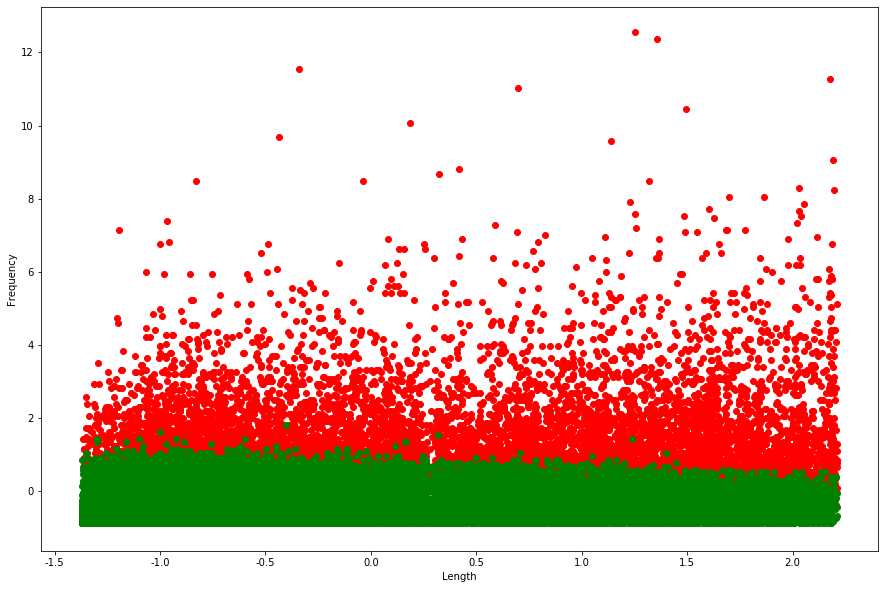

In [362]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (15, 10))
plt.scatter(data_kmeans["Length"][data_kmeans["kmeans_clust"] == 0], data_kmeans["Frequency"][data_kmeans["kmeans_clust"] == 0], color = "red")
plt.scatter(data_kmeans["Length"][data_kmeans["kmeans_clust"] == 1], data_kmeans["Frequency"][data_kmeans["kmeans_clust"] == 1], color = "green")
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

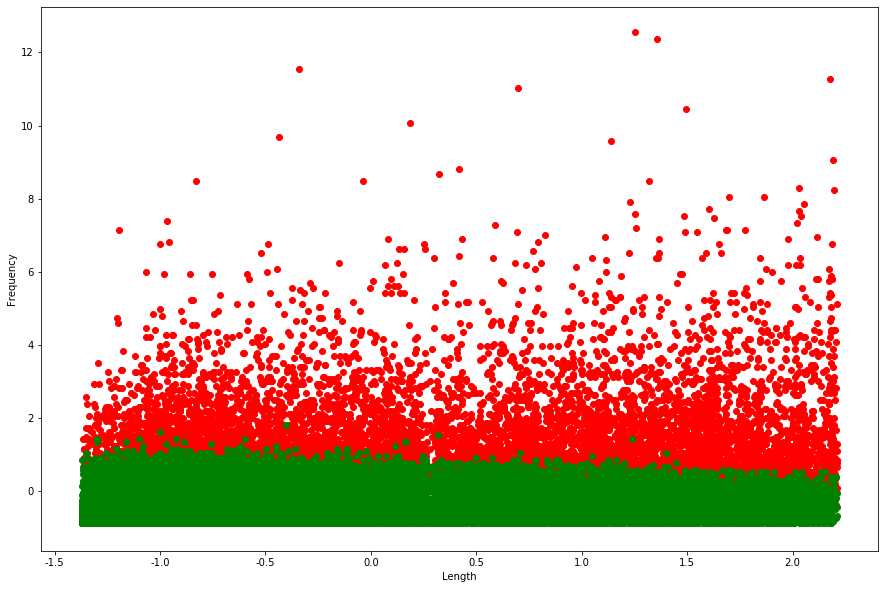

In [363]:
# Plot data after k = 2 clustering
import numpy as np

plt.figure(figsize = (15, 10))
plt.scatter(data_kmeans["Length"][data_kmeans["kmeans_clust"] == 0], data_kmeans["Frequency"][data_kmeans["kmeans_clust"] == 0], color = "red")
plt.scatter(data_kmeans["Length"][data_kmeans["kmeans_clust"] == 1], data_kmeans["Frequency"][data_kmeans["kmeans_clust"] == 1], color = "green")
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

PCA - KMEANS

In [364]:
kmeans_X = data_kmeans.drop(columns={'kmeans_clust'})
kmeans_y = kmeans_labels

In [365]:
#kmeans_label = kmeans.labels_

In [366]:
pca_kmeans = PCA(n_components=2)

In [367]:
pca_kmeans = pca_kmeans.fit(kmeans_X)

In [368]:
pcs_kmeans = pca_kmeans.transform(kmeans_X)
pcs_kmeans

array([[22.77985682, -2.85580952],
       [12.96977178,  0.51390071],
       [12.51121796,  0.63159658],
       ...,
       [-2.66409562, -1.57353344],
       [-1.27088097,  0.72060269],
       [-1.17799108, -0.37313572]])

In [369]:
pdf_kmeans = pd.DataFrame(pcs_kmeans,columns={'component1','component2'})
pdf_kmeans.head()

,component1,component2
0,22.779857,-2.855810
1,12.969772,0.513901
2,12.511218,0.631597
3,7.381885,0.510145
4,13.362551,-1.405621


In [370]:
pdf_kmeans['cluster_kmeans'] = y_km
pdf_kmeans.head()

,component1,component2,cluster_kmeans
0,22.779857,-2.855810,0
1,12.969772,0.513901,0
2,12.511218,0.631597,0
3,7.381885,0.510145,0
4,13.362551,-1.405621,0


In [371]:
pdf_kmeans['cluster_kmeans'].value_counts()

1    33646
0     7869
Name: cluster_kmeans, dtype: int64

C:\Users\niken\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


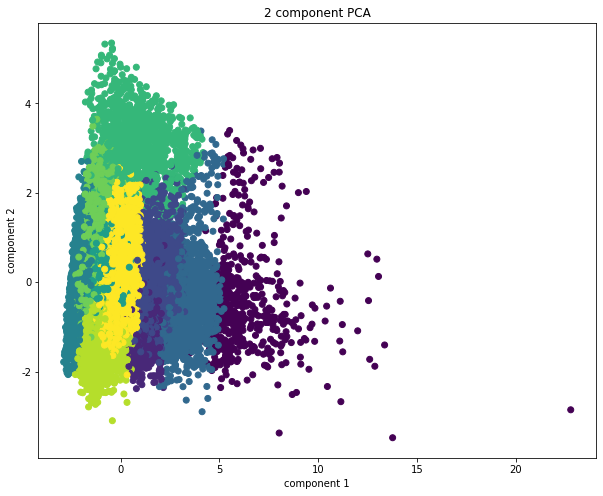

In [372]:
#ini berdasar semua label 
fig, ax =plt.subplots(figsize=(10,8))
ax.scatter(pdf_kmeans['component1'],pdf_kmeans['component2'], c=kmeans.labels_)


plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("2 component PCA")
fig.show()

Text(0.5, 1.0, '2 component PCA KMeans')

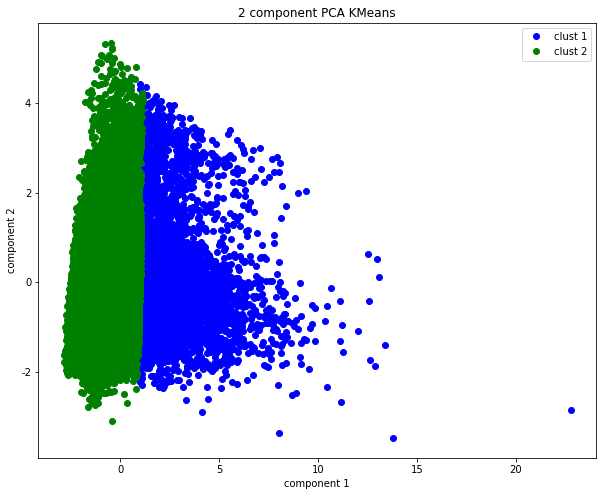

In [373]:
# Plotting the results of PCA
fig,ax = plt.subplots(figsize=(10,8))
plt.plot(pcs_kmeans[y_km == 0, 0], pcs_kmeans[y_km == 0, 1], 'bo', label='clust 1')
plt.plot(pcs_kmeans[y_km == 1, 0], pcs_kmeans[y_km == 1, 1], 'go', label='clust 2')
plt.legend(loc=0);
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("2 component PCA KMeans")

In [374]:
print('Explained variance:', pca_kmeans.explained_variance_)
print('Explained variance ratio:', pca_kmeans.explained_variance_ratio_ * 100)

Explained variance: [2.21283094 0.99049177]
Explained variance ratio: [44.25555278 19.80935826]


Text(0.5, 1.0, 'Explained variance Ratio 2 component PCA')

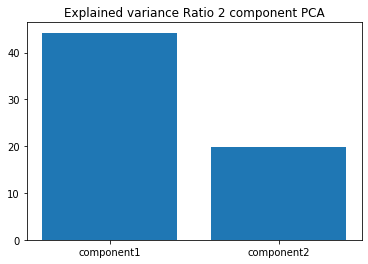

In [375]:
plt.bar(['component1', 'component2'], pca_kmeans.explained_variance_ratio_ * 100)
plt.title("Explained variance Ratio 2 component PCA")

Text(0.5, 1, '2 component PCA KMEANS')

<Figure size 1296x1080 with 0 Axes>

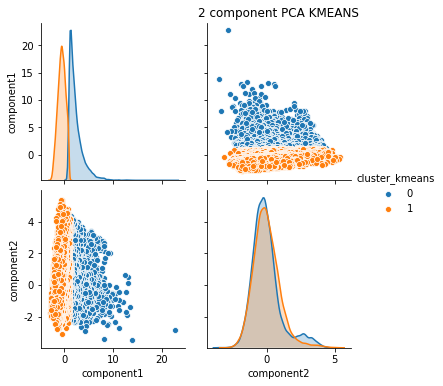

In [376]:
import seaborn as sns
plt.figure(figsize=(18,15))
sns.pairplot(data=pdf_kmeans, hue='cluster_kmeans')
plt.title("2 component PCA KMEANS")

### Gaussian Mixture Model

In [377]:
from sklearn.mixture import GaussianMixture

In [378]:
data_gmm = df
data_gmm = data_gmm.rename(columns={'MEMBER_TIME':'Length','LAST_TO_END':'Recency','FLIGHT_COUNT':'Frequency','SEG_KM_SUM':'Monetary','avg_discount':'Coefficient'})
data_gmm.head()

,Length,Recency,Frequency,Monetary,Coefficient
0,1.358435,-1.025021,12.364444,23.664960,1.320337
1,1.231409,-0.963710,7.909567,11.495928,2.977895
2,1.252386,-0.922836,7.591362,11.073419,2.991359
3,0.590448,-0.044049,0.463558,10.972689,2.057266
4,0.321245,-0.984147,8.673260,12.184848,1.371766


In [379]:
gmm_model = GaussianMixture(n_components=2).fit(data_gmm)

In [380]:
gmm_label = gmm_model.predict(data_gmm)
gmm_label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [381]:
data_gmm['gmm_clust'] = gmm_label

In [382]:
data_gmm.head()

,Length,Recency,Frequency,Monetary,Coefficient,gmm_clust
0,1.358435,-1.025021,12.364444,23.664960,1.320337,1
1,1.231409,-0.963710,7.909567,11.495928,2.977895,1
2,1.252386,-0.922836,7.591362,11.073419,2.991359,1
3,0.590448,-0.044049,0.463558,10.972689,2.057266,1
4,0.321245,-0.984147,8.673260,12.184848,1.371766,1


In [383]:
quartiles = data_gmm.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

        Length   Recency  Frequency  Monetary  Coefficient  gmm_clust
0.25 -0.891919 -0.830870  -0.618340 -0.615955    -0.585482        0.0
0.50 -0.215997 -0.330166  -0.300135 -0.311516    -0.083088        0.0
0.75  0.820028  0.589495   0.272635  0.246848     0.428079        1.0 <class 'pandas.core.frame.DataFrame'>


In [384]:
quartiles=quartiles.to_dict()
quartiles

{'Length': {0.25: -0.8919192589708168,
  0.5: -0.21599706749517764,
  0.75: 0.8200284984045522},
 'Recency': {0.25: -0.83086993815023,
  0.5: -0.33016585669279136,
  0.75: 0.5894947010861775},
 'Frequency': {0.25: -0.6183404087730793,
  0.5: -0.30013490019499817,
  0.75: 0.2726350152455477},
 'Monetary': {0.25: -0.6159550977588232,
  0.5: -0.3115162649368997,
  0.75: 0.24684770215419397},
 'Coefficient': {0.25: -0.5854820789809843,
  0.5: -0.08308761741719695,
  0.75: 0.4280788245311351},
 'gmm_clust': {0.25: 0.0, 0.5: 0.0, 0.75: 1.0}}

In [385]:
lrfmc_seg_gmm = data_gmm.copy()

In [386]:
lrfmc_seg_gmm.head()

,Length,Recency,Frequency,Monetary,Coefficient,gmm_clust
0,1.358435,-1.025021,12.364444,23.664960,1.320337,1
1,1.231409,-0.963710,7.909567,11.495928,2.977895,1
2,1.252386,-0.922836,7.591362,11.073419,2.991359,1
3,0.590448,-0.044049,0.463558,10.972689,2.057266,1
4,0.321245,-0.984147,8.673260,12.184848,1.371766,1


In [387]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
## for Length

def LClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4    
    
## for Coeficient

def CClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [388]:
lrfmc_seg_gmm['L_Quartile'] = lrfmc_seg_gmm['Length'].apply(LClass, args=('Length',quartiles,))
lrfmc_seg_gmm['R_Quartile'] = lrfmc_seg_gmm['Recency'].apply(RClass, args=('Recency',quartiles,))
lrfmc_seg_gmm['F_Quartile'] = lrfmc_seg_gmm['Frequency'].apply(FMClass, args=('Frequency',quartiles,))
lrfmc_seg_gmm['M_Quartile'] = lrfmc_seg_gmm['Monetary'].apply(FMClass, args=('Monetary',quartiles,))
lrfmc_seg_gmm['C_Quartile'] = lrfmc_seg_gmm['Coefficient'].apply(CClass, args=('Coefficient',quartiles,))

In [389]:
lrfmc_seg_gmm['LRFMCClass'] = lrfmc_seg_gmm.L_Quartile.map(str) \
                            + lrfmc_seg_gmm.R_Quartile.map(str) \
                             + lrfmc_seg_gmm.F_Quartile.map(str) \
                            + lrfmc_seg_gmm.M_Quartile.map(str) \
                            + lrfmc_seg_gmm.C_Quartile.map(str)

In [390]:
lrfmc_seg_gmm.head()

,Length,Recency,Frequency,Monetary,Coefficient,gmm_clust,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,LRFMCClass
0,1.358435,-1.025021,12.364444,23.664960,1.320337,1,4,4,4,4,4,44444
1,1.231409,-0.963710,7.909567,11.495928,2.977895,1,4,4,4,4,4,44444
2,1.252386,-0.922836,7.591362,11.073419,2.991359,1,4,4,4,4,4,44444
3,0.590448,-0.044049,0.463558,10.972689,2.057266,1,3,2,4,4,4,32444
4,0.321245,-0.984147,8.673260,12.184848,1.371766,1,3,4,4,4,4,34444


In [391]:
lrfmc_seg_gmm['Total Score'] = lrfmc_seg_gmm['L_Quartile'] + lrfmc_seg_gmm['R_Quartile'] + lrfmc_seg_gmm['F_Quartile'] + lrfmc_seg_gmm['M_Quartile'] +lrfmc_seg_gmm['C_Quartile']
lrfmc_seg_gmm.head()

,Length,Recency,Frequency,Monetary,Coefficient,gmm_clust,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,LRFMCClass,Total Score
0,1.358435,-1.025021,12.364444,23.664960,1.320337,1,4,4,4,4,4,44444,20
1,1.231409,-0.963710,7.909567,11.495928,2.977895,1,4,4,4,4,4,44444,20
2,1.252386,-0.922836,7.591362,11.073419,2.991359,1,4,4,4,4,4,44444,20
3,0.590448,-0.044049,0.463558,10.972689,2.057266,1,3,2,4,4,4,32444,17
4,0.321245,-0.984147,8.673260,12.184848,1.371766,1,3,4,4,4,4,34444,19


In [392]:
lrfmc_seg_gmm.sort_values(by=['LRFMCClass', 'Total Score'], ascending=[False,False]).head()

,Length,Recency,Frequency,Monetary,Coefficient,gmm_clust,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,LRFMCClass,Total Score
0,1.358435,-1.025021,12.364444,23.664960,1.320337,1,4,4,4,4,4,44444,20
1,1.231409,-0.963710,7.909567,11.495928,2.977895,1,4,4,4,4,4,44444,20
2,1.252386,-0.922836,7.591362,11.073419,2.991359,1,4,4,4,4,4,44444,20
6,1.620647,-1.025021,5.427564,11.214595,1.341478,1,4,4,4,4,4,44444,20
11,2.196346,-0.973928,8.227773,10.553062,1.268421,1,4,4,4,4,4,44444,20


In [393]:
#ini yg di analisisis untuk karaketeristik gmm lrfmc 

In [394]:
display(lrfmc_seg_gmm.groupby('gmm_clust').mean().reset_index())

,gmm_clust,Length,Recency,Frequency,Monetary,Coefficient,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,Total Score
0,0,-0.08887,0.235494,-0.414932,-0.419592,-0.138502,2.405580,2.224747,1.952500,2.030161,2.390301,11.003288
1,1,0.23448,-0.621345,1.094788,1.107082,0.365435,2.747502,3.263453,3.615513,3.739001,2.789395,16.154864


In [395]:
lrfmc_seg_gmm['gmm_clust'].value_counts().head()

0    30105
1    11410
Name: gmm_clust, dtype: int64

In [396]:
def segment_customer(x):
    if x['gmm_clust']== 1 :
        segment = 'need maintained'
#     elif x['LRFMCClass']== '11111'  :
#         segment = 'important and low value'
#     elif x['LRFMCClass']<= '22222' :
#         segment = 'important'
    else:
        segment = 'need attention'
    return segment
        
lrfmc_seg_gmm['segment_customer']=lrfmc_seg_gmm.apply(lambda x: segment_customer(x),axis=1)

In [397]:
def card_seg(x):
    if x['LRFMCClass'] == '44444' :
        segment = 'platinum'
    elif x['LRFMCClass'] == '33333' :
        segment = 'gold'
    elif x['LRFMCClass'] == '22222' :
        segment = 'silver'
    else:
        segment = 'common'
    return segment
        
lrfmc_seg_gmm['card_seg']=lrfmc_seg_gmm.apply(lambda x: card_seg(x),axis=1)

In [398]:
lrfmc_seg_gmm[['Length','Recency','Frequency','Monetary','Coefficient','LRFMCClass','Total Score','gmm_clust','segment_customer','card_seg']].head()


,Length,Recency,Frequency,Monetary,Coefficient,LRFMCClass,Total Score,gmm_clust,segment_customer,card_seg
0,1.358435,-1.025021,12.364444,23.664960,1.320337,44444,20,1,need maintained,platinum
1,1.231409,-0.963710,7.909567,11.495928,2.977895,44444,20,1,need maintained,platinum
2,1.252386,-0.922836,7.591362,11.073419,2.991359,44444,20,1,need maintained,platinum
3,0.590448,-0.044049,0.463558,10.972689,2.057266,32444,17,1,need maintained,common
4,0.321245,-0.984147,8.673260,12.184848,1.371766,34444,19,1,need maintained,common


In [399]:
lrfmc_seg_gmm.head()

,Length,Recency,Frequency,Monetary,Coefficient,gmm_clust,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,LRFMCClass,Total Score,segment_customer,card_seg
0,1.358435,-1.025021,12.364444,23.664960,1.320337,1,4,4,4,4,4,44444,20,need maintained,platinum
1,1.231409,-0.963710,7.909567,11.495928,2.977895,1,4,4,4,4,4,44444,20,need maintained,platinum
2,1.252386,-0.922836,7.591362,11.073419,2.991359,1,4,4,4,4,4,44444,20,need maintained,platinum
3,0.590448,-0.044049,0.463558,10.972689,2.057266,1,3,2,4,4,4,32444,17,need maintained,common
4,0.321245,-0.984147,8.673260,12.184848,1.371766,1,3,4,4,4,4,34444,19,need maintained,common


In [400]:
lrfmc_seg_gmm[['Length','Recency','Frequency','Monetary','Coefficient','Total Score','LRFMCClass','segment_customer']].head()

,Length,Recency,Frequency,Monetary,Coefficient,Total Score,LRFMCClass,segment_customer
0,1.358435,-1.025021,12.364444,23.664960,1.320337,20,44444,need maintained
1,1.231409,-0.963710,7.909567,11.495928,2.977895,20,44444,need maintained
2,1.252386,-0.922836,7.591362,11.073419,2.991359,20,44444,need maintained
3,0.590448,-0.044049,0.463558,10.972689,2.057266,17,32444,need maintained
4,0.321245,-0.984147,8.673260,12.184848,1.371766,19,34444,need maintained


In [401]:
lrfmc_seg_gmm['segment_customer'].value_counts()

need attention     30105
need maintained    11410
Name: segment_customer, dtype: int64

In [402]:
lrfmc_seg_gmm['segment_customer'].value_counts(normalize=True)

need attention     0.72516
need maintained    0.27484
Name: segment_customer, dtype: float64

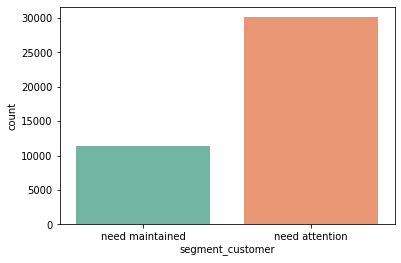

In [403]:
ax = sns.countplot(x="segment_customer", data=lrfmc_seg_gmm, palette="Set2")

- loyal and potential adalah yang kmeans clust nya 0 (lihat bagian groupby gmm cluster mean)
- important and low value adlah yg kmeans clust nya 1 ((lihat bagian groupby gmm clutser mean)

In [404]:
display(data_gmm.groupby('gmm_clust').median().reset_index())

,gmm_clust,Length,Recency,Frequency,Monetary,Coefficient
0,0,-0.339528,0.007043,-0.491058,-0.488388,-0.157493
1,1,0.110310,-0.820651,0.845405,0.806081,0.090991


In [405]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
from sklearn.metrics import  silhouette_score
silhouette_avg = silhouette_score(data_gmm, gmm_label)
silhouette_avg

0.30554450435109237

In [406]:
#score with davies bouldin
from sklearn.metrics import  silhouette_score
davies_bouldin_score(data_gmm, gmm_label)

1.4543498458599309

**PCA - GMM**

In [407]:
X_gmm = data_gmm.drop(columns=['gmm_clust'])
y_gmm = data_gmm['gmm_clust']

In [408]:
pca_gmm = PCA(n_components=2)

In [409]:
pca_gmm = pca_gmm.fit(X_gmm)

In [410]:
pcs_gmm = pca_gmm.transform(X_gmm)
pcs_gmm

array([[22.77985682, -2.85580952],
       [12.96977178,  0.51390071],
       [12.51121796,  0.63159658],
       ...,
       [-2.66409562, -1.57353344],
       [-1.27088097,  0.72060269],
       [-1.17799108, -0.37313572]])

In [411]:
pdf_gmm = pd.DataFrame(pcs_gmm,columns={'component1','component2'})
pdf_gmm.head()

,component1,component2
0,22.779857,-2.855810
1,12.969772,0.513901
2,12.511218,0.631597
3,7.381885,0.510145
4,13.362551,-1.405621


In [412]:
pdf_gmm['label_gmm'] = y_gmm
pdf_gmm.describe()

,component1,component2,label_gmm
count,4.151500e+04,4.151500e+04,34033.000000
mean,-1.684528e-15,-1.542987e-16,0.333999
std,1.487559e+00,9.952345e-01,0.471646
min,-2.877341e+00,-3.480568e+00,0.000000
25%,-9.558913e-01,-6.506229e-01,0.000000
50%,-2.776131e-01,-1.048876e-01,0.000000
75%,6.037669e-01,5.137753e-01,1.000000
max,2.277986e+01,5.349721e+00,1.000000


In [413]:
pdf_gmm.head()

,component1,component2,label_gmm
0,22.779857,-2.855810,1.0
1,12.969772,0.513901,1.0
2,12.511218,0.631597,1.0
3,7.381885,0.510145,1.0
4,13.362551,-1.405621,1.0


In [414]:
pdf_gmm['label_gmm'].value_counts()

0.0    22666
1.0    11367
Name: label_gmm, dtype: int64

Text(0.5, 1.0, '2 component PCA GMM')

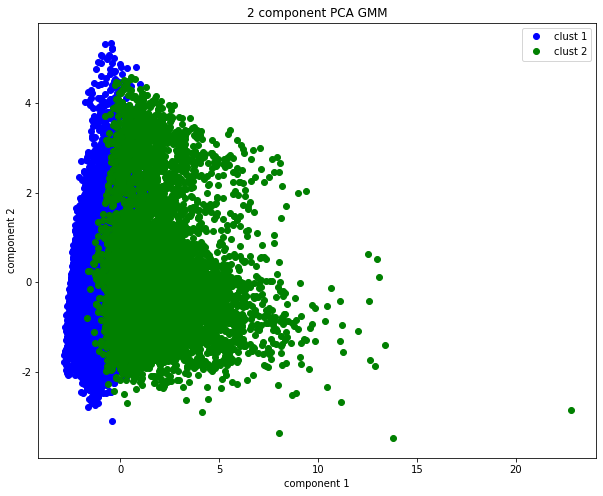

In [415]:
# Plotting the results of PCA
fig,ax = plt.subplots(figsize=(10,8))
plt.plot(pcs_gmm[y_gmm == 0, 0], pcs_gmm[y_gmm == 0, 1], 'bo', label='clust 1')
plt.plot(pcs_gmm[y_gmm == 1, 0], pcs_gmm[y_gmm == 1, 1], 'go', label='clust 2')
plt.legend(loc=0);
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("2 component PCA GMM")

In [416]:
print('Explained variance:', pca_gmm.explained_variance_)
print('Explained variance ratio:', pca_gmm.explained_variance_ratio_ * 100)

Explained variance: [2.21283094 0.99049177]
Explained variance ratio: [44.25555278 19.80935826]


Text(0.5, 1.0, '2 component PCA GMM')

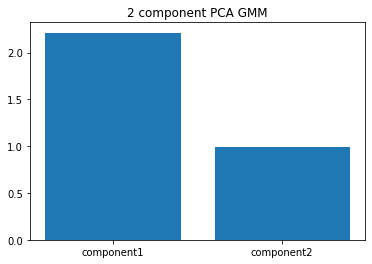

In [417]:
plt.bar(['component1', 'component2'], pca_gmm .explained_variance_)
plt.title("2 component PCA GMM")

Text(0.5, 1, '2 component PCA GMM')

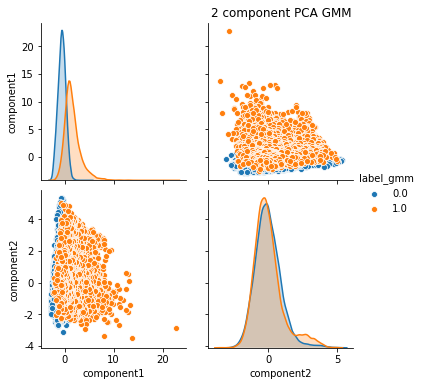

In [418]:
sns.pairplot(data=pdf_gmm, hue='label_gmm')
plt.title("2 component PCA GMM")